In [1]:
import tensorflow as tf
import numpy as np
from facial_landmark_detection_data_reader import *

In [2]:
num_landmarks = 10

input_X = tf.placeholder(shape=[None, 40, 40, 1], dtype=tf.float32)

input_landmarks = tf.placeholder(shape=[None, num_landmarks], dtype=tf.float32)
input_gender = tf.placeholder(shape=[None, 2], dtype=tf.float32)
input_glasses = tf.placeholder(shape=[None, 2], dtype=tf.float32)
input_smile = tf.placeholder(shape=[None, 2], dtype=tf.float32)
input_pose = tf.placeholder(shape=[None, 5], dtype=tf.float32)
categories = (input_gender, input_smile, input_glasses, input_pose)

In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    #initial = tf.truncated_normal(shape, stddev=0.1)
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [4]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='VALID')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

In [5]:
W_conv1 = weight_variable([5, 5, 1, 16])
b_conv1 = bias_variable([16])

In [6]:
h_conv1 = tf.nn.relu(conv2d(input_X, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

In [7]:
W_conv2 = weight_variable([3, 3, 16, 48])
b_conv2 = bias_variable([48])

In [8]:
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [9]:
W_conv3 = weight_variable([3, 3, 48, 64])
b_conv3 = bias_variable([64])

In [10]:
h_conv3 = tf.nn.relu(conv2d(h_pool2, W_conv3) + b_conv3)
h_pool3 = max_pool_2x2(h_conv3)

In [11]:
W_conv4 = weight_variable([2, 2, 64, 64])
b_conv4 = bias_variable([64])

In [12]:
h_conv4 = tf.nn.relu(conv2d(h_pool3, W_conv4) + b_conv4)

In [13]:
W_fc1 = weight_variable([2*2*64, 100])
b_fc1 = bias_variable([100])
h_conv4_flat = tf.reshape(h_conv4, [-1, 2*2*64])
h_fc1 = tf.nn.relu(tf.matmul(h_conv4_flat, W_fc1) + b_fc1)

In [14]:
W_fc2_landmarks = weight_variable([100, 10])
b_fc2_landmarks = bias_variable([10])

W_fc2_gender = weight_variable([100, 2])
b_fc2_gender = bias_variable([2])

W_fc2_smile = weight_variable([100, 2])
b_fc2_smile = bias_variable([2])

W_fc2_glasses = weight_variable([100, 2])
b_fc2_glasses = bias_variable([2])

W_fc2_pose = weight_variable([100, 5])
b_fc2_pose = bias_variable([5])

h_fc2_landmarks = tf.matmul(h_fc1, W_fc2_landmarks) + b_fc2_landmarks
h_fc2_gender = tf.matmul(h_fc1, W_fc2_gender) + b_fc2_gender
h_fc2_smile = tf.matmul(h_fc1, W_fc2_smile) + b_fc2_smile
h_fc2_glasses = tf.matmul(h_fc1, W_fc2_glasses) + b_fc2_glasses
h_fc2_pose = tf.matmul(h_fc1, W_fc2_pose) + b_fc2_pose
logits = (h_fc2_gender, h_fc2_smile, h_fc2_glasses, h_fc2_pose)

In [15]:
loss = tf.reduce_mean(tf.nn.l2_loss(h_fc2_landmarks - input_landmarks)) + 0.0001*tf.nn.l2_loss(W_fc2_landmarks)
loss += tf.reduce_sum([0.5*tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=categories[i], logits=logits[i])) for i in range(4)])

In [16]:
train = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [17]:
predictions = (h_fc2_landmarks,) + tuple([tf.nn.softmax(l) for l in logits])

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [19]:
batch_size = 128
d = AllData('D:\\Downloads Overflow\\mtfl')
print(type(loss))

train_data: ('lfw_5590\\Aaron_Eckhart_0001.jpg', ((107.25, 108.75), (147.75, 113.25), (126.25, 143.75), (106.25, 158.75), (140.75, 162.75)), (array([ 1.,  0.]), array([ 0.,  1.]), array([ 0.,  1.]), array([ 0.,  0.,  1.,  0.,  0.])))
<class 'tensorflow.python.framework.ops.Tensor'>



step: 5000 loss: 14.6874 

[2746, 2965, 2535, 2907, 1515]

step: 5001 loss: 9.39906 


step: 5002 loss: 8.89281 


step: 5003 loss: 14.818 


step: 5004 loss: 9.05805 


step: 5005 loss: 8.57265 


step: 5006 loss: 7.9434 


step: 5007 loss: 9.17218 


step: 5008 loss: 9.14058 


step: 5009 loss: 9.03389 


step: 5010 loss: 9.51466 


step: 5011 loss: 14.577 


step: 5012 loss: 14.4468 


step: 5013 loss: 8.88037 


step: 5014 loss: 9.54094 


step: 5015 loss: 8.79296 


step: 5016 loss: 15.4288 


step: 5017 loss: 13.3326 


step: 5018 loss: 8.10424 


step: 5019 loss: 15.2683 


step: 5020 loss: 16.5833 


step: 5021 loss: 15.7897 


step: 5022 loss: 13.465 


step: 5023 loss: 16.2545 


step: 5024 loss: 15.4086 


step: 5025 loss: 14.8758 


step: 5026 loss: 10.1868 


step: 5027 loss: 8.91642 


step: 5028 loss: 9.36979 


step: 5029 loss: 15.4505 


step: 5030 loss: 17.0732 


step: 5031 loss: 14.7911 


step: 5032 loss: 8.61212 


step: 5033 loss: 12.9778 


step: 5034 loss: 9.3

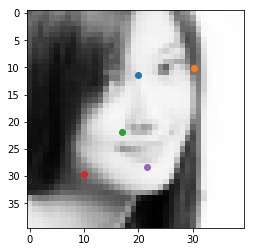

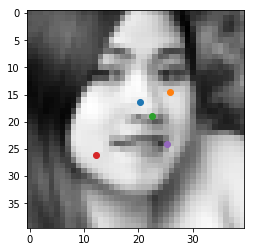

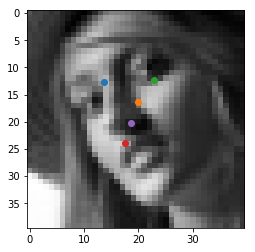

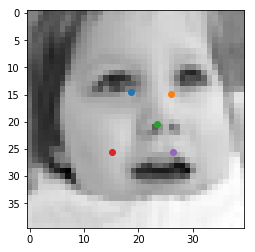

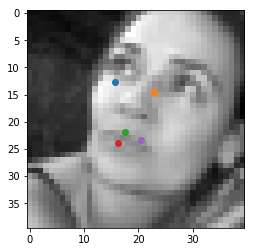


step: 5101 loss: 8.9138 


step: 5102 loss: 9.45542 


step: 5103 loss: 9.1923 


step: 5104 loss: 16.01 


step: 5105 loss: 7.76175 


step: 5106 loss: 16.9274 


step: 5107 loss: 14.5317 


step: 5108 loss: 16.3647 


step: 5109 loss: 13.9649 


step: 5110 loss: 9.85401 


step: 5111 loss: 14.3434 


step: 5112 loss: 14.5202 


step: 5113 loss: 14.5232 


step: 5114 loss: 16.6468 


step: 5115 loss: 9.01513 


step: 5116 loss: 16.7573 


step: 5117 loss: 15.8356 


step: 5118 loss: 9.00033 


step: 5119 loss: 8.38595 


step: 5120 loss: 14.5191 


step: 5121 loss: 9.3745 


step: 5122 loss: 17.3409 


step: 5123 loss: 14.8182 


step: 5124 loss: 8.48207 


step: 5125 loss: 9.36379 


step: 5126 loss: 15.1966 


step: 5127 loss: 8.58713 


step: 5128 loss: 16.2778 


step: 5129 loss: 8.78974 


step: 5130 loss: 9.28765 


step: 5131 loss: 15.7396 


step: 5132 loss: 9.21738 


step: 5133 loss: 9.31745 


step: 5134 loss: 15.9097 


step: 5135 loss: 14.2929 


step: 5136 loss: 8.84732

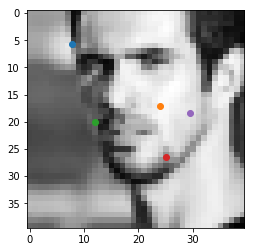

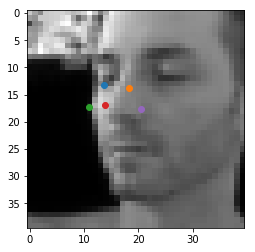

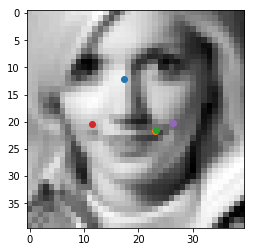

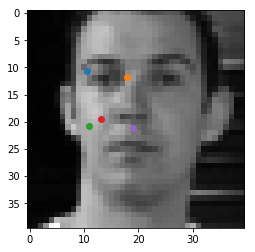

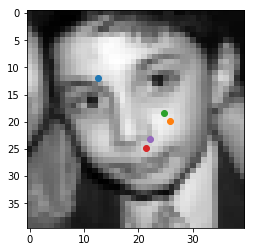


step: 5201 loss: 13.9556 


step: 5202 loss: 8.81984 


step: 5203 loss: 9.31967 


step: 5204 loss: 15.2981 


step: 5205 loss: 14.1573 


step: 5206 loss: 8.48559 


step: 5207 loss: 14.6712 


step: 5208 loss: 7.89331 


step: 5209 loss: 8.9599 


step: 5210 loss: 13.3006 


step: 5211 loss: 14.9655 


step: 5212 loss: 8.38112 


step: 5213 loss: 8.15184 


step: 5214 loss: 8.81218 


step: 5215 loss: 14.9611 


step: 5216 loss: 14.9709 


step: 5217 loss: 8.56526 


step: 5218 loss: 7.72095 


step: 5219 loss: 14.7374 


step: 5220 loss: 8.39282 


step: 5221 loss: 14.1421 


step: 5222 loss: 8.53156 


step: 5223 loss: 12.5151 


step: 5224 loss: 8.18341 


step: 5225 loss: 8.5099 


step: 5226 loss: 8.62017 


step: 5227 loss: 8.49766 


step: 5228 loss: 16.4148 


step: 5229 loss: 8.57801 


step: 5230 loss: 15.5476 


step: 5231 loss: 8.3585 


step: 5232 loss: 8.55925 


step: 5233 loss: 8.4338 


step: 5234 loss: 14.3697 


step: 5235 loss: 16.6823 


step: 5236 loss: 7.8867

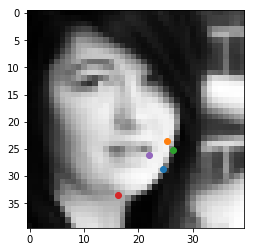

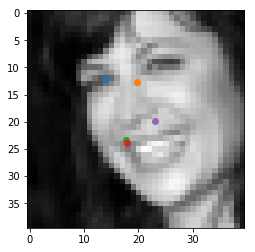

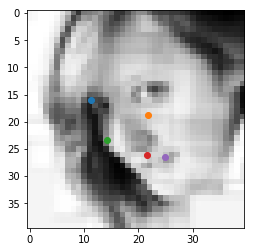

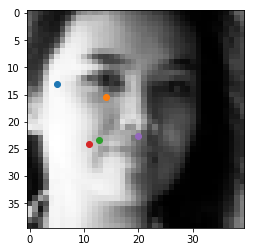

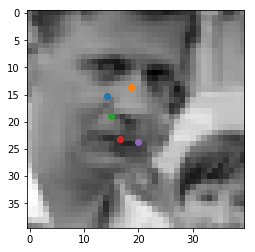


step: 5301 loss: 15.5732 


step: 5302 loss: 9.25583 


step: 5303 loss: 8.59942 


step: 5304 loss: 8.55399 


step: 5305 loss: 11.921 


step: 5306 loss: 14.4662 


step: 5307 loss: 18.0779 


step: 5308 loss: 8.75321 


step: 5309 loss: 7.87819 


step: 5310 loss: 15.5028 


step: 5311 loss: 14.6446 


step: 5312 loss: 14.199 


step: 5313 loss: 12.9248 


step: 5314 loss: 14.3535 


step: 5315 loss: 14.9301 


step: 5316 loss: 8.17704 


step: 5317 loss: 15.7266 


step: 5318 loss: 8.29244 


step: 5319 loss: 13.1544 


step: 5320 loss: 9.04615 


step: 5321 loss: 8.55752 


step: 5322 loss: 14.6581 


step: 5323 loss: 7.85062 


step: 5324 loss: 7.89776 


step: 5325 loss: 13.4653 


step: 5326 loss: 14.0364 


step: 5327 loss: 8.18953 


step: 5328 loss: 8.25058 


step: 5329 loss: 12.4459 


step: 5330 loss: 15.571 


step: 5331 loss: 14.055 


step: 5332 loss: 8.68792 


step: 5333 loss: 14.0728 


step: 5334 loss: 16.0275 


step: 5335 loss: 8.38524 


step: 5336 loss: 15.119

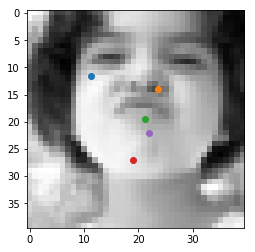

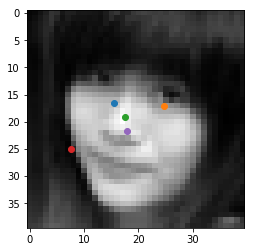

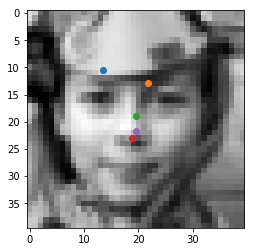

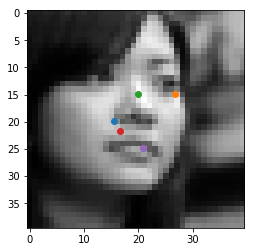

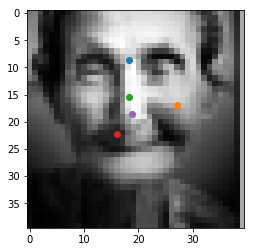


step: 5401 loss: 13.5459 


step: 5402 loss: 8.30076 


step: 5403 loss: 8.39591 


step: 5404 loss: 8.85149 


step: 5405 loss: 7.982 


step: 5406 loss: 8.84274 


step: 5407 loss: 8.16439 


step: 5408 loss: 7.79573 


step: 5409 loss: 7.70129 


step: 5410 loss: 7.73733 


step: 5411 loss: 12.4705 


step: 5412 loss: 8.11425 


step: 5413 loss: 16.4207 


step: 5414 loss: 8.33016 


step: 5415 loss: 9.46813 


step: 5416 loss: 14.5864 


step: 5417 loss: 8.02099 


step: 5418 loss: 7.9257 


step: 5419 loss: 8.07459 


step: 5420 loss: 13.6896 


step: 5421 loss: 8.38464 


step: 5422 loss: 8.77148 


step: 5423 loss: 8.27764 


step: 5424 loss: 14.8692 


step: 5425 loss: 13.4951 


step: 5426 loss: 7.93982 


step: 5427 loss: 7.95873 


step: 5428 loss: 14.5124 


step: 5429 loss: 8.32566 


step: 5430 loss: 14.4108 


step: 5431 loss: 12.137 


step: 5432 loss: 15.2429 


step: 5433 loss: 13.2352 


step: 5434 loss: 13.0083 


step: 5435 loss: 7.91554 


step: 5436 loss: 9.1713

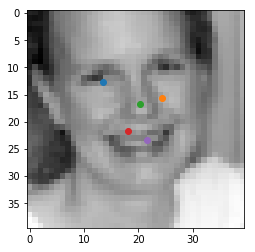

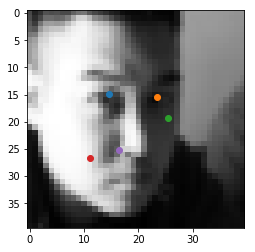

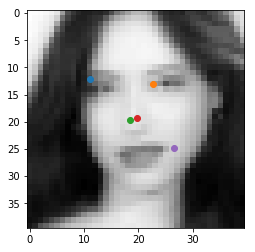

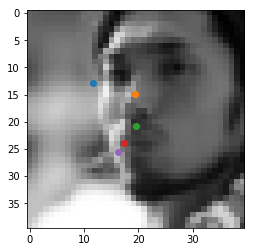

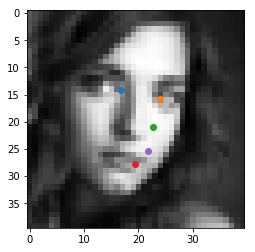


step: 5501 loss: 15.0057 


step: 5502 loss: 13.164 


step: 5503 loss: 14.2045 


step: 5504 loss: 8.13029 


step: 5505 loss: 7.30487 


step: 5506 loss: 7.77124 


step: 5507 loss: 14.1995 


step: 5508 loss: 8.13724 


step: 5509 loss: 8.13773 


step: 5510 loss: 13.5033 


step: 5511 loss: 7.92862 


step: 5512 loss: 15.3642 


step: 5513 loss: 15.9825 


step: 5514 loss: 13.6722 


step: 5515 loss: 13.4616 


step: 5516 loss: 13.5037 


step: 5517 loss: 13.4192 


step: 5518 loss: 13.2541 


step: 5519 loss: 12.6848 


step: 5520 loss: 13.59 


step: 5521 loss: 7.78841 


step: 5522 loss: 8.61817 


step: 5523 loss: 7.46301 


step: 5524 loss: 8.54559 


step: 5525 loss: 8.25189 


step: 5526 loss: 14.4727 


step: 5527 loss: 8.62459 


step: 5528 loss: 7.78109 


step: 5529 loss: 8.45889 


step: 5530 loss: 8.10185 


step: 5531 loss: 7.85401 


step: 5532 loss: 8.21971 


step: 5533 loss: 14.9978 


step: 5534 loss: 7.91851 


step: 5535 loss: 7.9359 


step: 5536 loss: 8.5946

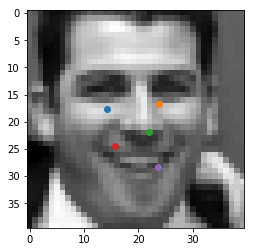

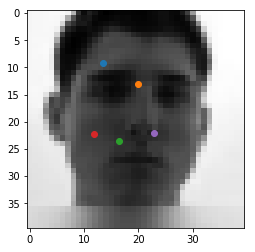

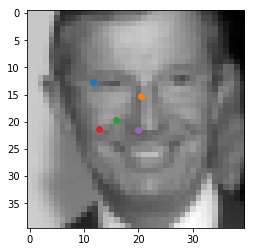

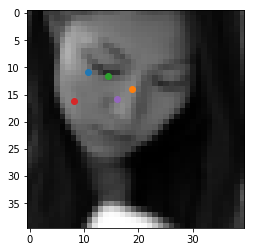

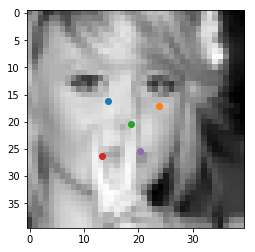


step: 5601 loss: 15.1205 


step: 5602 loss: 7.95518 


step: 5603 loss: 13.2149 


step: 5604 loss: 13.7252 


step: 5605 loss: 15.6497 


step: 5606 loss: 13.658 


step: 5607 loss: 7.80741 


step: 5608 loss: 14.5352 


step: 5609 loss: 11.9771 


step: 5610 loss: 7.71447 


step: 5611 loss: 8.14389 


step: 5612 loss: 13.3647 


step: 5613 loss: 7.52635 


step: 5614 loss: 7.65103 


step: 5615 loss: 7.41364 


step: 5616 loss: 15.6142 


step: 5617 loss: 7.82124 


step: 5618 loss: 7.86187 


step: 5619 loss: 7.89901 


step: 5620 loss: 14.4037 


step: 5621 loss: 7.51453 


step: 5622 loss: 8.31287 


step: 5623 loss: 13.8311 


step: 5624 loss: 13.8047 


step: 5625 loss: 14.6129 


step: 5626 loss: 14.0899 


step: 5627 loss: 8.15975 


step: 5628 loss: 13.1332 


step: 5629 loss: 13.6276 


step: 5630 loss: 8.81859 


step: 5631 loss: 8.33429 


step: 5632 loss: 7.60522 


step: 5633 loss: 8.25482 


step: 5634 loss: 15.7237 


step: 5635 loss: 13.0756 


step: 5636 loss: 7.7

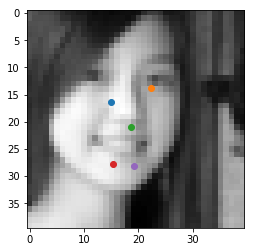

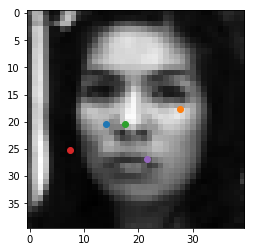

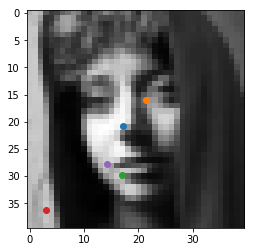

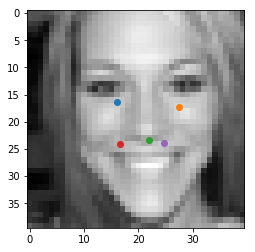

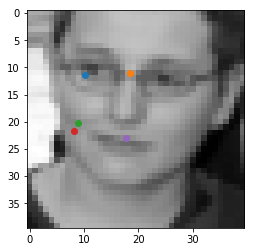


step: 5701 loss: 11.8265 


step: 5702 loss: 7.81249 


step: 5703 loss: 14.0205 


step: 5704 loss: 15.7396 


step: 5705 loss: 13.2605 


step: 5706 loss: 13.6997 


step: 5707 loss: 13.2126 


step: 5708 loss: 11.1649 


step: 5709 loss: 12.5107 


step: 5710 loss: 12.1945 


step: 5711 loss: 7.96935 


step: 5712 loss: 8.17537 


step: 5713 loss: 7.1461 


step: 5714 loss: 7.29676 


step: 5715 loss: 14.4955 


step: 5716 loss: 8.13584 


step: 5717 loss: 7.75452 


step: 5718 loss: 14.1134 


step: 5719 loss: 14.1507 


step: 5720 loss: 8.55643 


step: 5721 loss: 7.70162 


step: 5722 loss: 13.1421 


step: 5723 loss: 14.7966 


step: 5724 loss: 7.45405 


step: 5725 loss: 7.44584 


step: 5726 loss: 13.6158 


step: 5727 loss: 7.25779 


step: 5728 loss: 13.6605 


step: 5729 loss: 7.81062 


step: 5730 loss: 8.10257 


step: 5731 loss: 14.6381 


step: 5732 loss: 13.6042 


step: 5733 loss: 12.6703 


step: 5734 loss: 13.5041 


step: 5735 loss: 13.0266 


step: 5736 loss: 14.

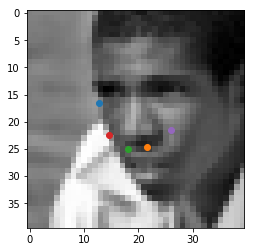

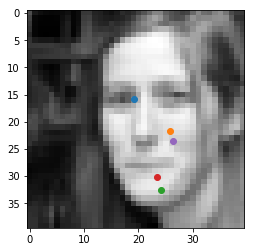

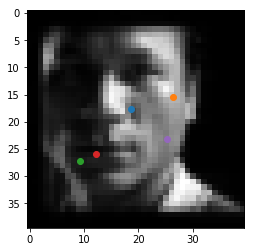

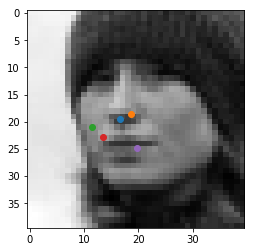

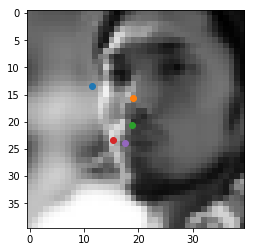


step: 5801 loss: 13.1012 


step: 5802 loss: 7.30078 


step: 5803 loss: 13.7967 


step: 5804 loss: 8.29893 


step: 5805 loss: 7.29373 


step: 5806 loss: 7.3558 


step: 5807 loss: 7.66866 


step: 5808 loss: 6.90247 


step: 5809 loss: 14.0828 


step: 5810 loss: 15.2221 


step: 5811 loss: 12.0535 


step: 5812 loss: 7.89846 


step: 5813 loss: 7.15419 


step: 5814 loss: 7.21034 


step: 5815 loss: 7.01574 


step: 5816 loss: 6.55611 


step: 5817 loss: 7.17995 


step: 5818 loss: 6.80667 


step: 5819 loss: 8.28944 


step: 5820 loss: 7.55262 


step: 5821 loss: 13.9549 


step: 5822 loss: 12.8031 


step: 5823 loss: 7.42902 


step: 5824 loss: 6.84335 


step: 5825 loss: 7.07164 


step: 5826 loss: 13.726 


step: 5827 loss: 12.2835 


step: 5828 loss: 7.20833 


step: 5829 loss: 13.5717 


step: 5830 loss: 12.5062 


step: 5831 loss: 6.98453 


step: 5832 loss: 11.6915 


step: 5833 loss: 14.0232 


step: 5834 loss: 14.226 


step: 5835 loss: 7.09766 


step: 5836 loss: 13.08

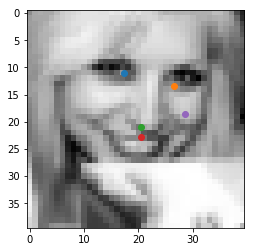

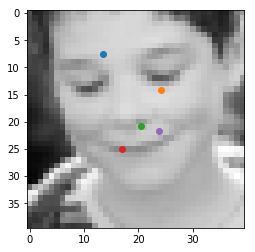

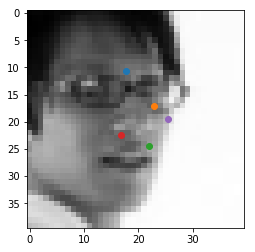

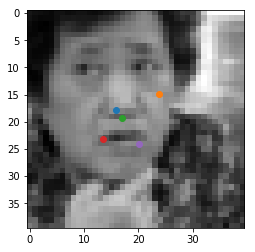

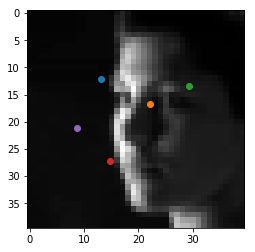


step: 5901 loss: 14.6916 


step: 5902 loss: 13.5213 


step: 5903 loss: 6.89306 


step: 5904 loss: 14.1012 


step: 5905 loss: 13.501 


step: 5906 loss: 7.23574 


step: 5907 loss: 7.49482 


step: 5908 loss: 7.46412 


step: 5909 loss: 13.2975 


step: 5910 loss: 13.4982 


step: 5911 loss: 7.49065 


step: 5912 loss: 6.50087 


step: 5913 loss: 7.13737 


step: 5914 loss: 14.8353 


step: 5915 loss: 7.01542 


step: 5916 loss: 6.65415 


step: 5917 loss: 14.9895 


step: 5918 loss: 7.70333 


step: 5919 loss: 7.04797 


step: 5920 loss: 12.0144 


step: 5921 loss: 6.96244 


step: 5922 loss: 6.73269 


step: 5923 loss: 7.29893 


step: 5924 loss: 15.3455 


step: 5925 loss: 6.91377 


step: 5926 loss: 12.7649 


step: 5927 loss: 7.06095 


step: 5928 loss: 7.10868 


step: 5929 loss: 6.95629 


step: 5930 loss: 13.2161 


step: 5931 loss: 6.37516 


step: 5932 loss: 6.99946 


step: 5933 loss: 6.42581 


step: 5934 loss: 13.7121 


step: 5935 loss: 6.93266 


step: 5936 loss: 13.

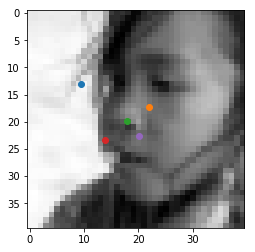

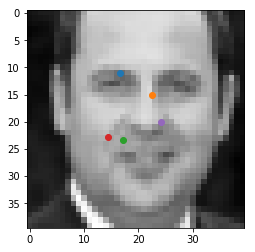

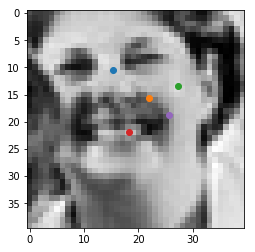

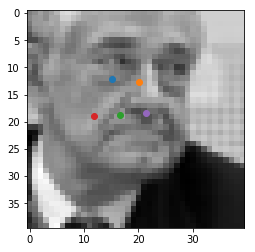

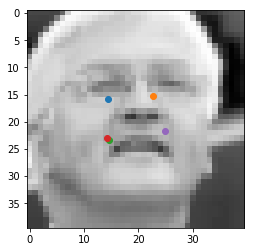


step: 6001 loss: 14.5549 


step: 6002 loss: 11.9149 


step: 6003 loss: 6.48467 


step: 6004 loss: 12.4652 


step: 6005 loss: 6.55395 


step: 6006 loss: 13.156 


step: 6007 loss: 10.9935 


step: 6008 loss: 6.69826 


step: 6009 loss: 13.0928 


step: 6010 loss: 12.3738 


step: 6011 loss: 13.6097 


step: 6012 loss: 7.18659 


step: 6013 loss: 7.15633 


step: 6014 loss: 6.49032 


step: 6015 loss: 13.8369 


step: 6016 loss: 12.3852 


step: 6017 loss: 14.3597 


step: 6018 loss: 12.5551 


step: 6019 loss: 11.8904 


step: 6020 loss: 7.12778 


step: 6021 loss: 14.4993 


step: 6022 loss: 12.7769 


step: 6023 loss: 6.7436 


step: 6024 loss: 14.7626 


step: 6025 loss: 14.002 


step: 6026 loss: 7.23558 


step: 6027 loss: 7.30943 


step: 6028 loss: 13.1174 


step: 6029 loss: 6.40071 


step: 6030 loss: 7.79337 


step: 6031 loss: 12.7054 


step: 6032 loss: 6.78114 


step: 6033 loss: 12.3671 


step: 6034 loss: 7.00464 


step: 6035 loss: 6.23503 


step: 6036 loss: 6.944

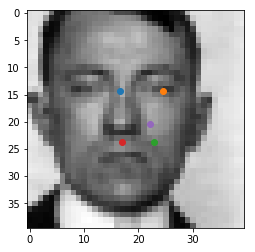

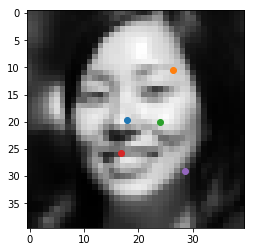

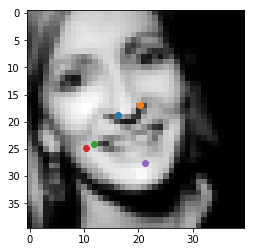

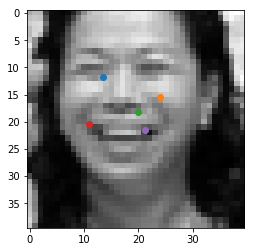

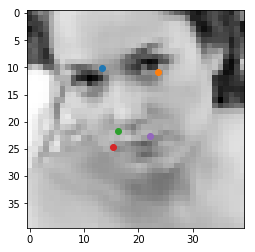


step: 6101 loss: 13.0278 


step: 6102 loss: 6.55088 


step: 6103 loss: 12.9384 


step: 6104 loss: 7.01787 


step: 6105 loss: 12.599 


step: 6106 loss: 12.9509 


step: 6107 loss: 13.5322 


step: 6108 loss: 6.21617 


step: 6109 loss: 6.831 


step: 6110 loss: 7.06345 


step: 6111 loss: 6.03641 


step: 6112 loss: 11.5834 


step: 6113 loss: 6.63409 


step: 6114 loss: 6.49206 


step: 6115 loss: 6.18603 


step: 6116 loss: 14.3578 


step: 6117 loss: 7.62097 


step: 6118 loss: 12.8834 


step: 6119 loss: 6.8953 


step: 6120 loss: 6.4813 


step: 6121 loss: 13.107 


step: 6122 loss: 12.7492 


step: 6123 loss: 13.8142 


step: 6124 loss: 12.2302 


step: 6125 loss: 6.58643 


step: 6126 loss: 6.80963 


step: 6127 loss: 6.63791 


step: 6128 loss: 6.55403 


step: 6129 loss: 13.0283 


step: 6130 loss: 6.34591 


step: 6131 loss: 14.5576 


step: 6132 loss: 12.7386 


step: 6133 loss: 13.3507 


step: 6134 loss: 7.22552 


step: 6135 loss: 12.1457 


step: 6136 loss: 13.8043 

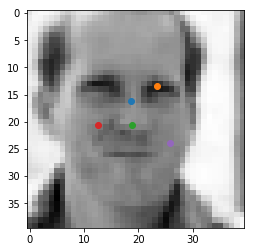

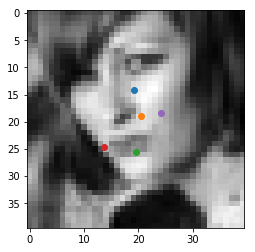

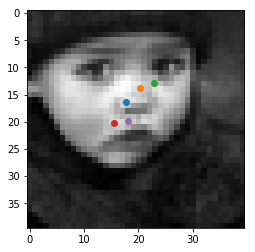

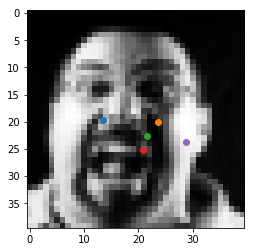

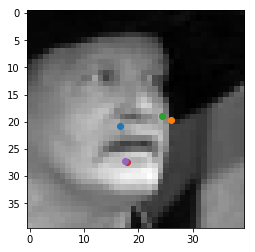


step: 6201 loss: 11.6861 


step: 6202 loss: 6.10169 


step: 6203 loss: 6.64675 


step: 6204 loss: 13.0969 


step: 6205 loss: 12.6065 


step: 6206 loss: 6.69035 


step: 6207 loss: 6.86071 


step: 6208 loss: 11.1778 


step: 6209 loss: 12.1207 


step: 6210 loss: 12.007 


step: 6211 loss: 6.22653 


step: 6212 loss: 6.34865 


step: 6213 loss: 5.967 


step: 6214 loss: 14.3803 


step: 6215 loss: 12.3206 


step: 6216 loss: 6.66066 


step: 6217 loss: 6.90107 


step: 6218 loss: 6.62546 


step: 6219 loss: 12.1625 


step: 6220 loss: 12.3683 


step: 6221 loss: 6.58444 


step: 6222 loss: 6.32085 


step: 6223 loss: 11.9146 


step: 6224 loss: 6.79139 


step: 6225 loss: 12.4003 


step: 6226 loss: 11.4977 


step: 6227 loss: 13.0764 


step: 6228 loss: 12.0036 


step: 6229 loss: 7.35305 


step: 6230 loss: 11.1658 


step: 6231 loss: 13.6444 


step: 6232 loss: 6.05035 


step: 6233 loss: 13.8572 


step: 6234 loss: 7.06633 


step: 6235 loss: 6.99458 


step: 6236 loss: 6.270

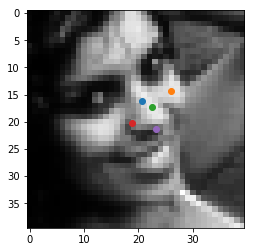

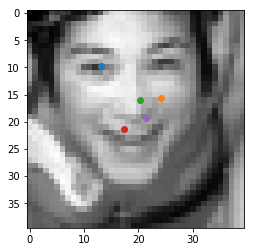

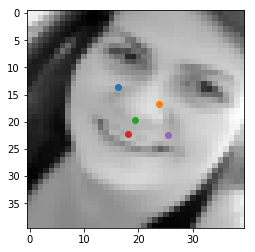

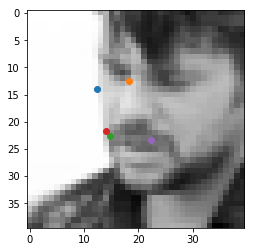

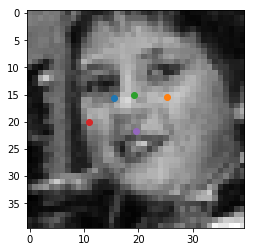


step: 6301 loss: 6.67601 


step: 6302 loss: 12.242 


step: 6303 loss: 5.90844 


step: 6304 loss: 14.1079 


step: 6305 loss: 6.75597 


step: 6306 loss: 6.44119 


step: 6307 loss: 6.14809 


step: 6308 loss: 6.13244 


step: 6309 loss: 6.0012 


step: 6310 loss: 5.91872 


step: 6311 loss: 11.3135 


step: 6312 loss: 6.44785 


step: 6313 loss: 13.4574 


step: 6314 loss: 13.0343 


step: 6315 loss: 6.87738 


step: 6316 loss: 12.2381 


step: 6317 loss: 6.43652 


step: 6318 loss: 6.22623 


step: 6319 loss: 12.0121 


step: 6320 loss: 6.18946 


step: 6321 loss: 6.36344 


step: 6322 loss: 14.0801 


step: 6323 loss: 6.74312 


step: 6324 loss: 5.85474 


step: 6325 loss: 12.617 


step: 6326 loss: 6.19856 


step: 6327 loss: 14.0897 


step: 6328 loss: 6.26571 


step: 6329 loss: 6.73364 


step: 6330 loss: 5.98545 


step: 6331 loss: 10.5825 


step: 6332 loss: 6.64306 


step: 6333 loss: 5.80078 


step: 6334 loss: 13.3858 


step: 6335 loss: 11.6491 


step: 6336 loss: 6.541

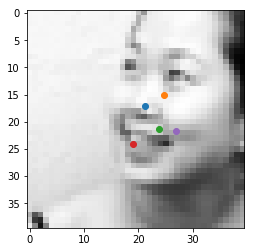

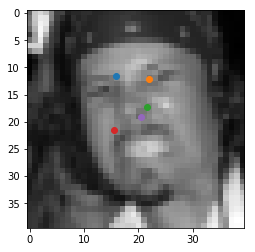

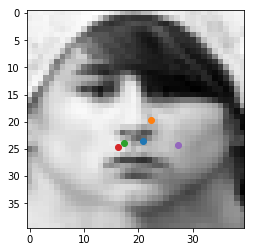

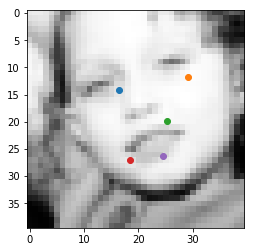

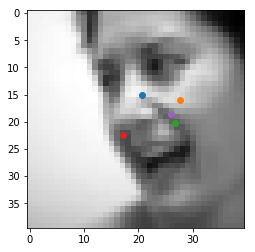


step: 6401 loss: 13.1812 


step: 6402 loss: 13.9261 


step: 6403 loss: 10.4724 


step: 6404 loss: 11.8026 


step: 6405 loss: 12.1276 


step: 6406 loss: 12.5362 


step: 6407 loss: 6.35604 


step: 6408 loss: 6.58408 


step: 6409 loss: 6.58474 


step: 6410 loss: 12.9412 


step: 6411 loss: 11.2046 


step: 6412 loss: 6.59063 


step: 6413 loss: 11.9884 


step: 6414 loss: 11.8998 


step: 6415 loss: 6.9558 


step: 6416 loss: 12.6927 


step: 6417 loss: 6.36381 


step: 6418 loss: 6.06463 


step: 6419 loss: 13.3827 


step: 6420 loss: 11.4569 


step: 6421 loss: 12.7456 


step: 6422 loss: 13.9224 


step: 6423 loss: 6.63189 


step: 6424 loss: 6.54908 


step: 6425 loss: 6.00602 


step: 6426 loss: 12.5661 


step: 6427 loss: 10.9095 


step: 6428 loss: 6.80068 


step: 6429 loss: 6.39818 


step: 6430 loss: 14.0201 


step: 6431 loss: 5.81425 


step: 6432 loss: 6.40196 


step: 6433 loss: 13.2055 


step: 6434 loss: 14.2836 


step: 6435 loss: 11.1891 


step: 6436 loss: 12.

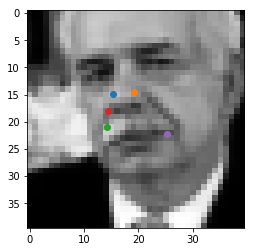

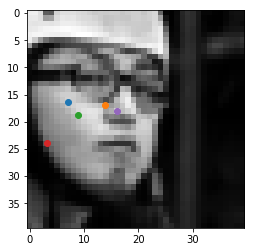

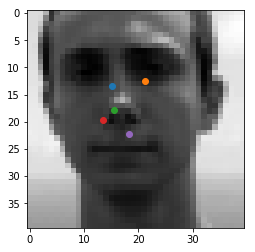

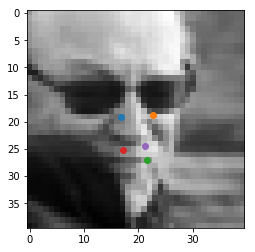

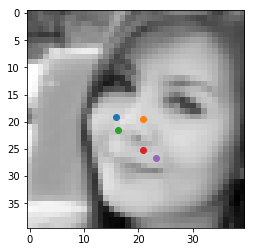


step: 6501 loss: 11.9089 


step: 6502 loss: 6.66672 


step: 6503 loss: 12.6482 


step: 6504 loss: 13.2359 


step: 6505 loss: 6.80318 


step: 6506 loss: 6.14628 


step: 6507 loss: 6.45325 


step: 6508 loss: 14.2427 


step: 6509 loss: 11.9773 


step: 6510 loss: 5.47276 


step: 6511 loss: 11.9115 


step: 6512 loss: 6.45015 


step: 6513 loss: 5.6422 


step: 6514 loss: 11.0936 


step: 6515 loss: 12.7432 


step: 6516 loss: 6.01689 


step: 6517 loss: 6.10186 


step: 6518 loss: 6.60204 


step: 6519 loss: 11.8778 


step: 6520 loss: 6.41393 


step: 6521 loss: 5.51198 


step: 6522 loss: 11.4333 


step: 6523 loss: 10.9362 


step: 6524 loss: 6.42671 


step: 6525 loss: 12.291 


step: 6526 loss: 6.26938 


step: 6527 loss: 10.3775 


step: 6528 loss: 6.67131 


step: 6529 loss: 10.6201 


step: 6530 loss: 6.38263 


step: 6531 loss: 6.15075 


step: 6532 loss: 6.32018 


step: 6533 loss: 6.20499 


step: 6534 loss: 5.90564 


step: 6535 loss: 5.74406 


step: 6536 loss: 6.33

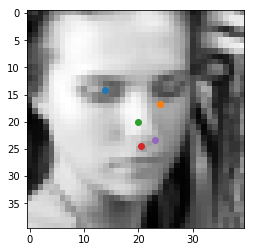

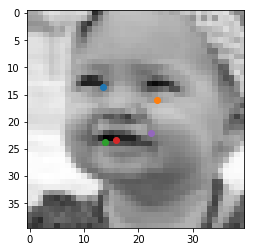

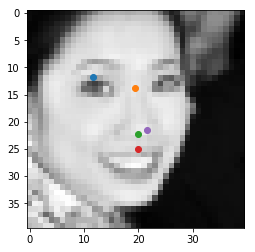


step: 6601 loss: 13.9054 


step: 6602 loss: 13.8889 


step: 6603 loss: 10.3767 


step: 6604 loss: 6.19958 


step: 6605 loss: 6.13997 


step: 6606 loss: 12.0886 


step: 6607 loss: 11.6178 


step: 6608 loss: 10.8625 


step: 6609 loss: 6.17706 


step: 6610 loss: 6.01875 


step: 6611 loss: 11.0736 


step: 6612 loss: 12.0162 


step: 6613 loss: 5.17957 


step: 6614 loss: 11.3457 


step: 6615 loss: 6.73519 


step: 6616 loss: 13.6523 


step: 6617 loss: 10.875 


step: 6618 loss: 6.97125 


step: 6619 loss: 12.2863 


step: 6620 loss: 6.52513 


step: 6621 loss: 5.794 


step: 6622 loss: 11.0086 


step: 6623 loss: 10.8825 


step: 6624 loss: 10.4927 


step: 6625 loss: 5.64666 


step: 6626 loss: 10.6549 


step: 6627 loss: 6.25265 


step: 6628 loss: 6.74232 


step: 6629 loss: 12.6711 


step: 6630 loss: 11.0448 


step: 6631 loss: 12.1503 


step: 6632 loss: 6.0598 


step: 6633 loss: 12.8914 


step: 6634 loss: 10.7349 


step: 6635 loss: 10.9943 


step: 6636 loss: 12.180

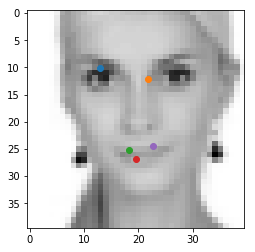

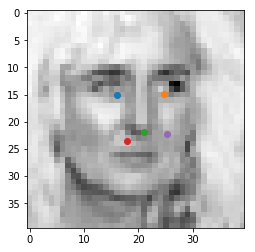

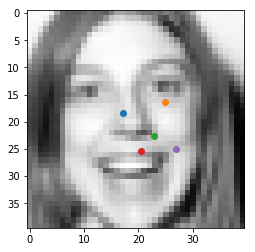


step: 6701 loss: 6.22812 


step: 6702 loss: 5.9277 


step: 6703 loss: 6.52172 


step: 6704 loss: 13.0918 


step: 6705 loss: 12.2846 


step: 6706 loss: 12.3298 


step: 6707 loss: 11.6705 


step: 6708 loss: 6.0335 


step: 6709 loss: 11.7981 


step: 6710 loss: 12.0517 


step: 6711 loss: 12.2327 


step: 6712 loss: 6.38121 


step: 6713 loss: 6.28906 


step: 6714 loss: 5.34626 


step: 6715 loss: 11.1402 


step: 6716 loss: 12.5399 


step: 6717 loss: 11.5739 


step: 6718 loss: 5.94276 


step: 6719 loss: 11.1108 


step: 6720 loss: 14.8387 


step: 6721 loss: 6.09421 


step: 6722 loss: 6.09143 


step: 6723 loss: 11.5728 


step: 6724 loss: 5.76796 


step: 6725 loss: 11.9898 


step: 6726 loss: 13.1345 


step: 6727 loss: 13.9521 


step: 6728 loss: 6.37029 


step: 6729 loss: 6.48724 


step: 6730 loss: 6.24628 


step: 6731 loss: 12.3273 


step: 6732 loss: 6.1712 


step: 6733 loss: 6.26681 


step: 6734 loss: 11.4119 


step: 6735 loss: 11.1502 


step: 6736 loss: 6.505

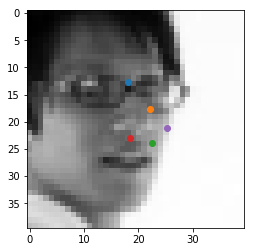

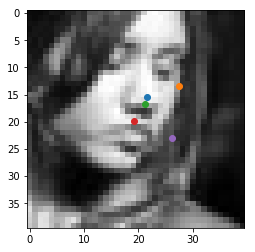

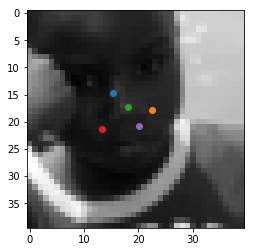


step: 6801 loss: 11.9921 


step: 6802 loss: 11.0391 


step: 6803 loss: 10.693 


step: 6804 loss: 5.66915 


step: 6805 loss: 10.2959 


step: 6806 loss: 11.0199 


step: 6807 loss: 6.37596 


step: 6808 loss: 11.7504 


step: 6809 loss: 12.0072 


step: 6810 loss: 6.03924 


step: 6811 loss: 12.6578 


step: 6812 loss: 6.39496 


step: 6813 loss: 6.31369 


step: 6814 loss: 10.738 


step: 6815 loss: 9.54843 


step: 6816 loss: 12.4983 


step: 6817 loss: 5.91463 


step: 6818 loss: 6.3038 


step: 6819 loss: 11.4669 


step: 6820 loss: 6.17477 


step: 6821 loss: 6.36954 


step: 6822 loss: 6.6112 


step: 6823 loss: 12.6449 


step: 6824 loss: 9.70552 


step: 6825 loss: 6.37024 


step: 6826 loss: 12.9738 


step: 6827 loss: 10.5876 


step: 6828 loss: 6.36836 


step: 6829 loss: 6.27664 


step: 6830 loss: 5.89514 


step: 6831 loss: 11.6103 


step: 6832 loss: 10.7683 


step: 6833 loss: 10.9941 


step: 6834 loss: 5.92873 


step: 6835 loss: 12.6623 


step: 6836 loss: 6.1052

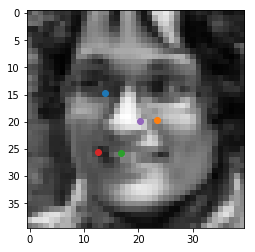

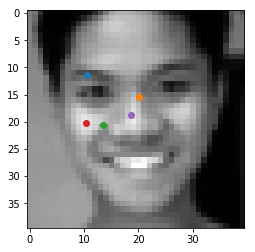

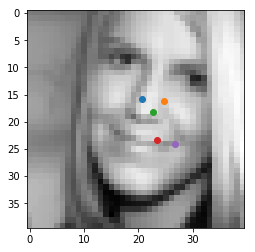


step: 6901 loss: 6.1415 


step: 6902 loss: 12.2774 


step: 6903 loss: 10.3214 


step: 6904 loss: 10.5411 


step: 6905 loss: 10.3914 


step: 6906 loss: 12.298 


step: 6907 loss: 5.37503 


step: 6908 loss: 11.8071 


step: 6909 loss: 5.82346 


step: 6910 loss: 10.5419 


step: 6911 loss: 5.86303 


step: 6912 loss: 5.71889 


step: 6913 loss: 12.45 


step: 6914 loss: 5.76136 


step: 6915 loss: 6.17943 


step: 6916 loss: 6.46804 


step: 6917 loss: 5.92508 


step: 6918 loss: 5.66623 


step: 6919 loss: 5.77768 


step: 6920 loss: 12.1135 


step: 6921 loss: 12.7995 


step: 6922 loss: 5.95248 


step: 6923 loss: 6.86224 


step: 6924 loss: 5.9442 


step: 6925 loss: 6.13938 


step: 6926 loss: 11.1852 


step: 6927 loss: 5.93993 


step: 6928 loss: 6.19626 


step: 6929 loss: 10.667 


step: 6930 loss: 6.07324 


step: 6931 loss: 9.42141 


step: 6932 loss: 11.0616 


step: 6933 loss: 5.61244 


step: 6934 loss: 12.05 


step: 6935 loss: 11.4931 


step: 6936 loss: 12.2928 



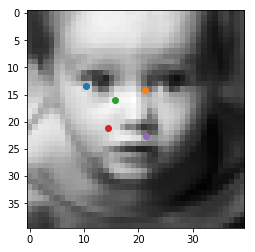

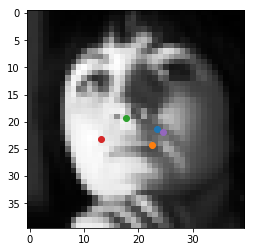

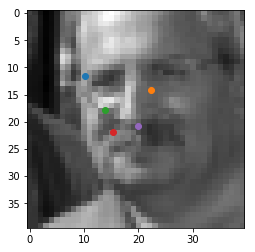

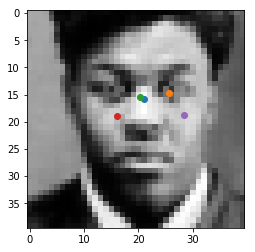

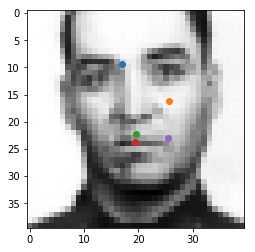


step: 7001 loss: 11.7448 


step: 7002 loss: 11.0461 


step: 7003 loss: 10.4988 


step: 7004 loss: 6.50842 


step: 7005 loss: 10.6747 


step: 7006 loss: 12.7155 


step: 7007 loss: 12.4222 


step: 7008 loss: 5.4218 


step: 7009 loss: 6.31143 


step: 7010 loss: 6.15022 


step: 7011 loss: 10.4491 


step: 7012 loss: 10.4222 


step: 7013 loss: 6.20304 


step: 7014 loss: 12.9981 


step: 7015 loss: 12.9933 


step: 7016 loss: 5.58424 


step: 7017 loss: 11.333 


step: 7018 loss: 12.096 


step: 7019 loss: 5.82027 


step: 7020 loss: 11.2402 


step: 7021 loss: 11.5131 


step: 7022 loss: 5.68523 


step: 7023 loss: 5.44039 


step: 7024 loss: 5.43552 


step: 7025 loss: 11.828 


step: 7026 loss: 12.111 


step: 7027 loss: 5.91668 


step: 7028 loss: 11.2227 


step: 7029 loss: 11.367 


step: 7030 loss: 10.1522 


step: 7031 loss: 10.4971 


step: 7032 loss: 11.1581 


step: 7033 loss: 5.70414 


step: 7034 loss: 6.55978 


step: 7035 loss: 5.42893 


step: 7036 loss: 9.15063 

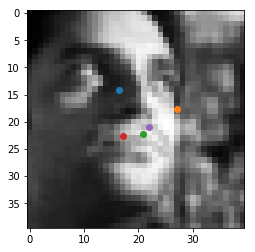

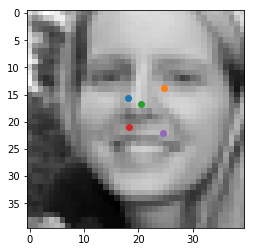


step: 7101 loss: 10.4617 


step: 7102 loss: 10.6957 


step: 7103 loss: 5.75481 


step: 7104 loss: 11.4603 


step: 7105 loss: 13.356 


step: 7106 loss: 10.7916 


step: 7107 loss: 6.21022 


step: 7108 loss: 5.62232 


step: 7109 loss: 5.70954 


step: 7110 loss: 5.44958 


step: 7111 loss: 5.69417 


step: 7112 loss: 11.46 


step: 7113 loss: 10.9 


step: 7114 loss: 5.51208 


step: 7115 loss: 5.71666 


step: 7116 loss: 10.083 


step: 7117 loss: 5.8406 


step: 7118 loss: 6.17617 


step: 7119 loss: 5.34154 


step: 7120 loss: 10.5628 


step: 7121 loss: 11.2966 


step: 7122 loss: 11.4216 


step: 7123 loss: 9.38903 


step: 7124 loss: 12.0721 


step: 7125 loss: 6.27919 


step: 7126 loss: 6.15714 


step: 7127 loss: 5.62384 


step: 7128 loss: 6.28698 


step: 7129 loss: 5.46758 


step: 7130 loss: 5.94079 


step: 7131 loss: 11.4562 


step: 7132 loss: 5.36388 


step: 7133 loss: 12.3522 


step: 7134 loss: 11.6759 


step: 7135 loss: 10.6404 


step: 7136 loss: 6.43355 



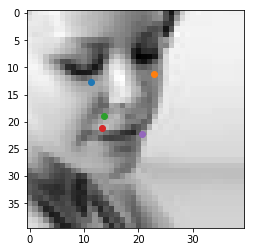

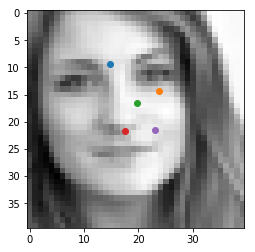

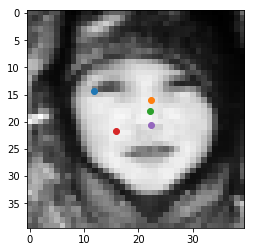

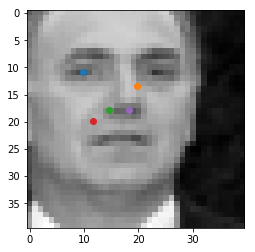

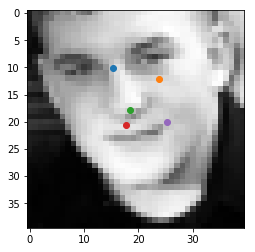


step: 7201 loss: 5.73205 


step: 7202 loss: 9.74305 


step: 7203 loss: 6.17797 


step: 7204 loss: 5.51746 


step: 7205 loss: 12.1275 


step: 7206 loss: 11.6767 


step: 7207 loss: 10.6521 


step: 7208 loss: 5.76607 


step: 7209 loss: 5.88351 


step: 7210 loss: 10.9278 


step: 7211 loss: 5.65715 


step: 7212 loss: 5.61986 


step: 7213 loss: 11.2515 


step: 7214 loss: 5.61179 


step: 7215 loss: 13.031 


step: 7216 loss: 11.7654 


step: 7217 loss: 5.12271 


step: 7218 loss: 11.5699 


step: 7219 loss: 10.0795 


step: 7220 loss: 5.81656 


step: 7221 loss: 9.86279 


step: 7222 loss: 5.5258 


step: 7223 loss: 5.42156 


step: 7224 loss: 10.1066 


step: 7225 loss: 5.4778 


step: 7226 loss: 9.993 


step: 7227 loss: 10.9224 


step: 7228 loss: 5.52666 


step: 7229 loss: 11.902 


step: 7230 loss: 5.22719 


step: 7231 loss: 6.2536 


step: 7232 loss: 11.7608 


step: 7233 loss: 5.36763 


step: 7234 loss: 10.6881 


step: 7235 loss: 12.1812 


step: 7236 loss: 12.0593 


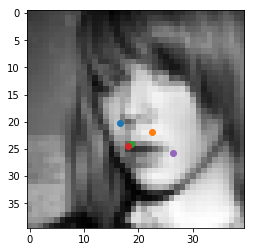

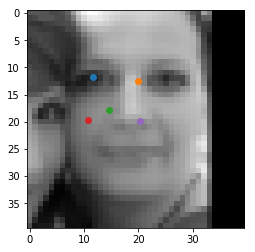


step: 7301 loss: 11.0855 


step: 7302 loss: 9.16185 


step: 7303 loss: 5.15833 


step: 7304 loss: 10.6792 


step: 7305 loss: 5.7087 


step: 7306 loss: 10.5764 


step: 7307 loss: 5.82995 


step: 7308 loss: 5.61471 


step: 7309 loss: 9.77322 


step: 7310 loss: 5.28398 


step: 7311 loss: 10.9532 


step: 7312 loss: 5.27534 


step: 7313 loss: 5.5858 


step: 7314 loss: 12.738 


step: 7315 loss: 5.54228 


step: 7316 loss: 10.017 


step: 7317 loss: 11.4883 


step: 7318 loss: 10.0758 


step: 7319 loss: 10.7841 


step: 7320 loss: 10.4193 


step: 7321 loss: 5.41637 


step: 7322 loss: 5.62228 


step: 7323 loss: 5.87581 


step: 7324 loss: 5.03018 


step: 7325 loss: 11.7909 


step: 7326 loss: 11.3055 


step: 7327 loss: 11.1973 


step: 7328 loss: 11.3131 


step: 7329 loss: 5.08392 


step: 7330 loss: 10.4062 


step: 7331 loss: 11.4414 


step: 7332 loss: 5.83084 


step: 7333 loss: 5.93114 


step: 7334 loss: 11.5209 


step: 7335 loss: 10.7692 


step: 7336 loss: 11.500

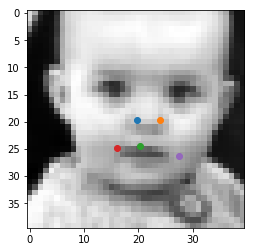

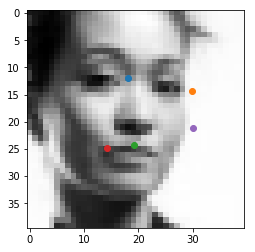

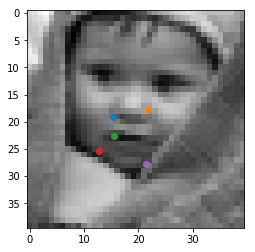

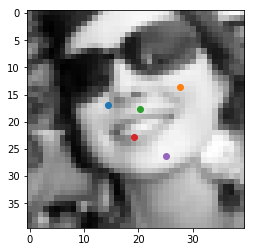


step: 7401 loss: 5.52643 


step: 7402 loss: 10.3214 


step: 7403 loss: 5.28573 


step: 7404 loss: 5.22299 


step: 7405 loss: 5.94262 


step: 7406 loss: 12.226 


step: 7407 loss: 10.0557 


step: 7408 loss: 9.06058 


step: 7409 loss: 5.80766 


step: 7410 loss: 11.649 


step: 7411 loss: 5.30164 


step: 7412 loss: 6.09315 


step: 7413 loss: 4.99918 


step: 7414 loss: 10.6147 


step: 7415 loss: 10.3273 


step: 7416 loss: 5.40464 


step: 7417 loss: 5.53789 


step: 7418 loss: 5.64661 


step: 7419 loss: 10.7594 


step: 7420 loss: 5.6027 


step: 7421 loss: 5.22738 


step: 7422 loss: 10.5547 


step: 7423 loss: 5.4151 


step: 7424 loss: 5.69139 


step: 7425 loss: 5.89153 


step: 7426 loss: 5.71373 


step: 7427 loss: 11.0411 


step: 7428 loss: 5.07108 


step: 7429 loss: 5.31869 


step: 7430 loss: 5.18444 


step: 7431 loss: 10.9677 


step: 7432 loss: 5.67198 


step: 7433 loss: 10.0144 


step: 7434 loss: 5.22447 


step: 7435 loss: 5.21408 


step: 7436 loss: 5.3448

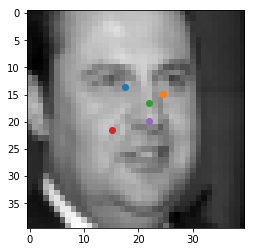

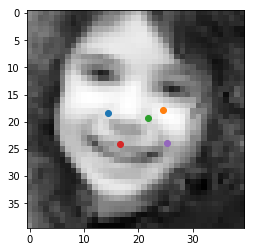

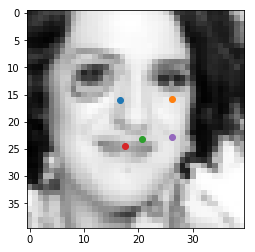


step: 7501 loss: 5.93268 


step: 7502 loss: 5.56108 


step: 7503 loss: 4.98165 


step: 7504 loss: 11.0619 


step: 7505 loss: 11.6487 


step: 7506 loss: 5.95793 


step: 7507 loss: 10.7324 


step: 7508 loss: 13.4541 


step: 7509 loss: 11.4549 


step: 7510 loss: 9.6576 


step: 7511 loss: 9.37254 


step: 7512 loss: 9.73195 


step: 7513 loss: 5.13622 


step: 7514 loss: 5.39207 


step: 7515 loss: 10.96 


step: 7516 loss: 9.35684 


step: 7517 loss: 10.3677 


step: 7518 loss: 5.16176 


step: 7519 loss: 5.35774 


step: 7520 loss: 10.4077 


step: 7521 loss: 5.72155 


step: 7522 loss: 5.88667 


step: 7523 loss: 11.2433 


step: 7524 loss: 5.01258 


step: 7525 loss: 5.2926 


step: 7526 loss: 5.61853 


step: 7527 loss: 11.0311 


step: 7528 loss: 10.6416 


step: 7529 loss: 9.75315 


step: 7530 loss: 10.8823 


step: 7531 loss: 5.82634 


step: 7532 loss: 11.1329 


step: 7533 loss: 5.54573 


step: 7534 loss: 11.5237 


step: 7535 loss: 5.68976 


step: 7536 loss: 5.6428

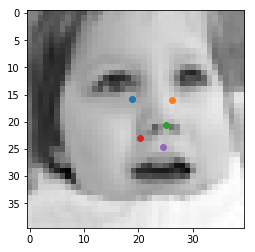

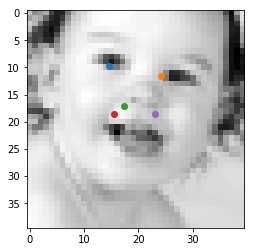

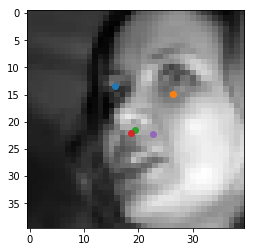

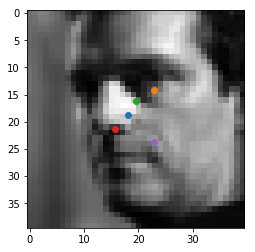

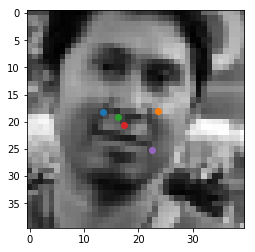


step: 7601 loss: 5.56918 


step: 7602 loss: 10.4094 


step: 7603 loss: 5.58592 


step: 7604 loss: 5.84048 


step: 7605 loss: 9.97524 


step: 7606 loss: 5.49934 


step: 7607 loss: 5.04171 


step: 7608 loss: 10.3899 


step: 7609 loss: 11.325 


step: 7610 loss: 8.86634 


step: 7611 loss: 5.72615 


step: 7612 loss: 5.53472 


step: 7613 loss: 5.54524 


step: 7614 loss: 11.2888 


step: 7615 loss: 4.75473 


step: 7616 loss: 5.19837 


step: 7617 loss: 5.07066 


step: 7618 loss: 5.06917 


step: 7619 loss: 5.22108 


step: 7620 loss: 11.3236 


step: 7621 loss: 4.96338 


step: 7622 loss: 10.1342 


step: 7623 loss: 10.7423 


step: 7624 loss: 5.0043 


step: 7625 loss: 10.7153 


step: 7626 loss: 5.36559 


step: 7627 loss: 5.20747 


step: 7628 loss: 9.37088 


step: 7629 loss: 5.55708 


step: 7630 loss: 5.20567 


step: 7631 loss: 5.749 


step: 7632 loss: 10.5885 


step: 7633 loss: 9.71286 


step: 7634 loss: 11.0958 


step: 7635 loss: 10.1081 


step: 7636 loss: 11.038

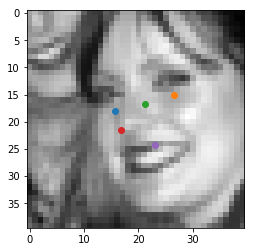

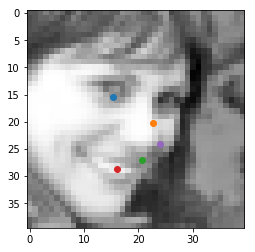

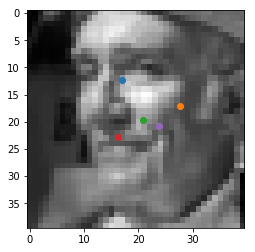

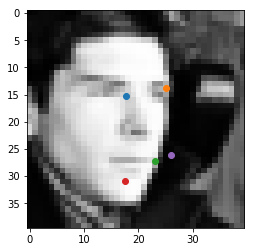

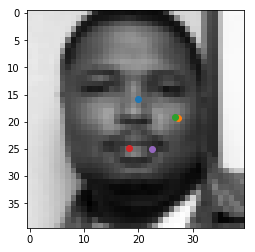


step: 7701 loss: 5.00792 


step: 7702 loss: 5.22021 


step: 7703 loss: 6.10873 


step: 7704 loss: 10.6728 


step: 7705 loss: 10.2681 


step: 7706 loss: 10.9271 


step: 7707 loss: 9.03776 


step: 7708 loss: 9.28738 


step: 7709 loss: 5.60496 


step: 7710 loss: 5.62041 


step: 7711 loss: 11.5391 


step: 7712 loss: 5.545 


step: 7713 loss: 5.47729 


step: 7714 loss: 10.3518 


step: 7715 loss: 10.3734 


step: 7716 loss: 5.29375 


step: 7717 loss: 5.48064 


step: 7718 loss: 4.88144 


step: 7719 loss: 10.7942 


step: 7720 loss: 9.91701 


step: 7721 loss: 11.4475 


step: 7722 loss: 10.6065 


step: 7723 loss: 9.80121 


step: 7724 loss: 5.57377 


step: 7725 loss: 5.73322 


step: 7726 loss: 9.38724 


step: 7727 loss: 5.16158 


step: 7728 loss: 9.88244 


step: 7729 loss: 5.44176 


step: 7730 loss: 10.4589 


step: 7731 loss: 10.946 


step: 7732 loss: 10.9613 


step: 7733 loss: 9.69555 


step: 7734 loss: 5.20628 


step: 7735 loss: 10.9462 


step: 7736 loss: 4.987

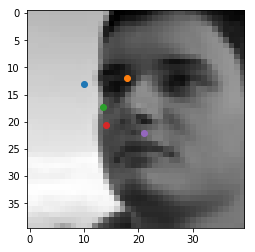

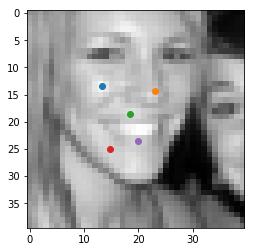

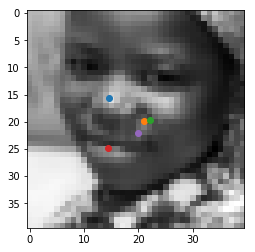

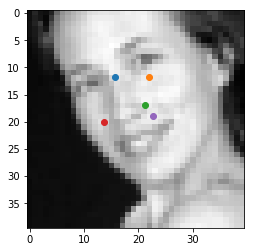

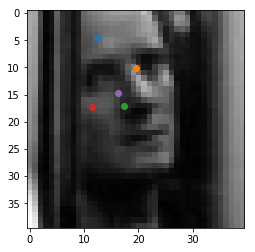


step: 7801 loss: 9.4616 


step: 7802 loss: 5.27823 


step: 7803 loss: 4.76107 


step: 7804 loss: 10.0787 


step: 7805 loss: 10.0401 


step: 7806 loss: 5.26744 


step: 7807 loss: 10.5277 


step: 7808 loss: 5.32307 


step: 7809 loss: 10.7805 


step: 7810 loss: 9.09544 


step: 7811 loss: 5.08327 


step: 7812 loss: 9.73844 


step: 7813 loss: 11.3804 


step: 7814 loss: 9.81149 


step: 7815 loss: 5.32843 


step: 7816 loss: 5.08109 


step: 7817 loss: 5.77919 


step: 7818 loss: 4.86611 


step: 7819 loss: 10.3793 


step: 7820 loss: 10.1267 


step: 7821 loss: 10.6766 


step: 7822 loss: 5.56035 


step: 7823 loss: 8.90651 


step: 7824 loss: 5.36435 


step: 7825 loss: 9.37369 


step: 7826 loss: 9.56991 


step: 7827 loss: 5.23592 


step: 7828 loss: 8.08912 


step: 7829 loss: 4.96963 


step: 7830 loss: 5.45323 


step: 7831 loss: 5.52461 


step: 7832 loss: 5.41805 


step: 7833 loss: 10.5838 


step: 7834 loss: 10.1459 


step: 7835 loss: 5.40645 


step: 7836 loss: 10.

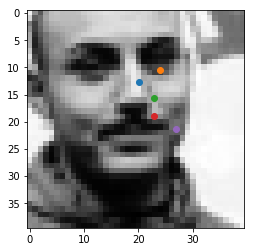

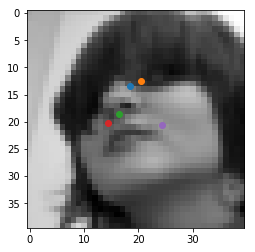

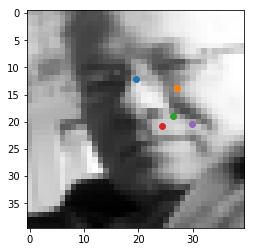

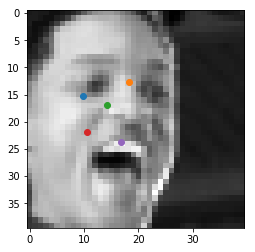

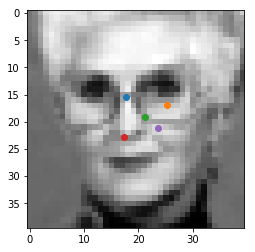


step: 7901 loss: 10.4193 


step: 7902 loss: 5.3823 


step: 7903 loss: 9.19202 


step: 7904 loss: 9.89607 


step: 7905 loss: 8.4833 


step: 7906 loss: 6.1494 


step: 7907 loss: 9.09505 


step: 7908 loss: 11.0842 


step: 7909 loss: 5.08465 


step: 7910 loss: 5.19724 


step: 7911 loss: 11.318 


step: 7912 loss: 5.67937 


step: 7913 loss: 8.77945 


step: 7914 loss: 5.59684 


step: 7915 loss: 5.69685 


step: 7916 loss: 6.21677 


step: 7917 loss: 5.38042 


step: 7918 loss: 5.37469 


step: 7919 loss: 5.28192 


step: 7920 loss: 9.36281 


step: 7921 loss: 5.52225 


step: 7922 loss: 5.52761 


step: 7923 loss: 5.40391 


step: 7924 loss: 5.55861 


step: 7925 loss: 5.35575 


step: 7926 loss: 4.65214 


step: 7927 loss: 9.34015 


step: 7928 loss: 9.92711 


step: 7929 loss: 10.6877 


step: 7930 loss: 5.14227 


step: 7931 loss: 5.00875 


step: 7932 loss: 10.5843 


step: 7933 loss: 9.44132 


step: 7934 loss: 4.50414 


step: 7935 loss: 5.30823 


step: 7936 loss: 9.7197

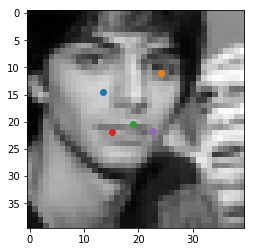

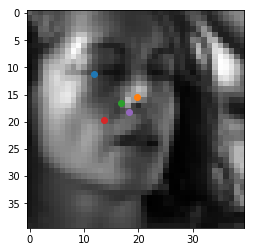

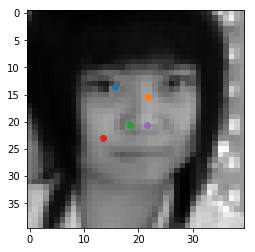

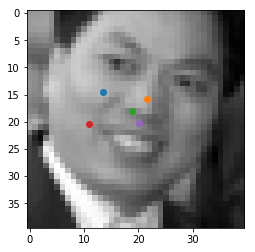

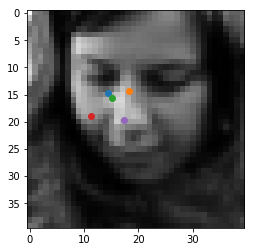


step: 8001 loss: 4.92592 


step: 8002 loss: 9.32372 


step: 8003 loss: 10.3319 


step: 8004 loss: 4.96138 


step: 8005 loss: 5.43136 


step: 8006 loss: 5.26941 


step: 8007 loss: 9.11613 


step: 8008 loss: 4.87245 


step: 8009 loss: 4.50847 


step: 8010 loss: 11.5886 


step: 8011 loss: 4.50638 


step: 8012 loss: 4.90137 


step: 8013 loss: 4.50322 


step: 8014 loss: 10.9864 


step: 8015 loss: 5.19579 


step: 8016 loss: 5.2111 


step: 8017 loss: 4.49925 


step: 8018 loss: 9.54774 


step: 8019 loss: 4.96262 


step: 8020 loss: 4.78704 


step: 8021 loss: 10.3547 


step: 8022 loss: 10.4648 


step: 8023 loss: 4.56328 


step: 8024 loss: 4.55988 


step: 8025 loss: 4.60317 


step: 8026 loss: 4.92435 


step: 8027 loss: 9.63045 


step: 8028 loss: 10.4142 


step: 8029 loss: 10.9188 


step: 8030 loss: 10.4672 


step: 8031 loss: 9.37043 


step: 8032 loss: 5.28253 


step: 8033 loss: 4.9345 


step: 8034 loss: 9.38422 


step: 8035 loss: 10.2809 


step: 8036 loss: 10.2

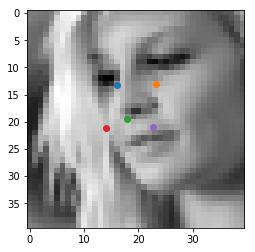

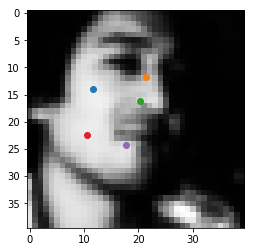

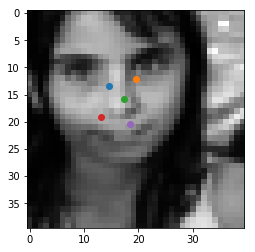

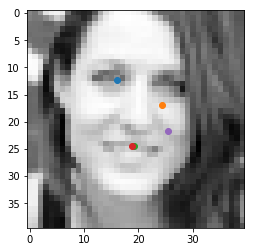

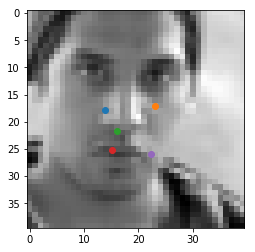


step: 8101 loss: 4.58255 


step: 8102 loss: 5.23172 


step: 8103 loss: 10.6119 


step: 8104 loss: 4.8768 


step: 8105 loss: 9.75625 


step: 8106 loss: 5.3923 


step: 8107 loss: 4.85822 


step: 8108 loss: 4.89111 


step: 8109 loss: 11.9357 


step: 8110 loss: 9.6548 


step: 8111 loss: 10.8728 


step: 8112 loss: 11.6224 


step: 8113 loss: 4.84899 


step: 8114 loss: 10.5108 


step: 8115 loss: 10.5336 


step: 8116 loss: 4.56832 


step: 8117 loss: 11.8106 


step: 8118 loss: 5.06607 


step: 8119 loss: 10.1103 


step: 8120 loss: 8.43503 


step: 8121 loss: 4.5461 


step: 8122 loss: 5.67895 


step: 8123 loss: 8.90595 


step: 8124 loss: 9.26034 


step: 8125 loss: 11.091 


step: 8126 loss: 5.30986 


step: 8127 loss: 4.68424 


step: 8128 loss: 5.11806 


step: 8129 loss: 9.19798 


step: 8130 loss: 8.62562 


step: 8131 loss: 5.09075 


step: 8132 loss: 4.72603 


step: 8133 loss: 4.82685 


step: 8134 loss: 10.0175 


step: 8135 loss: 10.1245 


step: 8136 loss: 5.34612

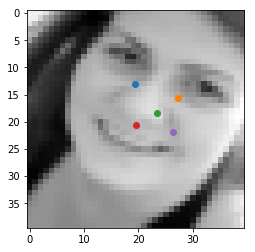

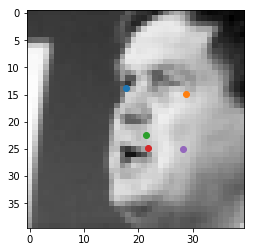

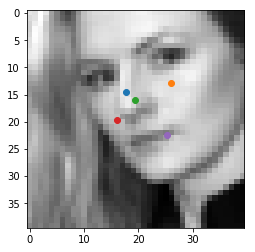

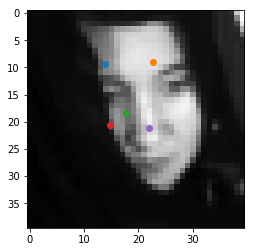

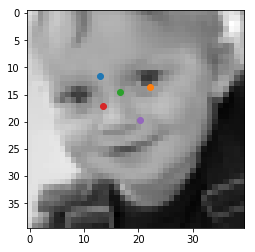


step: 8201 loss: 9.95457 


step: 8202 loss: 4.86152 


step: 8203 loss: 4.55009 


step: 8204 loss: 10.2614 


step: 8205 loss: 4.83042 


step: 8206 loss: 5.18292 


step: 8207 loss: 9.88041 


step: 8208 loss: 8.19452 


step: 8209 loss: 4.94331 


step: 8210 loss: 11.145 


step: 8211 loss: 4.58277 


step: 8212 loss: 4.71017 


step: 8213 loss: 9.88318 


step: 8214 loss: 11.6132 


step: 8215 loss: 5.26428 


step: 8216 loss: 9.08124 


step: 8217 loss: 5.56693 


step: 8218 loss: 4.49131 


step: 8219 loss: 11.9919 


step: 8220 loss: 4.77549 


step: 8221 loss: 10.0848 


step: 8222 loss: 4.5196 


step: 8223 loss: 4.65592 


step: 8224 loss: 4.61937 


step: 8225 loss: 4.53289 


step: 8226 loss: 4.7479 


step: 8227 loss: 8.90437 


step: 8228 loss: 9.10551 


step: 8229 loss: 8.97338 


step: 8230 loss: 9.54205 


step: 8231 loss: 9.21 


step: 8232 loss: 4.66671 


step: 8233 loss: 10.4007 


step: 8234 loss: 10.3024 


step: 8235 loss: 5.10223 


step: 8236 loss: 9.262 



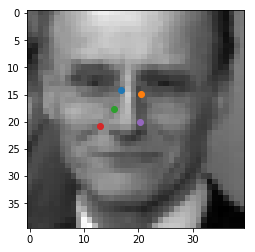

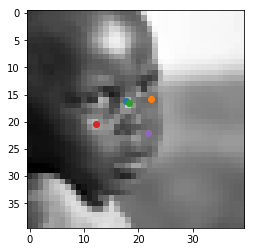

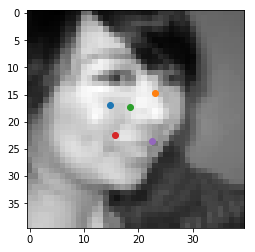

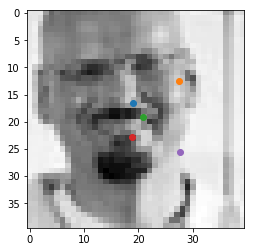

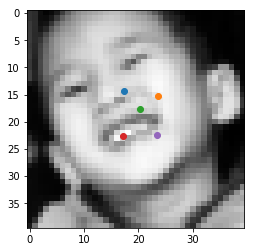


step: 8301 loss: 10.4628 


step: 8302 loss: 4.66333 


step: 8303 loss: 9.66966 


step: 8304 loss: 9.30058 


step: 8305 loss: 8.3732 


step: 8306 loss: 9.04928 


step: 8307 loss: 5.14243 


step: 8308 loss: 4.8084 


step: 8309 loss: 4.93589 


step: 8310 loss: 9.96715 


step: 8311 loss: 4.96925 


step: 8312 loss: 4.3937 


step: 8313 loss: 8.48989 


step: 8314 loss: 4.90337 


step: 8315 loss: 5.03993 


step: 8316 loss: 4.73616 


step: 8317 loss: 4.98599 


step: 8318 loss: 9.60697 


step: 8319 loss: 4.43964 


step: 8320 loss: 10.4252 


step: 8321 loss: 5.02364 


step: 8322 loss: 9.04731 


step: 8323 loss: 4.7519 


step: 8324 loss: 9.69041 


step: 8325 loss: 9.43176 


step: 8326 loss: 4.67458 


step: 8327 loss: 4.41424 


step: 8328 loss: 9.61329 


step: 8329 loss: 10.5471 


step: 8330 loss: 10.8161 


step: 8331 loss: 11.0908 


step: 8332 loss: 4.39896 


step: 8333 loss: 4.19133 


step: 8334 loss: 4.47147 


step: 8335 loss: 9.72624 


step: 8336 loss: 4.7043

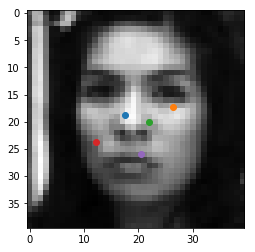

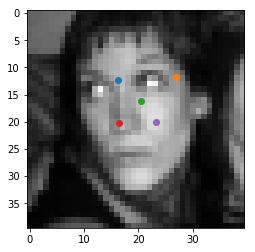

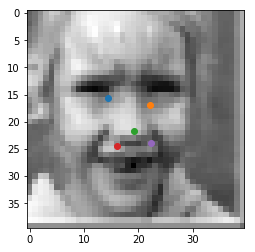

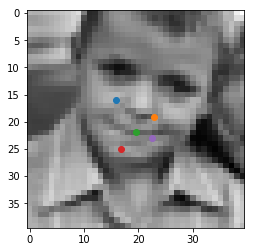


step: 8401 loss: 4.8321 


step: 8402 loss: 8.9371 


step: 8403 loss: 10.7807 


step: 8404 loss: 4.46994 


step: 8405 loss: 9.04651 


step: 8406 loss: 4.55724 


step: 8407 loss: 9.15504 


step: 8408 loss: 9.88901 


step: 8409 loss: 4.82635 


step: 8410 loss: 9.67634 


step: 8411 loss: 4.63501 


step: 8412 loss: 9.32351 


step: 8413 loss: 4.58199 


step: 8414 loss: 5.1134 


step: 8415 loss: 9.12485 


step: 8416 loss: 8.76931 


step: 8417 loss: 9.43574 


step: 8418 loss: 9.47951 


step: 8419 loss: 4.99095 


step: 8420 loss: 4.77859 


step: 8421 loss: 4.35459 


step: 8422 loss: 4.43639 


step: 8423 loss: 10.0503 


step: 8424 loss: 4.11489 


step: 8425 loss: 5.28017 


step: 8426 loss: 4.79065 


step: 8427 loss: 4.49121 


step: 8428 loss: 10.7901 


step: 8429 loss: 4.96175 


step: 8430 loss: 4.79286 


step: 8431 loss: 4.63448 


step: 8432 loss: 9.52362 


step: 8433 loss: 4.16616 


step: 8434 loss: 4.3731 


step: 8435 loss: 10.4922 


step: 8436 loss: 9.5463

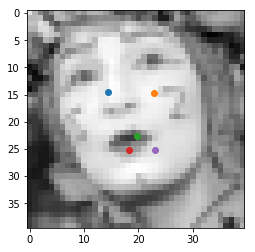

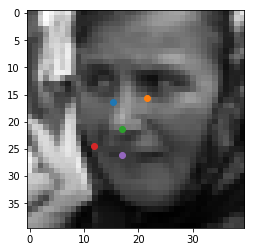

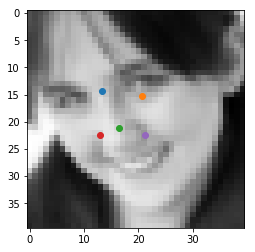

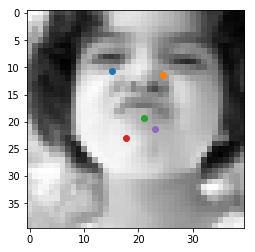


step: 8501 loss: 4.03172 


step: 8502 loss: 9.19758 


step: 8503 loss: 8.7679 


step: 8504 loss: 8.39573 


step: 8505 loss: 4.66445 


step: 8506 loss: 10.4994 


step: 8507 loss: 10.4424 


step: 8508 loss: 4.66207 


step: 8509 loss: 4.37319 


step: 8510 loss: 4.47532 


step: 8511 loss: 4.61246 


step: 8512 loss: 4.10481 


step: 8513 loss: 10.9072 


step: 8514 loss: 4.4903 


step: 8515 loss: 4.76316 


step: 8516 loss: 9.04705 


step: 8517 loss: 11.3869 


step: 8518 loss: 10.5834 


step: 8519 loss: 4.49979 


step: 8520 loss: 10.6725 


step: 8521 loss: 10.0517 


step: 8522 loss: 9.25065 


step: 8523 loss: 5.0709 


step: 8524 loss: 9.90233 


step: 8525 loss: 4.52427 


step: 8526 loss: 10.3853 


step: 8527 loss: 10.687 


step: 8528 loss: 5.03182 


step: 8529 loss: 5.16774 


step: 8530 loss: 10.599 


step: 8531 loss: 4.69698 


step: 8532 loss: 4.1641 


step: 8533 loss: 9.20871 


step: 8534 loss: 8.60738 


step: 8535 loss: 4.5763 


step: 8536 loss: 4.28078 


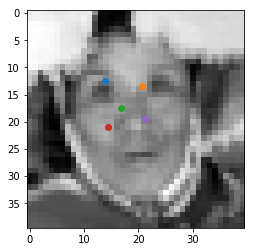

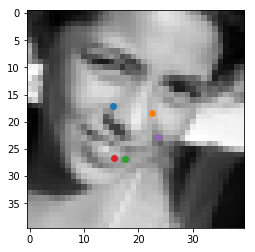


step: 8601 loss: 9.59932 


step: 8602 loss: 4.45607 


step: 8603 loss: 4.47534 


step: 8604 loss: 4.52364 


step: 8605 loss: 4.41075 


step: 8606 loss: 4.27641 


step: 8607 loss: 4.60818 


step: 8608 loss: 4.04161 


step: 8609 loss: 4.43566 


step: 8610 loss: 8.98154 


step: 8611 loss: 9.76104 


step: 8612 loss: 9.75616 


step: 8613 loss: 9.3989 


step: 8614 loss: 4.89363 


step: 8615 loss: 4.81909 


step: 8616 loss: 4.1915 


step: 8617 loss: 4.25011 


step: 8618 loss: 4.48637 


step: 8619 loss: 9.87043 


step: 8620 loss: 8.814 


step: 8621 loss: 9.45541 


step: 8622 loss: 5.06271 


step: 8623 loss: 8.93024 


step: 8624 loss: 8.78407 


step: 8625 loss: 9.69019 


step: 8626 loss: 4.44788 


step: 8627 loss: 4.16032 


step: 8628 loss: 4.61855 


step: 8629 loss: 8.76685 


step: 8630 loss: 9.51075 


step: 8631 loss: 9.38114 


step: 8632 loss: 4.58651 


step: 8633 loss: 4.86341 


step: 8634 loss: 4.9482 


step: 8635 loss: 4.38681 


step: 8636 loss: 9.15845

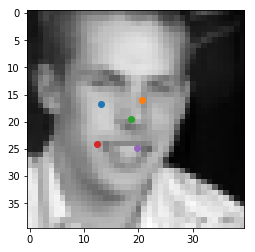

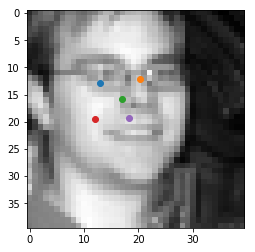

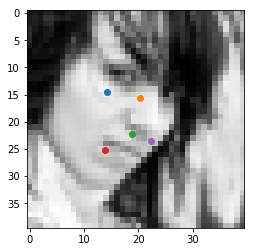


step: 8701 loss: 9.31329 


step: 8702 loss: 4.31013 


step: 8703 loss: 8.39859 


step: 8704 loss: 8.76292 


step: 8705 loss: 4.10084 


step: 8706 loss: 4.54761 


step: 8707 loss: 8.50984 


step: 8708 loss: 4.74852 


step: 8709 loss: 9.45812 


step: 8710 loss: 4.56459 


step: 8711 loss: 4.24474 


step: 8712 loss: 4.92123 


step: 8713 loss: 8.77396 


step: 8714 loss: 9.81133 


step: 8715 loss: 8.79737 


step: 8716 loss: 9.48642 


step: 8717 loss: 4.23673 


step: 8718 loss: 9.11037 


step: 8719 loss: 9.63007 


step: 8720 loss: 4.86664 


step: 8721 loss: 4.57257 


step: 8722 loss: 9.08146 


step: 8723 loss: 4.75454 


step: 8724 loss: 4.55167 


step: 8725 loss: 4.29123 


step: 8726 loss: 10.9137 


step: 8727 loss: 4.66214 


step: 8728 loss: 9.36446 


step: 8729 loss: 4.36014 


step: 8730 loss: 8.35716 


step: 8731 loss: 8.80128 


step: 8732 loss: 4.6191 


step: 8733 loss: 8.92745 


step: 8734 loss: 11.4181 


step: 8735 loss: 8.93552 


step: 8736 loss: 9.6

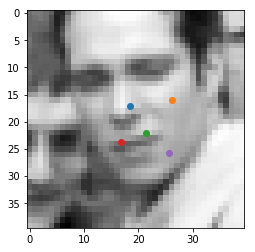


step: 8801 loss: 4.89836 


step: 8802 loss: 4.45183 


step: 8803 loss: 8.63637 


step: 8804 loss: 4.95177 


step: 8805 loss: 9.72382 


step: 8806 loss: 8.61457 


step: 8807 loss: 4.03418 


step: 8808 loss: 4.57339 


step: 8809 loss: 8.3055 


step: 8810 loss: 4.36397 


step: 8811 loss: 9.61244 


step: 8812 loss: 7.90556 


step: 8813 loss: 8.34729 


step: 8814 loss: 7.97557 


step: 8815 loss: 8.4444 


step: 8816 loss: 9.53351 


step: 8817 loss: 4.72337 


step: 8818 loss: 4.30116 


step: 8819 loss: 5.0899 


step: 8820 loss: 5.07887 


step: 8821 loss: 4.39854 


step: 8822 loss: 8.65123 


step: 8823 loss: 9.76063 


step: 8824 loss: 5.15809 


step: 8825 loss: 4.66316 


step: 8826 loss: 8.84852 


step: 8827 loss: 4.35597 


step: 8828 loss: 9.06195 


step: 8829 loss: 10.3981 


step: 8830 loss: 4.72217 


step: 8831 loss: 9.20769 


step: 8832 loss: 8.06205 


step: 8833 loss: 8.8619 


step: 8834 loss: 4.58672 


step: 8835 loss: 9.97978 


step: 8836 loss: 8.8243

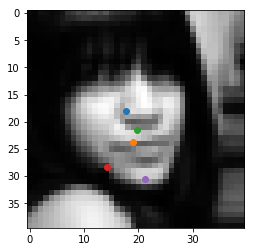

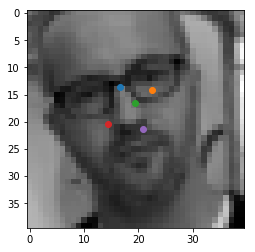

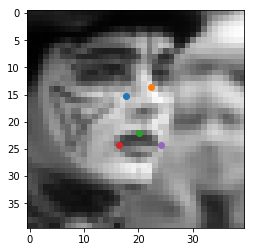

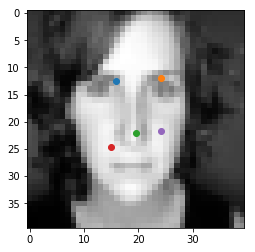


step: 8901 loss: 4.39553 


step: 8902 loss: 8.2542 


step: 8903 loss: 9.09966 


step: 8904 loss: 9.34573 


step: 8905 loss: 9.71802 


step: 8906 loss: 4.39684 


step: 8907 loss: 4.07442 


step: 8908 loss: 4.31193 


step: 8909 loss: 4.69884 


step: 8910 loss: 9.05374 


step: 8911 loss: 4.78629 


step: 8912 loss: 4.7353 


step: 8913 loss: 5.05017 


step: 8914 loss: 8.94684 


step: 8915 loss: 9.57225 


step: 8916 loss: 10.1331 


step: 8917 loss: 4.39808 


step: 8918 loss: 4.53506 


step: 8919 loss: 9.24965 


step: 8920 loss: 9.86995 


step: 8921 loss: 8.93405 


step: 8922 loss: 5.10688 


step: 8923 loss: 8.60204 


step: 8924 loss: 4.56293 


step: 8925 loss: 8.75066 


step: 8926 loss: 9.98098 


step: 8927 loss: 4.41902 


step: 8928 loss: 4.43397 


step: 8929 loss: 4.9303 


step: 8930 loss: 9.36384 


step: 8931 loss: 9.30654 


step: 8932 loss: 10.1657 


step: 8933 loss: 4.13426 


step: 8934 loss: 4.21499 


step: 8935 loss: 8.5273 


step: 8936 loss: 4.2959

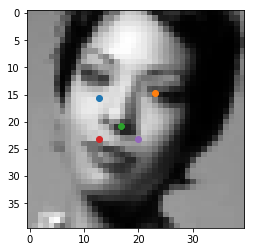

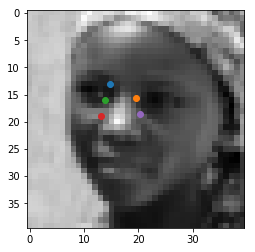

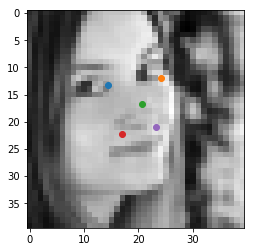


step: 9001 loss: 5.01763 


step: 9002 loss: 8.83969 


step: 9003 loss: 4.86869 


step: 9004 loss: 4.47173 


step: 9005 loss: 9.1983 


step: 9006 loss: 7.26541 


step: 9007 loss: 4.43922 


step: 9008 loss: 10.7822 


step: 9009 loss: 8.74414 


step: 9010 loss: 8.30354 


step: 9011 loss: 8.51832 


step: 9012 loss: 7.8808 


step: 9013 loss: 4.64886 


step: 9014 loss: 8.18648 


step: 9015 loss: 8.96835 


step: 9016 loss: 9.56926 


step: 9017 loss: 4.67416 


step: 9018 loss: 9.07325 


step: 9019 loss: 9.93253 


step: 9020 loss: 4.92322 


step: 9021 loss: 4.70974 


step: 9022 loss: 9.24712 


step: 9023 loss: 8.8635 


step: 9024 loss: 9.11026 


step: 9025 loss: 4.72975 


step: 9026 loss: 8.59617 


step: 9027 loss: 9.84671 


step: 9028 loss: 4.68262 


step: 9029 loss: 4.72715 


step: 9030 loss: 4.81743 


step: 9031 loss: 8.15764 


step: 9032 loss: 4.44606 


step: 9033 loss: 9.67457 


step: 9034 loss: 5.1449 


step: 9035 loss: 4.40426 


step: 9036 loss: 9.0987

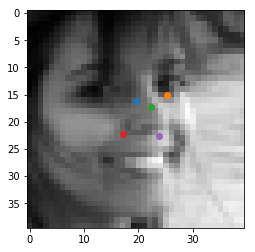

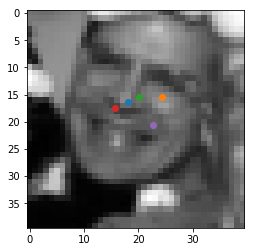

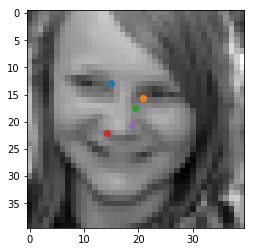

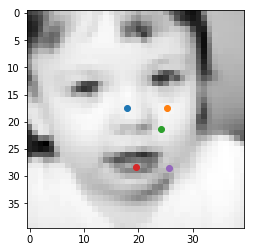


step: 9101 loss: 4.69074 


step: 9102 loss: 8.89143 


step: 9103 loss: 4.5308 


step: 9104 loss: 4.5634 


step: 9105 loss: 4.4359 


step: 9106 loss: 10.0701 


step: 9107 loss: 8.46006 


step: 9108 loss: 8.56876 


step: 9109 loss: 9.09533 


step: 9110 loss: 4.65576 


step: 9111 loss: 4.54082 


step: 9112 loss: 4.59194 


step: 9113 loss: 4.8176 


step: 9114 loss: 4.41808 


step: 9115 loss: 4.44429 


step: 9116 loss: 4.43793 


step: 9117 loss: 9.35478 


step: 9118 loss: 4.55533 


step: 9119 loss: 8.43265 


step: 9120 loss: 8.05211 


step: 9121 loss: 4.37069 


step: 9122 loss: 4.091 


step: 9123 loss: 9.45661 


step: 9124 loss: 4.69178 


step: 9125 loss: 4.42275 


step: 9126 loss: 8.03724 


step: 9127 loss: 8.98857 


step: 9128 loss: 4.36291 


step: 9129 loss: 4.69315 


step: 9130 loss: 4.19033 


step: 9131 loss: 4.26179 


step: 9132 loss: 8.3807 


step: 9133 loss: 4.84491 


step: 9134 loss: 9.81833 


step: 9135 loss: 10.1821 


step: 9136 loss: 4.54911 


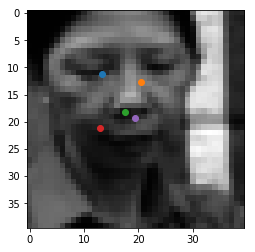

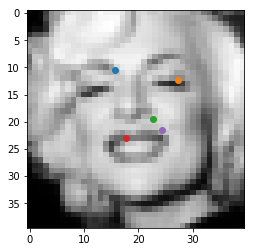

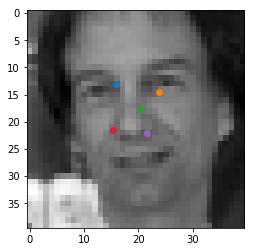


step: 9201 loss: 4.38687 


step: 9202 loss: 7.8529 


step: 9203 loss: 4.28081 


step: 9204 loss: 9.60063 


step: 9205 loss: 9.13251 


step: 9206 loss: 9.571 


step: 9207 loss: 4.10378 


step: 9208 loss: 8.79512 


step: 9209 loss: 4.12315 


step: 9210 loss: 4.4627 


step: 9211 loss: 7.78884 


step: 9212 loss: 3.93043 


step: 9213 loss: 9.20749 


step: 9214 loss: 8.50832 


step: 9215 loss: 4.08567 


step: 9216 loss: 4.10587 


step: 9217 loss: 4.35047 


step: 9218 loss: 9.27255 


step: 9219 loss: 4.29395 


step: 9220 loss: 3.86169 


step: 9221 loss: 10.0098 


step: 9222 loss: 10.2416 


step: 9223 loss: 10.3932 


step: 9224 loss: 9.42729 


step: 9225 loss: 4.69719 


step: 9226 loss: 4.29846 


step: 9227 loss: 4.09376 


step: 9228 loss: 9.41396 


step: 9229 loss: 4.15994 


step: 9230 loss: 9.44486 


step: 9231 loss: 4.43011 


step: 9232 loss: 7.93085 


step: 9233 loss: 4.11033 


step: 9234 loss: 9.12236 


step: 9235 loss: 4.80514 


step: 9236 loss: 8.4855

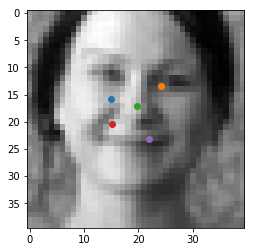

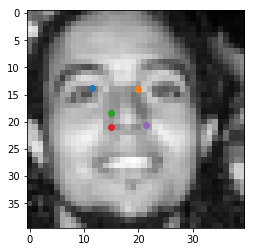

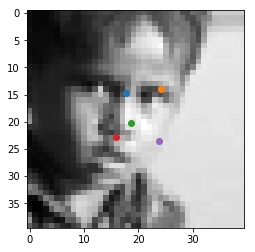

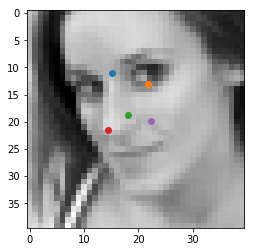

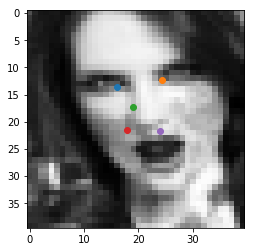


step: 9301 loss: 10.0004 


step: 9302 loss: 8.24426 


step: 9303 loss: 4.31721 


step: 9304 loss: 4.0311 


step: 9305 loss: 8.00928 


step: 9306 loss: 9.65045 


step: 9307 loss: 9.06232 


step: 9308 loss: 8.93513 


step: 9309 loss: 7.94677 


step: 9310 loss: 8.4433 


step: 9311 loss: 9.02611 


step: 9312 loss: 4.25701 


step: 9313 loss: 9.56783 


step: 9314 loss: 9.57635 


step: 9315 loss: 5.14242 


step: 9316 loss: 8.91545 


step: 9317 loss: 8.80048 


step: 9318 loss: 7.59136 


step: 9319 loss: 7.60951 


step: 9320 loss: 4.62031 


step: 9321 loss: 4.90205 


step: 9322 loss: 4.94368 


step: 9323 loss: 8.62426 


step: 9324 loss: 4.21927 


step: 9325 loss: 4.4808 


step: 9326 loss: 4.95035 


step: 9327 loss: 4.43421 


step: 9328 loss: 8.27455 


step: 9329 loss: 4.97571 


step: 9330 loss: 4.33228 


step: 9331 loss: 4.72035 


step: 9332 loss: 4.73954 


step: 9333 loss: 4.6093 


step: 9334 loss: 4.37529 


step: 9335 loss: 4.19449 


step: 9336 loss: 7.5881

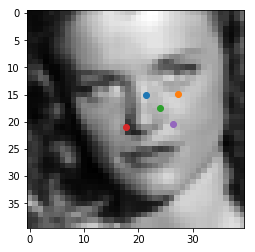

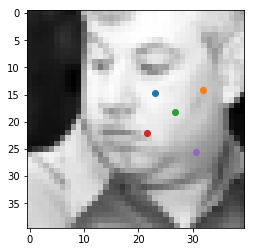

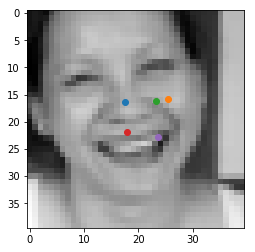


step: 9401 loss: 4.98044 


step: 9402 loss: 8.9906 


step: 9403 loss: 8.3927 


step: 9404 loss: 4.53541 


step: 9405 loss: 4.46543 


step: 9406 loss: 8.86818 


step: 9407 loss: 7.4167 


step: 9408 loss: 8.79359 


step: 9409 loss: 4.83958 


step: 9410 loss: 4.31625 


step: 9411 loss: 4.25812 


step: 9412 loss: 7.7309 


step: 9413 loss: 8.21085 


step: 9414 loss: 8.24545 


step: 9415 loss: 8.6425 


step: 9416 loss: 4.48428 


step: 9417 loss: 8.63056 


step: 9418 loss: 9.24923 


step: 9419 loss: 4.78214 


step: 9420 loss: 7.84437 


step: 9421 loss: 9.01465 


step: 9422 loss: 4.43271 


step: 9423 loss: 4.97737 


step: 9424 loss: 9.08283 


step: 9425 loss: 8.13928 


step: 9426 loss: 4.78038 


step: 9427 loss: 8.25766 


step: 9428 loss: 7.50486 


step: 9429 loss: 4.28635 


step: 9430 loss: 4.26862 


step: 9431 loss: 8.22247 


step: 9432 loss: 8.57641 


step: 9433 loss: 9.13518 


step: 9434 loss: 7.65307 


step: 9435 loss: 8.7196 


step: 9436 loss: 9.65344 

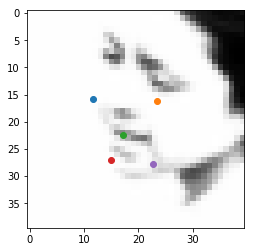

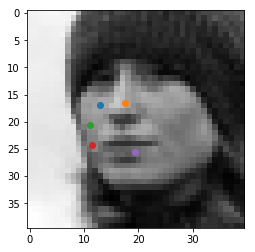

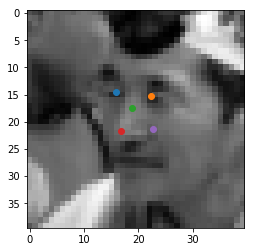

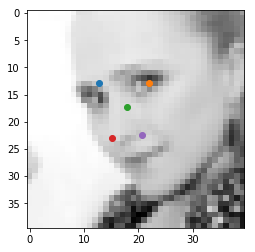


step: 9501 loss: 8.88885 


step: 9502 loss: 8.92789 


step: 9503 loss: 4.58521 


step: 9504 loss: 8.56459 


step: 9505 loss: 7.8403 


step: 9506 loss: 4.49835 


step: 9507 loss: 9.59742 


step: 9508 loss: 4.26189 


step: 9509 loss: 8.31418 


step: 9510 loss: 7.14813 


step: 9511 loss: 9.2501 


step: 9512 loss: 4.91352 


step: 9513 loss: 4.11937 


step: 9514 loss: 4.48089 


step: 9515 loss: 4.71336 


step: 9516 loss: 4.3665 


step: 9517 loss: 4.51542 


step: 9518 loss: 4.59575 


step: 9519 loss: 8.56852 


step: 9520 loss: 4.59866 


step: 9521 loss: 4.42049 


step: 9522 loss: 8.31266 


step: 9523 loss: 4.22341 


step: 9524 loss: 4.49068 


step: 9525 loss: 4.15597 


step: 9526 loss: 4.39088 


step: 9527 loss: 4.27796 


step: 9528 loss: 10.1349 


step: 9529 loss: 4.17731 


step: 9530 loss: 3.99354 


step: 9531 loss: 4.02907 


step: 9532 loss: 8.13493 


step: 9533 loss: 3.96049 


step: 9534 loss: 4.13153 


step: 9535 loss: 8.53183 


step: 9536 loss: 4.008

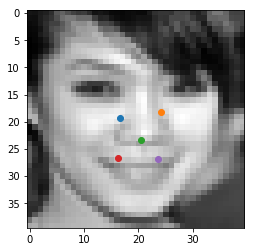

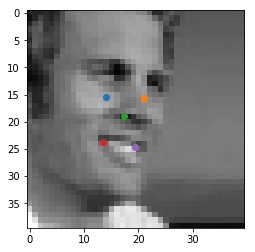


step: 9601 loss: 7.59216 


step: 9602 loss: 3.95988 


step: 9603 loss: 10.0452 


step: 9604 loss: 6.6294 


step: 9605 loss: 4.8958 


step: 9606 loss: 4.31544 


step: 9607 loss: 4.44089 


step: 9608 loss: 7.66692 


step: 9609 loss: 3.72918 


step: 9610 loss: 7.63292 


step: 9611 loss: 8.88156 


step: 9612 loss: 4.29956 


step: 9613 loss: 4.29714 


step: 9614 loss: 8.46704 


step: 9615 loss: 8.51307 


step: 9616 loss: 9.26733 


step: 9617 loss: 9.18193 


step: 9618 loss: 7.3263 


step: 9619 loss: 8.92128 


step: 9620 loss: 7.53703 


step: 9621 loss: 8.62429 


step: 9622 loss: 4.1365 


step: 9623 loss: 4.24551 


step: 9624 loss: 9.58791 


step: 9625 loss: 8.44959 


step: 9626 loss: 4.54798 


step: 9627 loss: 4.31979 


step: 9628 loss: 9.11122 


step: 9629 loss: 4.21596 


step: 9630 loss: 4.67605 


step: 9631 loss: 3.80147 


step: 9632 loss: 8.23701 


step: 9633 loss: 4.31516 


step: 9634 loss: 4.25962 


step: 9635 loss: 7.49734 


step: 9636 loss: 9.5254

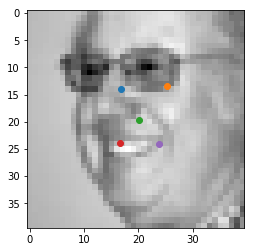

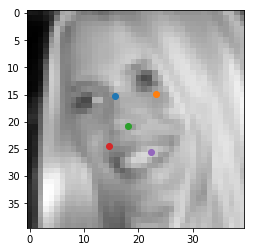

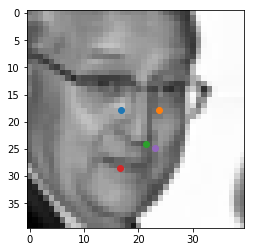

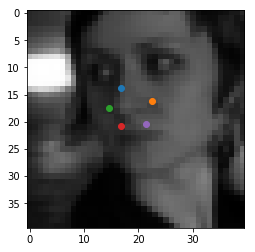

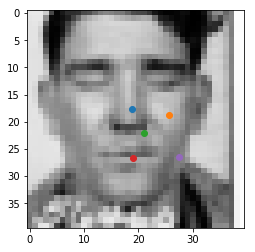


step: 9701 loss: 4.66377 


step: 9702 loss: 9.40053 


step: 9703 loss: 4.01976 


step: 9704 loss: 4.19308 


step: 9705 loss: 4.13459 


step: 9706 loss: 3.88249 


step: 9707 loss: 7.66482 


step: 9708 loss: 4.29047 


step: 9709 loss: 4.52938 


step: 9710 loss: 4.28076 


step: 9711 loss: 4.04097 


step: 9712 loss: 4.44795 


step: 9713 loss: 3.99984 


step: 9714 loss: 8.48578 


step: 9715 loss: 7.30754 


step: 9716 loss: 8.88037 


step: 9717 loss: 4.12764 


step: 9718 loss: 4.10367 


step: 9719 loss: 3.52 


step: 9720 loss: 4.06976 


step: 9721 loss: 4.29123 


step: 9722 loss: 4.48991 


step: 9723 loss: 8.80909 


step: 9724 loss: 3.94193 


step: 9725 loss: 7.72247 


step: 9726 loss: 3.97675 


step: 9727 loss: 8.73629 


step: 9728 loss: 7.70716 


step: 9729 loss: 8.87792 


step: 9730 loss: 4.2938 


step: 9731 loss: 4.262 


step: 9732 loss: 4.28836 


step: 9733 loss: 3.72492 


step: 9734 loss: 9.13786 


step: 9735 loss: 7.70302 


step: 9736 loss: 7.46147 

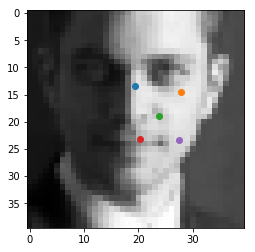

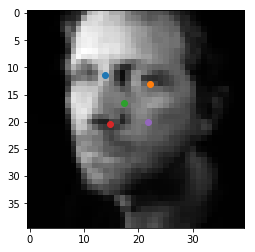

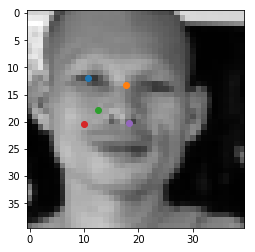

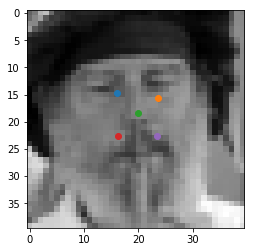

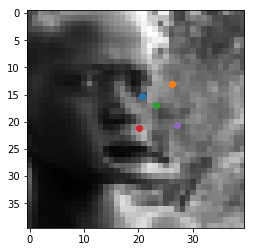


step: 9801 loss: 3.66097 


step: 9802 loss: 7.83788 


step: 9803 loss: 3.9519 


step: 9804 loss: 8.9067 


step: 9805 loss: 4.41676 


step: 9806 loss: 4.28845 


step: 9807 loss: 8.0514 


step: 9808 loss: 4.52415 


step: 9809 loss: 8.06536 


step: 9810 loss: 4.07521 


step: 9811 loss: 4.54439 


step: 9812 loss: 4.48033 


step: 9813 loss: 8.14164 


step: 9814 loss: 4.01089 


step: 9815 loss: 8.85204 


step: 9816 loss: 3.9268 


step: 9817 loss: 8.22002 


step: 9818 loss: 3.86943 


step: 9819 loss: 10.2613 


step: 9820 loss: 3.86279 


step: 9821 loss: 9.53341 


step: 9822 loss: 4.40431 


step: 9823 loss: 4.33437 


step: 9824 loss: 4.08727 


step: 9825 loss: 9.95946 


step: 9826 loss: 9.19027 


step: 9827 loss: 8.7556 


step: 9828 loss: 3.57522 


step: 9829 loss: 4.35307 


step: 9830 loss: 3.73102 


step: 9831 loss: 4.04935 


step: 9832 loss: 4.20839 


step: 9833 loss: 4.07416 


step: 9834 loss: 8.51912 


step: 9835 loss: 7.69729 


step: 9836 loss: 8.05587

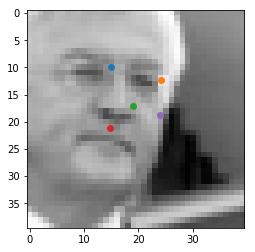

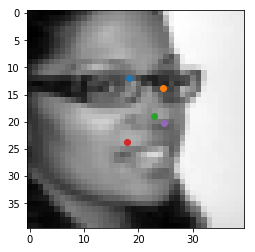

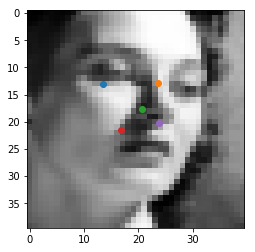


step: 9901 loss: 4.51137 


step: 9902 loss: 7.60989 


step: 9903 loss: 4.08569 


step: 9904 loss: 9.12074 


step: 9905 loss: 3.67194 


step: 9906 loss: 4.21744 


step: 9907 loss: 3.66906 


step: 9908 loss: 6.98609 


step: 9909 loss: 3.88379 


step: 9910 loss: 7.98879 


step: 9911 loss: 9.36169 


step: 9912 loss: 7.97223 


step: 9913 loss: 7.28459 


step: 9914 loss: 4.60744 


step: 9915 loss: 8.12004 


step: 9916 loss: 4.39529 


step: 9917 loss: 4.10677 


step: 9918 loss: 9.94642 


step: 9919 loss: 7.36488 


step: 9920 loss: 3.8919 


step: 9921 loss: 3.85034 


step: 9922 loss: 7.61841 


step: 9923 loss: 8.93932 


step: 9924 loss: 4.58461 


step: 9925 loss: 8.64011 


step: 9926 loss: 4.22852 


step: 9927 loss: 4.43713 


step: 9928 loss: 3.85305 


step: 9929 loss: 9.04255 


step: 9930 loss: 8.03152 


step: 9931 loss: 4.32697 


step: 9932 loss: 4.30675 


step: 9933 loss: 10.4034 


step: 9934 loss: 7.21259 


step: 9935 loss: 8.55652 


step: 9936 loss: 4.4

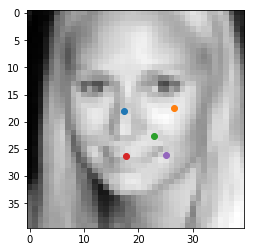

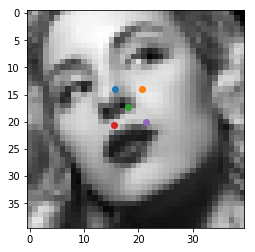

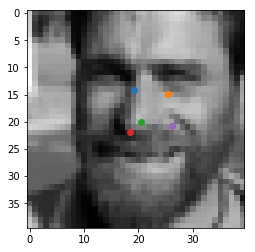


step: 10001 loss: 8.10854 


step: 10002 loss: 7.97295 


step: 10003 loss: 7.46691 


step: 10004 loss: 8.08456 


step: 10005 loss: 8.06773 


step: 10006 loss: 4.43454 


step: 10007 loss: 4.34715 


step: 10008 loss: 8.23233 


step: 10009 loss: 8.10146 


step: 10010 loss: 4.23024 


step: 10011 loss: 8.50234 


step: 10012 loss: 8.03616 


step: 10013 loss: 7.89875 


step: 10014 loss: 4.44421 


step: 10015 loss: 8.01423 


step: 10016 loss: 7.89594 


step: 10017 loss: 4.11831 


step: 10018 loss: 8.11546 


step: 10019 loss: 7.56217 


step: 10020 loss: 8.57039 


step: 10021 loss: 4.34981 


step: 10022 loss: 8.35289 


step: 10023 loss: 5.19643 


step: 10024 loss: 4.85492 


step: 10025 loss: 4.16457 


step: 10026 loss: 4.63423 


step: 10027 loss: 4.35327 


step: 10028 loss: 4.7424 


step: 10029 loss: 7.25573 


step: 10030 loss: 4.13467 


step: 10031 loss: 4.45058 


step: 10032 loss: 4.55274 


step: 10033 loss: 8.52048 


step: 10034 loss: 8.61661 


step: 10035 lo

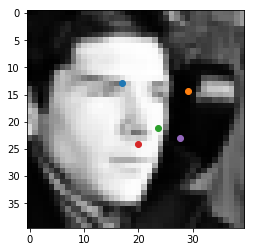

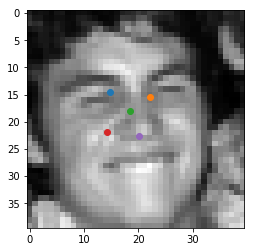

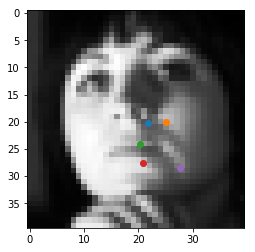


step: 10101 loss: 4.45634 


step: 10102 loss: 7.32717 


step: 10103 loss: 7.72456 


step: 10104 loss: 7.86883 


step: 10105 loss: 7.25777 


step: 10106 loss: 6.31357 


step: 10107 loss: 8.57998 


step: 10108 loss: 4.09973 


step: 10109 loss: 8.77663 


step: 10110 loss: 3.72315 


step: 10111 loss: 3.86613 


step: 10112 loss: 7.75414 


step: 10113 loss: 3.86782 


step: 10114 loss: 4.5698 


step: 10115 loss: 7.66098 


step: 10116 loss: 3.93973 


step: 10117 loss: 4.0712 


step: 10118 loss: 9.0664 


step: 10119 loss: 7.40285 


step: 10120 loss: 7.84638 


step: 10121 loss: 8.78087 


step: 10122 loss: 10.0398 


step: 10123 loss: 7.73406 


step: 10124 loss: 8.50749 


step: 10125 loss: 4.20368 


step: 10126 loss: 4.26947 


step: 10127 loss: 4.24336 


step: 10128 loss: 4.51693 


step: 10129 loss: 4.06955 


step: 10130 loss: 3.93134 


step: 10131 loss: 7.83438 


step: 10132 loss: 4.37182 


step: 10133 loss: 3.81073 


step: 10134 loss: 3.97326 


step: 10135 loss

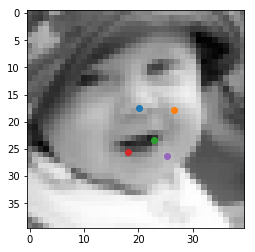

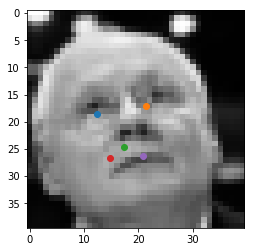


step: 10201 loss: 4.17158 


step: 10202 loss: 7.53982 


step: 10203 loss: 6.62947 


step: 10204 loss: 8.36846 


step: 10205 loss: 3.8722 


step: 10206 loss: 7.97217 


step: 10207 loss: 8.0256 


step: 10208 loss: 4.32836 


step: 10209 loss: 9.32139 


step: 10210 loss: 4.32504 


step: 10211 loss: 4.00194 


step: 10212 loss: 3.99722 


step: 10213 loss: 4.47951 


step: 10214 loss: 4.1732 


step: 10215 loss: 3.76501 


step: 10216 loss: 4.17529 


step: 10217 loss: 3.60507 


step: 10218 loss: 4.14635 


step: 10219 loss: 4.0619 


step: 10220 loss: 8.01455 


step: 10221 loss: 4.17515 


step: 10222 loss: 3.96 


step: 10223 loss: 3.9173 


step: 10224 loss: 6.98149 


step: 10225 loss: 4.12884 


step: 10226 loss: 9.417 


step: 10227 loss: 7.44898 


step: 10228 loss: 8.11315 


step: 10229 loss: 7.79476 


step: 10230 loss: 8.64706 


step: 10231 loss: 4.16719 


step: 10232 loss: 8.44695 


step: 10233 loss: 4.41789 


step: 10234 loss: 3.86052 


step: 10235 loss: 3.837

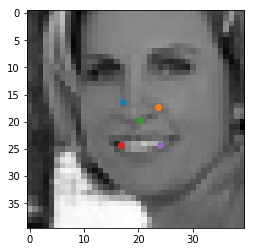

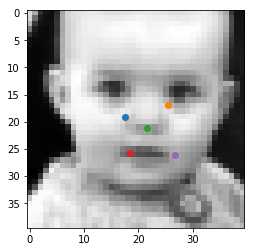

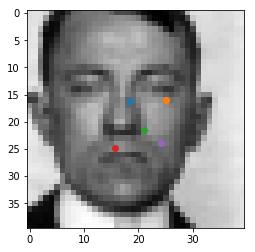

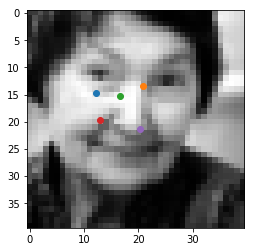


step: 10301 loss: 3.91301 


step: 10302 loss: 9.75047 


step: 10303 loss: 7.67548 


step: 10304 loss: 4.62683 


step: 10305 loss: 6.98287 


step: 10306 loss: 8.30603 


step: 10307 loss: 8.11419 


step: 10308 loss: 8.70102 


step: 10309 loss: 7.79896 


step: 10310 loss: 8.17615 


step: 10311 loss: 7.0964 


step: 10312 loss: 8.74877 


step: 10313 loss: 7.55285 


step: 10314 loss: 7.84416 


step: 10315 loss: 4.16954 


step: 10316 loss: 3.93437 


step: 10317 loss: 4.70028 


step: 10318 loss: 3.79154 


step: 10319 loss: 8.22695 


step: 10320 loss: 9.03104 


step: 10321 loss: 3.99148 


step: 10322 loss: 8.26963 


step: 10323 loss: 4.1108 


step: 10324 loss: 8.47503 


step: 10325 loss: 3.59005 


step: 10326 loss: 4.2654 


step: 10327 loss: 7.30309 


step: 10328 loss: 3.97172 


step: 10329 loss: 4.10229 


step: 10330 loss: 4.36626 


step: 10331 loss: 8.34208 


step: 10332 loss: 7.16877 


step: 10333 loss: 4.46068 


step: 10334 loss: 4.43106 


step: 10335 loss

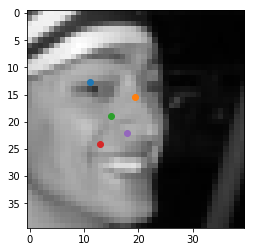

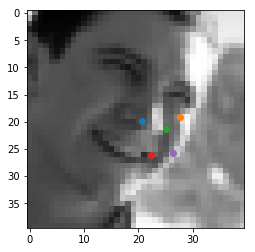

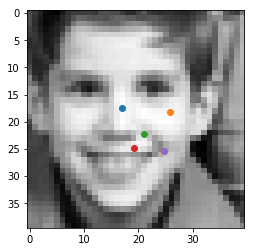

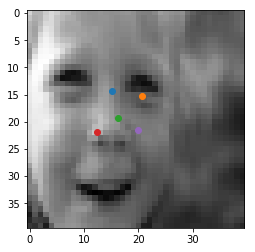


step: 10401 loss: 7.11425 


step: 10402 loss: 7.86854 


step: 10403 loss: 8.28905 


step: 10404 loss: 7.00623 


step: 10405 loss: 4.01201 


step: 10406 loss: 3.95971 


step: 10407 loss: 7.70745 


step: 10408 loss: 8.00597 


step: 10409 loss: 4.11798 


step: 10410 loss: 7.74812 


step: 10411 loss: 6.95743 


step: 10412 loss: 7.83055 


step: 10413 loss: 7.47238 


step: 10414 loss: 4.12243 


step: 10415 loss: 4.09154 


step: 10416 loss: 7.40785 


step: 10417 loss: 4.41592 


step: 10418 loss: 4.27893 


step: 10419 loss: 7.9603 


step: 10420 loss: 4.08762 


step: 10421 loss: 3.87544 


step: 10422 loss: 8.06962 


step: 10423 loss: 4.30738 


step: 10424 loss: 9.05003 


step: 10425 loss: 3.90781 


step: 10426 loss: 8.26844 


step: 10427 loss: 8.86093 


step: 10428 loss: 6.71948 


step: 10429 loss: 6.74073 


step: 10430 loss: 9.36953 


step: 10431 loss: 4.27927 


step: 10432 loss: 4.10506 


step: 10433 loss: 3.91206 


step: 10434 loss: 4.28607 


step: 10435 lo

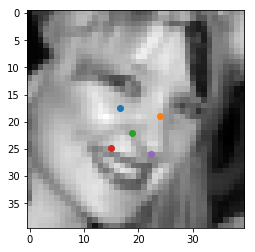

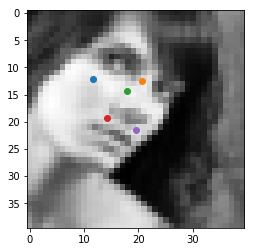


step: 10501 loss: 3.89477 


step: 10502 loss: 3.81463 


step: 10503 loss: 3.86217 


step: 10504 loss: 4.03509 


step: 10505 loss: 7.92257 


step: 10506 loss: 4.20238 


step: 10507 loss: 8.32163 


step: 10508 loss: 4.00969 


step: 10509 loss: 7.86969 


step: 10510 loss: 3.96339 


step: 10511 loss: 8.71995 


step: 10512 loss: 8.40991 


step: 10513 loss: 7.36984 


step: 10514 loss: 3.81333 


step: 10515 loss: 3.91263 


step: 10516 loss: 4.02544 


step: 10517 loss: 8.68367 


step: 10518 loss: 8.2821 


step: 10519 loss: 7.18557 


step: 10520 loss: 4.35112 


step: 10521 loss: 7.46991 


step: 10522 loss: 3.88221 


step: 10523 loss: 8.36628 


step: 10524 loss: 7.36718 


step: 10525 loss: 4.18191 


step: 10526 loss: 3.88125 


step: 10527 loss: 3.98713 


step: 10528 loss: 8.21497 


step: 10529 loss: 8.19622 


step: 10530 loss: 4.14063 


step: 10531 loss: 4.16118 


step: 10532 loss: 7.81659 


step: 10533 loss: 8.0742 


step: 10534 loss: 8.27284 


step: 10535 los

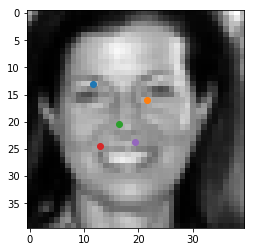

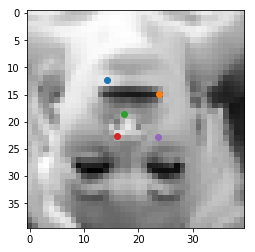


step: 10601 loss: 7.62002 


step: 10602 loss: 4.57271 


step: 10603 loss: 7.80273 


step: 10604 loss: 6.56054 


step: 10605 loss: 7.73524 


step: 10606 loss: 3.96686 


step: 10607 loss: 4.37053 


step: 10608 loss: 7.15961 


step: 10609 loss: 4.00522 


step: 10610 loss: 3.75122 


step: 10611 loss: 7.70109 


step: 10612 loss: 3.96514 


step: 10613 loss: 7.82662 


step: 10614 loss: 8.47427 


step: 10615 loss: 4.09571 


step: 10616 loss: 3.97386 


step: 10617 loss: 3.98758 


step: 10618 loss: 3.6836 


step: 10619 loss: 4.24813 


step: 10620 loss: 4.05735 


step: 10621 loss: 6.58724 


step: 10622 loss: 3.8493 


step: 10623 loss: 7.50416 


step: 10624 loss: 8.00574 


step: 10625 loss: 8.05892 


step: 10626 loss: 3.89742 


step: 10627 loss: 7.39009 


step: 10628 loss: 7.39694 


step: 10629 loss: 3.8622 


step: 10630 loss: 3.90854 


step: 10631 loss: 8.69337 


step: 10632 loss: 4.00428 


step: 10633 loss: 7.14334 


step: 10634 loss: 3.89617 


step: 10635 loss

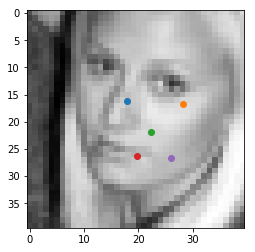

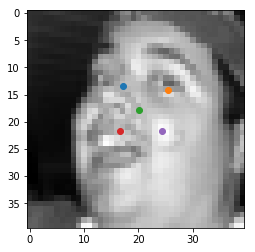


step: 10701 loss: 3.865 


step: 10702 loss: 3.77265 


step: 10703 loss: 3.77174 


step: 10704 loss: 6.95066 


step: 10705 loss: 6.17421 


step: 10706 loss: 3.55597 


step: 10707 loss: 7.40802 


step: 10708 loss: 8.26308 


step: 10709 loss: 3.78558 


step: 10710 loss: 3.64057 


step: 10711 loss: 8.09963 


step: 10712 loss: 9.43017 


step: 10713 loss: 7.69415 


step: 10714 loss: 6.91917 


step: 10715 loss: 7.32496 


step: 10716 loss: 8.60235 


step: 10717 loss: 3.81571 


step: 10718 loss: 6.33233 


step: 10719 loss: 3.76081 


step: 10720 loss: 7.62782 


step: 10721 loss: 6.68451 


step: 10722 loss: 3.91239 


step: 10723 loss: 3.7472 


step: 10724 loss: 7.64717 


step: 10725 loss: 8.58127 


step: 10726 loss: 8.10075 


step: 10727 loss: 9.03639 


step: 10728 loss: 3.84023 


step: 10729 loss: 3.97239 


step: 10730 loss: 3.96209 


step: 10731 loss: 3.8743 


step: 10732 loss: 8.15341 


step: 10733 loss: 8.07444 


step: 10734 loss: 3.81999 


step: 10735 loss:

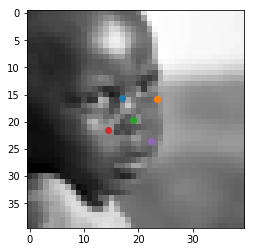

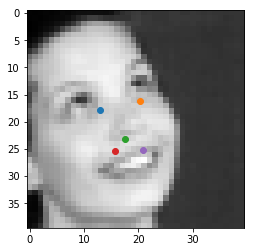

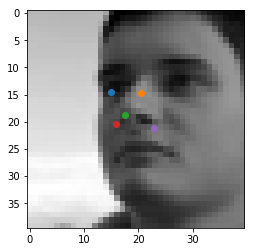


step: 10801 loss: 3.75843 


step: 10802 loss: 8.29263 


step: 10803 loss: 3.67693 


step: 10804 loss: 7.49445 


step: 10805 loss: 4.11318 


step: 10806 loss: 3.38818 


step: 10807 loss: 3.98718 


step: 10808 loss: 3.9732 


step: 10809 loss: 3.57288 


step: 10810 loss: 3.96671 


step: 10811 loss: 6.73937 


step: 10812 loss: 3.39848 


step: 10813 loss: 3.49393 


step: 10814 loss: 3.91589 


step: 10815 loss: 9.3202 


step: 10816 loss: 3.66616 


step: 10817 loss: 8.22735 


step: 10818 loss: 3.92844 


step: 10819 loss: 3.83849 


step: 10820 loss: 3.48765 


step: 10821 loss: 4.01177 


step: 10822 loss: 3.82178 


step: 10823 loss: 7.38384 


step: 10824 loss: 3.18788 


step: 10825 loss: 3.64614 


step: 10826 loss: 3.67267 


step: 10827 loss: 8.81738 


step: 10828 loss: 7.22452 


step: 10829 loss: 4.11799 


step: 10830 loss: 3.66158 


step: 10831 loss: 3.54844 


step: 10832 loss: 3.41151 


step: 10833 loss: 6.68288 


step: 10834 loss: 3.46429 


step: 10835 los

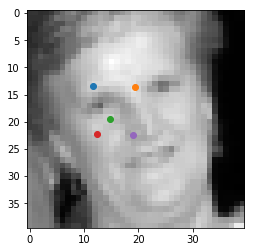

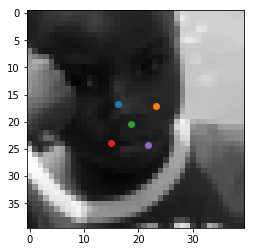

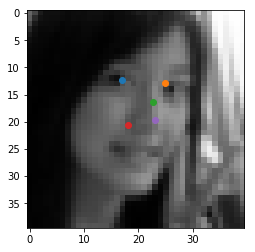

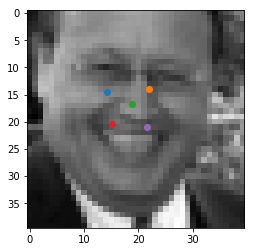

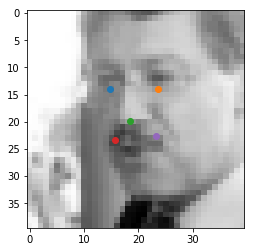


step: 10901 loss: 3.69691 


step: 10902 loss: 3.9841 


step: 10903 loss: 7.06207 


step: 10904 loss: 3.72494 


step: 10905 loss: 8.3945 


step: 10906 loss: 8.51419 


step: 10907 loss: 4.06345 


step: 10908 loss: 8.45091 


step: 10909 loss: 3.46702 


step: 10910 loss: 3.8252 


step: 10911 loss: 7.09832 


step: 10912 loss: 3.92211 


step: 10913 loss: 3.53305 


step: 10914 loss: 3.6279 


step: 10915 loss: 3.99371 


step: 10916 loss: 3.95371 


step: 10917 loss: 8.05181 


step: 10918 loss: 3.68719 


step: 10919 loss: 3.89852 


step: 10920 loss: 4.01002 


step: 10921 loss: 3.66235 


step: 10922 loss: 3.42909 


step: 10923 loss: 3.40083 


step: 10924 loss: 7.56957 


step: 10925 loss: 3.80589 


step: 10926 loss: 3.58345 


step: 10927 loss: 3.70492 


step: 10928 loss: 3.61871 


step: 10929 loss: 3.85167 


step: 10930 loss: 3.62917 


step: 10931 loss: 8.73664 


step: 10932 loss: 3.17556 


step: 10933 loss: 8.44902 


step: 10934 loss: 7.88492 


step: 10935 loss:

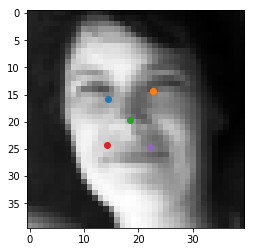

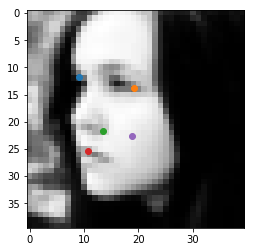

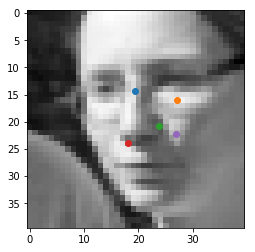

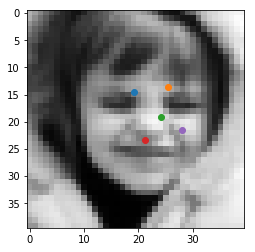

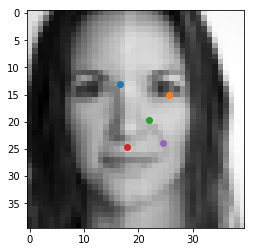


step: 11001 loss: 7.09826 


step: 11002 loss: 7.19602 


step: 11003 loss: 7.54243 


step: 11004 loss: 3.98044 


step: 11005 loss: 3.78735 


step: 11006 loss: 3.60135 


step: 11007 loss: 8.17268 


step: 11008 loss: 3.73313 


step: 11009 loss: 3.60222 


step: 11010 loss: 3.68319 


step: 11011 loss: 4.008 


step: 11012 loss: 7.40234 


step: 11013 loss: 3.43742 


step: 11014 loss: 3.61393 


step: 11015 loss: 7.91782 


step: 11016 loss: 3.70646 


step: 11017 loss: 8.14232 


step: 11018 loss: 7.32169 


step: 11019 loss: 8.58425 


step: 11020 loss: 8.19329 


step: 11021 loss: 7.76026 


step: 11022 loss: 8.29644 


step: 11023 loss: 3.76618 


step: 11024 loss: 6.80096 


step: 11025 loss: 4.06752 


step: 11026 loss: 8.24684 


step: 11027 loss: 7.87384 


step: 11028 loss: 4.19922 


step: 11029 loss: 3.94878 


step: 11030 loss: 4.05623 


step: 11031 loss: 7.44104 


step: 11032 loss: 7.99542 


step: 11033 loss: 7.74426 


step: 11034 loss: 3.92257 


step: 11035 los

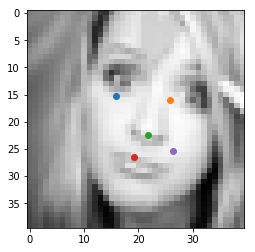

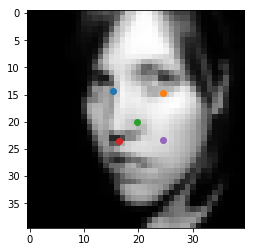

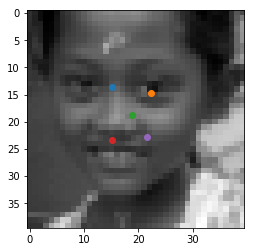


step: 11101 loss: 4.44354 


step: 11102 loss: 7.71494 


step: 11103 loss: 7.77595 


step: 11104 loss: 4.03684 


step: 11105 loss: 4.07707 


step: 11106 loss: 3.89557 


step: 11107 loss: 8.2361 


step: 11108 loss: 8.32697 


step: 11109 loss: 4.30298 


step: 11110 loss: 6.54423 


step: 11111 loss: 7.62777 


step: 11112 loss: 3.56255 


step: 11113 loss: 4.20617 


step: 11114 loss: 7.72827 


step: 11115 loss: 7.24635 


step: 11116 loss: 7.16779 


step: 11117 loss: 4.12832 


step: 11118 loss: 3.92193 


step: 11119 loss: 4.02933 


step: 11120 loss: 4.02482 


step: 11121 loss: 3.86534 


step: 11122 loss: 3.88274 


step: 11123 loss: 8.49038 


step: 11124 loss: 8.18895 


step: 11125 loss: 7.04951 


step: 11126 loss: 3.86444 


step: 11127 loss: 3.88409 


step: 11128 loss: 8.08606 


step: 11129 loss: 3.59042 


step: 11130 loss: 8.35922 


step: 11131 loss: 8.49765 


step: 11132 loss: 8.14528 


step: 11133 loss: 3.90261 


step: 11134 loss: 8.82468 


step: 11135 lo

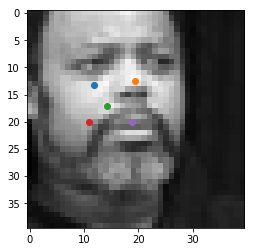

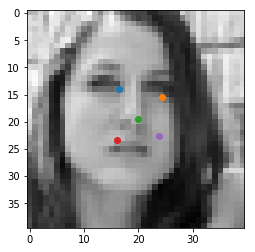

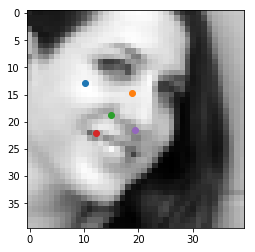


step: 11201 loss: 3.60224 


step: 11202 loss: 3.95225 


step: 11203 loss: 7.93914 


step: 11204 loss: 8.03176 


step: 11205 loss: 3.70048 


step: 11206 loss: 6.74107 


step: 11207 loss: 3.60159 


step: 11208 loss: 8.2096 


step: 11209 loss: 6.60538 


step: 11210 loss: 8.50623 


step: 11211 loss: 8.11003 


step: 11212 loss: 8.61081 


step: 11213 loss: 4.3065 


step: 11214 loss: 8.22959 


step: 11215 loss: 7.08341 


step: 11216 loss: 4.00511 


step: 11217 loss: 7.23299 


step: 11218 loss: 3.72152 


step: 11219 loss: 7.58146 


step: 11220 loss: 3.94842 


step: 11221 loss: 8.27379 


step: 11222 loss: 4.27553 


step: 11223 loss: 4.41672 


step: 11224 loss: 7.89529 


step: 11225 loss: 3.66352 


step: 11226 loss: 7.60687 


step: 11227 loss: 4.21576 


step: 11228 loss: 6.33904 


step: 11229 loss: 7.43797 


step: 11230 loss: 4.20525 


step: 11231 loss: 8.48871 


step: 11232 loss: 7.8573 


step: 11233 loss: 7.58182 


step: 11234 loss: 8.60052 


step: 11235 loss

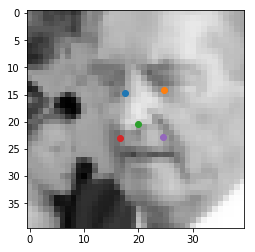

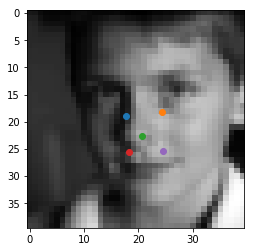


step: 11301 loss: 3.75994 


step: 11302 loss: 3.49314 


step: 11303 loss: 7.27492 


step: 11304 loss: 3.45407 


step: 11305 loss: 6.62168 


step: 11306 loss: 3.68144 


step: 11307 loss: 8.20051 


step: 11308 loss: 4.13738 


step: 11309 loss: 7.78916 


step: 11310 loss: 7.71978 


step: 11311 loss: 3.6349 


step: 11312 loss: 4.05108 


step: 11313 loss: 3.43983 


step: 11314 loss: 8.12033 


step: 11315 loss: 3.63318 


step: 11316 loss: 7.33669 


step: 11317 loss: 3.82922 


step: 11318 loss: 6.69816 


step: 11319 loss: 4.05407 


step: 11320 loss: 7.2912 


step: 11321 loss: 7.05078 


step: 11322 loss: 6.3242 


step: 11323 loss: 3.68637 


step: 11324 loss: 7.82864 


step: 11325 loss: 3.73523 


step: 11326 loss: 3.95398 


step: 11327 loss: 3.71718 


step: 11328 loss: 6.58405 


step: 11329 loss: 8.91874 


step: 11330 loss: 3.67778 


step: 11331 loss: 7.17311 


step: 11332 loss: 7.63489 


step: 11333 loss: 8.02611 


step: 11334 loss: 3.71641 


step: 11335 loss

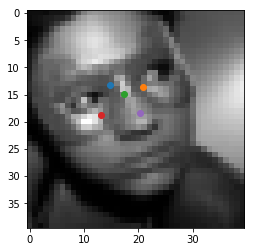

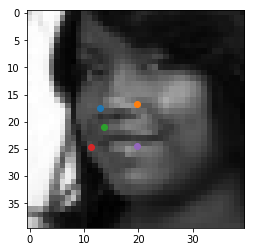

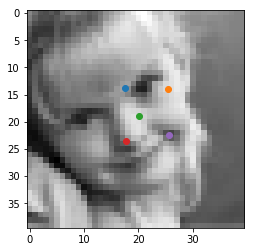

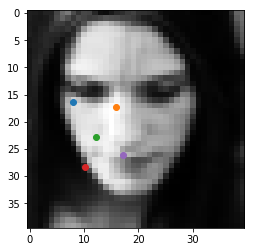

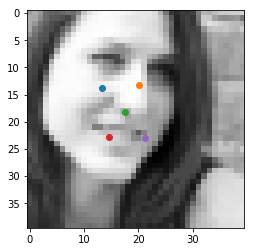


step: 11401 loss: 7.43615 


step: 11402 loss: 3.97156 


step: 11403 loss: 6.85799 


step: 11404 loss: 3.51102 


step: 11405 loss: 7.57279 


step: 11406 loss: 6.45645 


step: 11407 loss: 7.66557 


step: 11408 loss: 3.99201 


step: 11409 loss: 6.64634 


step: 11410 loss: 8.14391 


step: 11411 loss: 7.19256 


step: 11412 loss: 3.85929 


step: 11413 loss: 6.6077 


step: 11414 loss: 8.67521 


step: 11415 loss: 3.34426 


step: 11416 loss: 3.71523 


step: 11417 loss: 4.0167 


step: 11418 loss: 7.95517 


step: 11419 loss: 7.43279 


step: 11420 loss: 4.10286 


step: 11421 loss: 6.43721 


step: 11422 loss: 6.7111 


step: 11423 loss: 3.70991 


step: 11424 loss: 7.74033 


step: 11425 loss: 6.90683 


step: 11426 loss: 6.87865 


step: 11427 loss: 6.93341 


step: 11428 loss: 3.91767 


step: 11429 loss: 4.29078 


step: 11430 loss: 7.41606 


step: 11431 loss: 3.94355 


step: 11432 loss: 8.17886 


step: 11433 loss: 4.13515 


step: 11434 loss: 3.74934 


step: 11435 loss

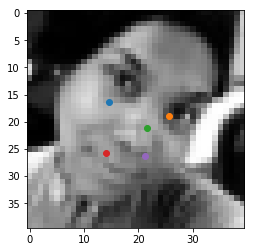

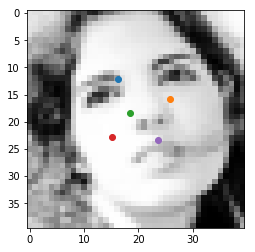

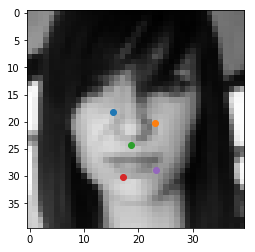

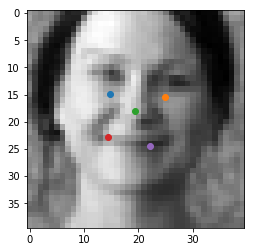

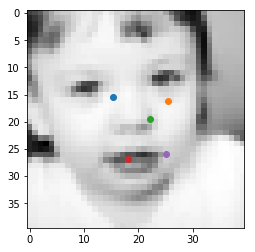


step: 11501 loss: 7.84893 


step: 11502 loss: 7.78829 


step: 11503 loss: 3.96672 


step: 11504 loss: 7.28828 


step: 11505 loss: 3.78376 


step: 11506 loss: 3.91282 


step: 11507 loss: 6.97902 


step: 11508 loss: 7.3837 


step: 11509 loss: 3.81884 


step: 11510 loss: 3.96702 


step: 11511 loss: 3.75255 


step: 11512 loss: 4.0763 


step: 11513 loss: 7.08372 


step: 11514 loss: 7.49385 


step: 11515 loss: 7.51213 


step: 11516 loss: 8.29634 


step: 11517 loss: 3.98968 


step: 11518 loss: 3.59633 


step: 11519 loss: 8.81431 


step: 11520 loss: 3.60347 


step: 11521 loss: 7.94721 


step: 11522 loss: 3.56458 


step: 11523 loss: 8.18237 


step: 11524 loss: 7.27917 


step: 11525 loss: 7.64932 


step: 11526 loss: 4.25933 


step: 11527 loss: 7.58986 


step: 11528 loss: 8.2593 


step: 11529 loss: 7.39993 


step: 11530 loss: 3.71051 


step: 11531 loss: 3.96114 


step: 11532 loss: 4.06749 


step: 11533 loss: 3.83229 


step: 11534 loss: 3.80205 


step: 11535 loss

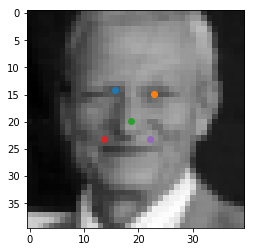

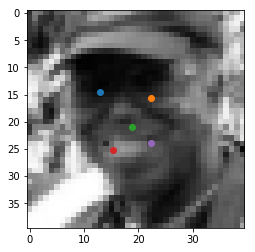

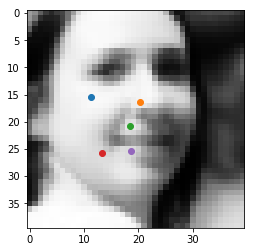

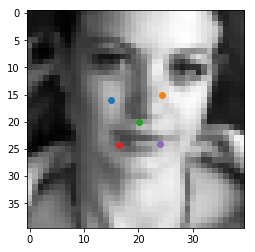


step: 11601 loss: 3.55362 


step: 11602 loss: 3.60794 


step: 11603 loss: 3.51984 


step: 11604 loss: 3.73334 


step: 11605 loss: 9.14338 


step: 11606 loss: 6.38496 


step: 11607 loss: 3.39939 


step: 11608 loss: 3.69615 


step: 11609 loss: 7.22012 


step: 11610 loss: 8.11099 


step: 11611 loss: 9.02324 


step: 11612 loss: 7.45548 


step: 11613 loss: 7.14245 


step: 11614 loss: 3.7688 


step: 11615 loss: 7.96792 


step: 11616 loss: 7.58021 


step: 11617 loss: 7.88185 


step: 11618 loss: 6.61209 


step: 11619 loss: 6.5927 


step: 11620 loss: 6.34584 


step: 11621 loss: 6.8545 


step: 11622 loss: 6.84486 


step: 11623 loss: 4.34859 


step: 11624 loss: 4.19656 


step: 11625 loss: 7.87008 


step: 11626 loss: 3.90942 


step: 11627 loss: 3.69378 


step: 11628 loss: 8.67862 


step: 11629 loss: 7.22318 


step: 11630 loss: 4.03445 


step: 11631 loss: 6.13858 


step: 11632 loss: 8.14717 


step: 11633 loss: 3.93594 


step: 11634 loss: 4.07694 


step: 11635 loss

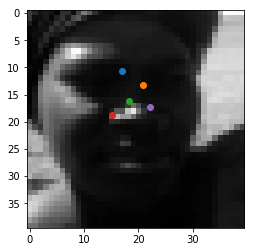


step: 11701 loss: 6.95197 


step: 11702 loss: 6.62847 


step: 11703 loss: 3.72881 


step: 11704 loss: 6.59679 


step: 11705 loss: 7.42102 


step: 11706 loss: 3.92662 


step: 11707 loss: 3.91471 


step: 11708 loss: 4.45781 


step: 11709 loss: 3.51037 


step: 11710 loss: 4.0325 


step: 11711 loss: 3.92826 


step: 11712 loss: 7.51189 


step: 11713 loss: 7.29369 


step: 11714 loss: 4.14944 


step: 11715 loss: 7.70193 


step: 11716 loss: 3.86779 


step: 11717 loss: 6.16335 


step: 11718 loss: 3.76817 


step: 11719 loss: 7.57099 


step: 11720 loss: 7.18873 


step: 11721 loss: 3.47315 


step: 11722 loss: 3.48297 


step: 11723 loss: 6.32918 


step: 11724 loss: 3.63269 


step: 11725 loss: 3.72814 


step: 11726 loss: 6.95775 


step: 11727 loss: 7.26596 


step: 11728 loss: 3.77732 


step: 11729 loss: 6.42504 


step: 11730 loss: 6.77356 


step: 11731 loss: 6.53557 


step: 11732 loss: 6.58583 


step: 11733 loss: 7.14128 


step: 11734 loss: 6.1593 


step: 11735 los

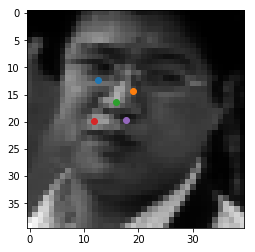

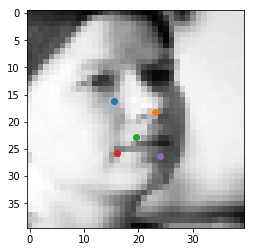


step: 11801 loss: 6.16683 


step: 11802 loss: 8.12095 


step: 11803 loss: 3.46785 


step: 11804 loss: 7.77864 


step: 11805 loss: 4.01515 


step: 11806 loss: 3.44958 


step: 11807 loss: 6.75055 


step: 11808 loss: 7.39972 


step: 11809 loss: 4.02143 


step: 11810 loss: 8.70576 


step: 11811 loss: 7.00715 


step: 11812 loss: 4.35124 


step: 11813 loss: 4.47366 


step: 11814 loss: 4.02406 


step: 11815 loss: 3.60797 


step: 11816 loss: 5.88716 


step: 11817 loss: 7.18339 


step: 11818 loss: 7.27011 


step: 11819 loss: 3.78816 


step: 11820 loss: 4.0761 


step: 11821 loss: 4.23307 


step: 11822 loss: 3.46081 


step: 11823 loss: 6.27271 


step: 11824 loss: 7.08084 


step: 11825 loss: 7.59302 


step: 11826 loss: 7.98065 


step: 11827 loss: 3.56707 


step: 11828 loss: 7.44206 


step: 11829 loss: 7.81612 


step: 11830 loss: 6.58402 


step: 11831 loss: 7.247 


step: 11832 loss: 7.01509 


step: 11833 loss: 3.63251 


step: 11834 loss: 3.81949 


step: 11835 loss

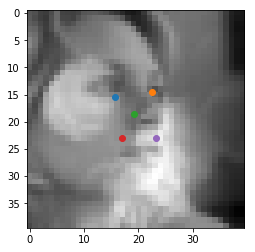

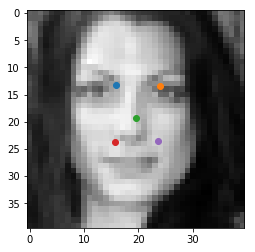

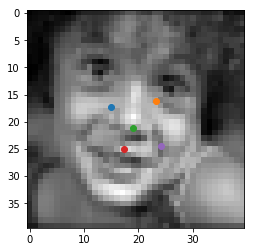


step: 11901 loss: 8.20941 


step: 11902 loss: 7.51553 


step: 11903 loss: 3.79724 


step: 11904 loss: 4.26951 


step: 11905 loss: 7.25655 


step: 11906 loss: 8.11646 


step: 11907 loss: 3.36751 


step: 11908 loss: 6.86885 


step: 11909 loss: 3.65826 


step: 11910 loss: 7.01191 


step: 11911 loss: 3.37494 


step: 11912 loss: 7.48731 


step: 11913 loss: 3.70543 


step: 11914 loss: 7.27393 


step: 11915 loss: 7.1443 


step: 11916 loss: 7.12357 


step: 11917 loss: 8.03982 


step: 11918 loss: 6.77185 


step: 11919 loss: 4.21262 


step: 11920 loss: 4.03783 


step: 11921 loss: 7.30137 


step: 11922 loss: 3.69786 


step: 11923 loss: 7.32501 


step: 11924 loss: 6.72948 


step: 11925 loss: 7.62502 


step: 11926 loss: 7.19035 


step: 11927 loss: 3.86638 


step: 11928 loss: 4.3139 


step: 11929 loss: 3.87441 


step: 11930 loss: 7.20057 


step: 11931 loss: 3.8006 


step: 11932 loss: 3.93408 


step: 11933 loss: 6.68642 


step: 11934 loss: 6.57165 


step: 11935 loss

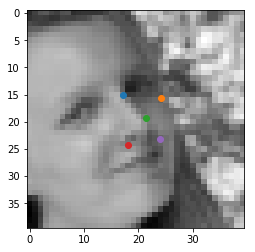

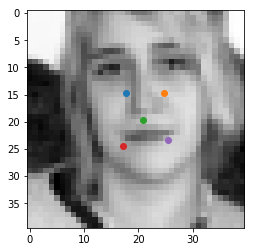

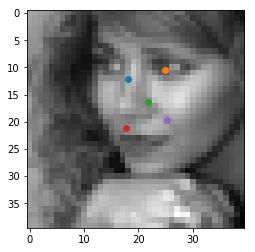

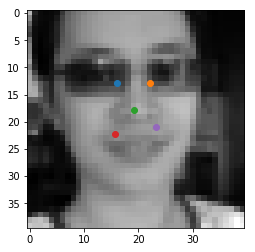


step: 12001 loss: 3.52744 


step: 12002 loss: 3.74562 


step: 12003 loss: 3.45627 


step: 12004 loss: 3.13183 


step: 12005 loss: 8.57126 


step: 12006 loss: 8.09856 


step: 12007 loss: 3.65437 


step: 12008 loss: 7.40414 


step: 12009 loss: 6.70941 


step: 12010 loss: 6.8796 


step: 12011 loss: 3.3995 


step: 12012 loss: 7.49447 


step: 12013 loss: 3.54168 


step: 12014 loss: 7.4405 


step: 12015 loss: 4.01087 


step: 12016 loss: 6.81699 


step: 12017 loss: 6.79014 


step: 12018 loss: 6.797 


step: 12019 loss: 3.5575 


step: 12020 loss: 8.6087 


step: 12021 loss: 3.55315 


step: 12022 loss: 3.69763 


step: 12023 loss: 7.25934 


step: 12024 loss: 3.53122 


step: 12025 loss: 3.97152 


step: 12026 loss: 7.81639 


step: 12027 loss: 3.94233 


step: 12028 loss: 6.35859 


step: 12029 loss: 3.87203 


step: 12030 loss: 6.20691 


step: 12031 loss: 3.7394 


step: 12032 loss: 8.49373 


step: 12033 loss: 7.08864 


step: 12034 loss: 3.45942 


step: 12035 loss: 3.4

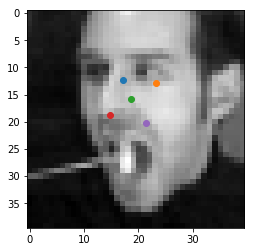

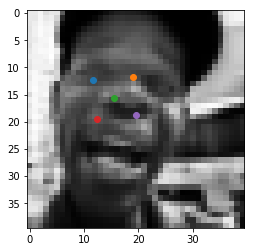

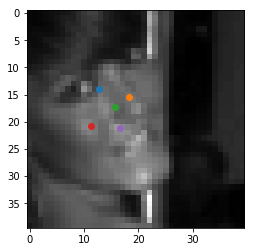


step: 12101 loss: 3.70741 


step: 12102 loss: 7.20241 


step: 12103 loss: 6.52641 


step: 12104 loss: 3.78035 


step: 12105 loss: 6.99025 


step: 12106 loss: 3.61776 


step: 12107 loss: 4.15026 


step: 12108 loss: 3.74943 


step: 12109 loss: 3.38074 


step: 12110 loss: 6.94414 


step: 12111 loss: 3.82538 


step: 12112 loss: 7.38545 


step: 12113 loss: 3.73353 


step: 12114 loss: 6.13759 


step: 12115 loss: 6.7212 


step: 12116 loss: 6.96946 


step: 12117 loss: 6.67404 


step: 12118 loss: 6.63821 


step: 12119 loss: 6.24544 


step: 12120 loss: 7.04341 


step: 12121 loss: 6.48613 


step: 12122 loss: 3.71441 


step: 12123 loss: 3.63384 


step: 12124 loss: 3.73698 


step: 12125 loss: 7.75188 


step: 12126 loss: 3.42477 


step: 12127 loss: 3.77209 


step: 12128 loss: 3.28947 


step: 12129 loss: 3.68739 


step: 12130 loss: 3.78745 


step: 12131 loss: 3.56674 


step: 12132 loss: 3.57419 


step: 12133 loss: 3.57511 


step: 12134 loss: 6.98356 


step: 12135 lo

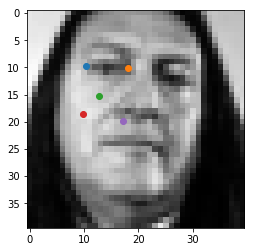

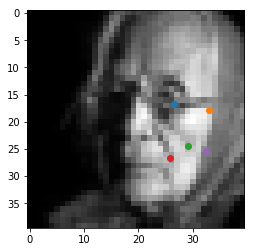

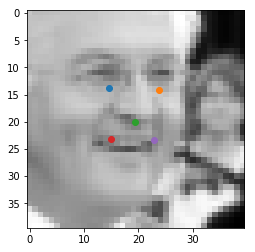

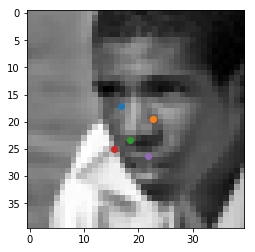


step: 12201 loss: 4.08512 


step: 12202 loss: 7.66603 


step: 12203 loss: 3.5183 


step: 12204 loss: 7.82343 


step: 12205 loss: 7.5389 


step: 12206 loss: 6.75679 


step: 12207 loss: 3.26207 


step: 12208 loss: 3.95352 


step: 12209 loss: 4.07838 


step: 12210 loss: 6.52563 


step: 12211 loss: 3.31502 


step: 12212 loss: 4.1016 


step: 12213 loss: 4.10017 


step: 12214 loss: 6.95429 


step: 12215 loss: 3.79898 


step: 12216 loss: 3.43629 


step: 12217 loss: 8.09536 


step: 12218 loss: 3.61752 


step: 12219 loss: 3.74682 


step: 12220 loss: 7.27366 


step: 12221 loss: 3.31536 


step: 12222 loss: 6.86354 


step: 12223 loss: 7.25221 


step: 12224 loss: 7.68665 


step: 12225 loss: 6.78257 


step: 12226 loss: 3.63507 


step: 12227 loss: 7.47024 


step: 12228 loss: 3.68496 


step: 12229 loss: 7.63211 


step: 12230 loss: 7.72717 


step: 12231 loss: 3.53505 


step: 12232 loss: 6.59044 


step: 12233 loss: 6.9531 


step: 12234 loss: 7.37971 


step: 12235 loss:

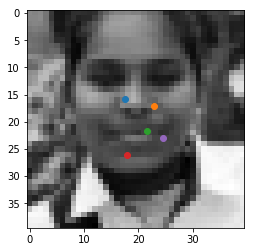

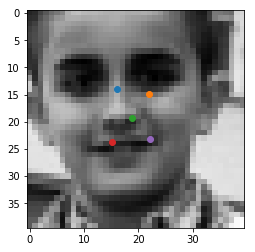

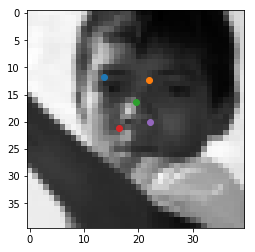

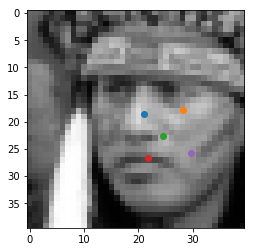


step: 12301 loss: 6.83305 


step: 12302 loss: 3.68466 


step: 12303 loss: 3.67962 


step: 12304 loss: 6.97668 


step: 12305 loss: 7.13292 


step: 12306 loss: 6.81572 


step: 12307 loss: 6.53655 


step: 12308 loss: 6.73152 


step: 12309 loss: 6.12595 


step: 12310 loss: 6.27691 


step: 12311 loss: 3.88766 


step: 12312 loss: 4.22087 


step: 12313 loss: 6.05366 


step: 12314 loss: 3.9114 


step: 12315 loss: 3.86518 


step: 12316 loss: 4.03474 


step: 12317 loss: 3.67144 


step: 12318 loss: 3.86189 


step: 12319 loss: 7.44573 


step: 12320 loss: 3.94991 


step: 12321 loss: 3.63275 


step: 12322 loss: 3.46822 


step: 12323 loss: 6.92952 


step: 12324 loss: 5.86637 


step: 12325 loss: 3.63845 


step: 12326 loss: 6.47086 


step: 12327 loss: 6.53516 


step: 12328 loss: 8.68382 


step: 12329 loss: 3.63095 


step: 12330 loss: 3.44734 


step: 12331 loss: 3.81656 


step: 12332 loss: 6.7526 


step: 12333 loss: 3.56492 


step: 12334 loss: 3.36088 


step: 12335 los

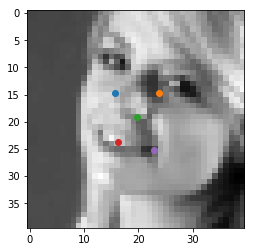

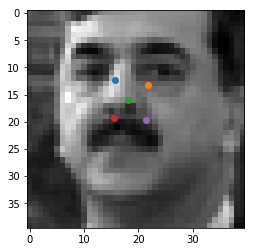


step: 12401 loss: 3.51369 


step: 12402 loss: 3.39304 


step: 12403 loss: 3.44082 


step: 12404 loss: 8.60953 


step: 12405 loss: 3.34297 


step: 12406 loss: 3.15692 


step: 12407 loss: 7.62345 


step: 12408 loss: 7.35297 


step: 12409 loss: 7.8583 


step: 12410 loss: 6.49346 


step: 12411 loss: 6.79169 


step: 12412 loss: 5.50662 


step: 12413 loss: 7.88227 


step: 12414 loss: 3.60906 


step: 12415 loss: 3.22212 


step: 12416 loss: 3.3891 


step: 12417 loss: 3.68744 


step: 12418 loss: 3.31755 


step: 12419 loss: 3.45302 


step: 12420 loss: 2.95777 


step: 12421 loss: 3.49071 


step: 12422 loss: 7.8504 


step: 12423 loss: 6.62625 


step: 12424 loss: 3.90609 


step: 12425 loss: 3.43483 


step: 12426 loss: 7.60764 


step: 12427 loss: 6.19927 


step: 12428 loss: 7.72262 


step: 12429 loss: 7.29179 


step: 12430 loss: 3.04496 


step: 12431 loss: 7.22583 


step: 12432 loss: 3.36218 


step: 12433 loss: 5.96957 


step: 12434 loss: 3.62597 


step: 12435 loss

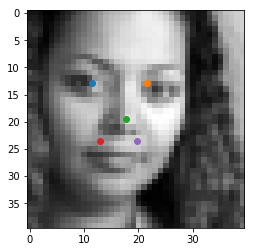

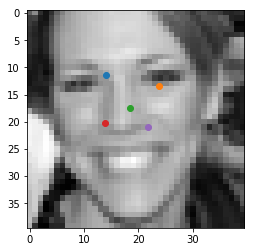

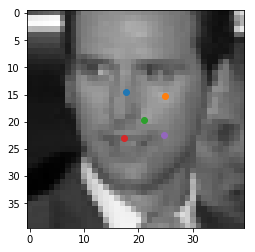

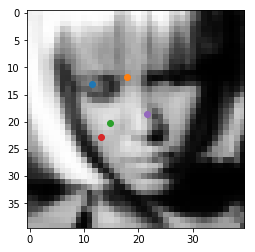

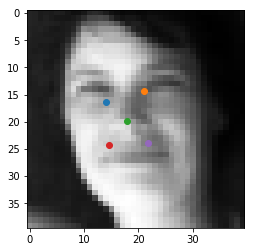


step: 12501 loss: 7.81094 


step: 12502 loss: 6.41726 


step: 12503 loss: 3.19325 


step: 12504 loss: 3.60972 


step: 12505 loss: 3.70009 


step: 12506 loss: 3.82521 


step: 12507 loss: 3.43637 


step: 12508 loss: 7.01705 


step: 12509 loss: 6.78354 


step: 12510 loss: 6.49652 


step: 12511 loss: 7.07551 


step: 12512 loss: 3.44613 


step: 12513 loss: 7.30618 


step: 12514 loss: 7.39886 


step: 12515 loss: 3.39094 


step: 12516 loss: 3.74354 


step: 12517 loss: 3.73245 


step: 12518 loss: 3.37964 


step: 12519 loss: 3.38917 


step: 12520 loss: 5.84595 


step: 12521 loss: 3.4953 


step: 12522 loss: 3.46645 


step: 12523 loss: 7.06341 


step: 12524 loss: 7.25777 


step: 12525 loss: 6.82524 


step: 12526 loss: 3.31102 


step: 12527 loss: 3.37515 


step: 12528 loss: 6.58834 


step: 12529 loss: 7.02825 


step: 12530 loss: 3.47387 


step: 12531 loss: 6.38097 


step: 12532 loss: 7.37162 


step: 12533 loss: 3.18233 


step: 12534 loss: 3.45677 


step: 12535 lo

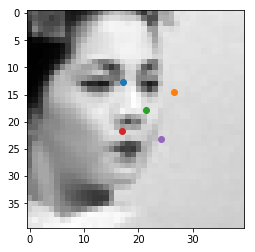

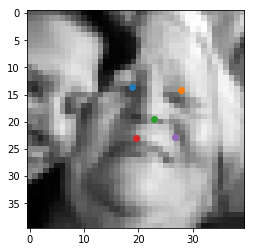

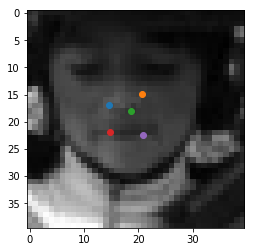

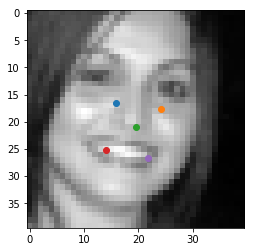

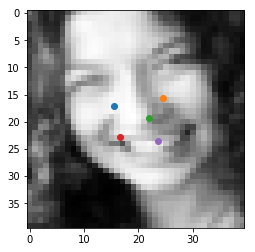


step: 12601 loss: 3.7716 


step: 12602 loss: 5.50879 


step: 12603 loss: 7.19099 


step: 12604 loss: 3.60995 


step: 12605 loss: 3.81373 


step: 12606 loss: 3.90318 


step: 12607 loss: 7.27294 


step: 12608 loss: 3.63425 


step: 12609 loss: 6.91561 


step: 12610 loss: 7.52336 


step: 12611 loss: 7.01785 


step: 12612 loss: 3.68353 


step: 12613 loss: 4.04806 


step: 12614 loss: 3.57524 


step: 12615 loss: 3.48908 


step: 12616 loss: 6.58748 


step: 12617 loss: 7.84341 


step: 12618 loss: 3.56817 


step: 12619 loss: 6.88451 


step: 12620 loss: 6.0419 


step: 12621 loss: 3.58649 


step: 12622 loss: 3.99974 


step: 12623 loss: 6.50955 


step: 12624 loss: 6.65181 


step: 12625 loss: 7.54344 


step: 12626 loss: 6.90322 


step: 12627 loss: 3.67464 


step: 12628 loss: 3.3035 


step: 12629 loss: 6.85132 


step: 12630 loss: 6.23669 


step: 12631 loss: 4.01726 


step: 12632 loss: 3.82581 


step: 12633 loss: 6.89546 


step: 12634 loss: 6.31357 


step: 12635 loss

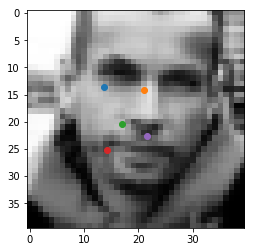

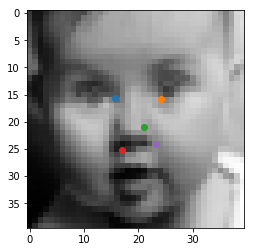

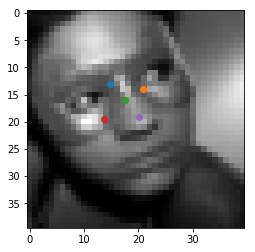

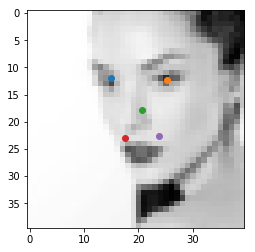

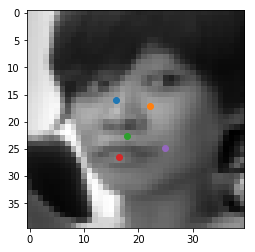


step: 12701 loss: 3.6653 


step: 12702 loss: 6.40435 


step: 12703 loss: 6.46778 


step: 12704 loss: 3.56559 


step: 12705 loss: 6.97939 


step: 12706 loss: 3.67596 


step: 12707 loss: 6.45774 


step: 12708 loss: 3.53405 


step: 12709 loss: 3.86912 


step: 12710 loss: 7.33004 


step: 12711 loss: 3.44129 


step: 12712 loss: 5.74807 


step: 12713 loss: 7.02911 


step: 12714 loss: 4.01461 


step: 12715 loss: 3.83419 


step: 12716 loss: 3.42703 


step: 12717 loss: 6.54918 


step: 12718 loss: 3.7928 


step: 12719 loss: 7.26214 


step: 12720 loss: 3.24148 


step: 12721 loss: 3.54064 


step: 12722 loss: 3.72797 


step: 12723 loss: 3.42902 


step: 12724 loss: 6.32773 


step: 12725 loss: 3.58373 


step: 12726 loss: 3.54728 


step: 12727 loss: 3.43052 


step: 12728 loss: 3.40235 


step: 12729 loss: 3.38111 


step: 12730 loss: 3.69197 


step: 12731 loss: 3.16357 


step: 12732 loss: 3.33748 


step: 12733 loss: 6.48944 


step: 12734 loss: 3.55458 


step: 12735 los

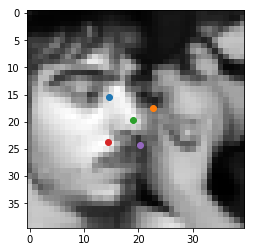

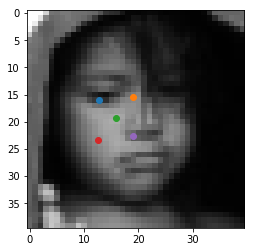

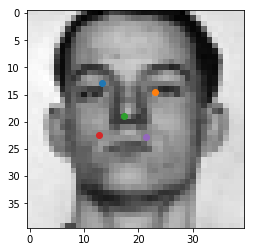

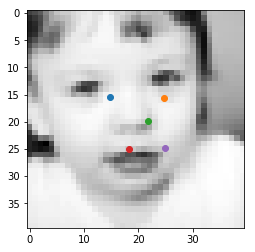


step: 12801 loss: 3.98421 


step: 12802 loss: 3.1177 


step: 12803 loss: 6.82623 


step: 12804 loss: 6.98383 


step: 12805 loss: 7.07155 


step: 12806 loss: 3.51756 


step: 12807 loss: 3.62553 


step: 12808 loss: 3.46235 


step: 12809 loss: 7.10024 


step: 12810 loss: 3.40246 


step: 12811 loss: 6.8188 


step: 12812 loss: 7.51278 


step: 12813 loss: 6.05676 


step: 12814 loss: 3.56853 


step: 12815 loss: 3.54151 


step: 12816 loss: 3.3963 


step: 12817 loss: 6.44175 


step: 12818 loss: 6.71273 


step: 12819 loss: 6.73087 


step: 12820 loss: 7.75183 


step: 12821 loss: 3.19804 


step: 12822 loss: 3.5846 


step: 12823 loss: 7.47288 


step: 12824 loss: 6.1624 


step: 12825 loss: 3.52247 


step: 12826 loss: 7.05412 


step: 12827 loss: 3.50553 


step: 12828 loss: 6.85996 


step: 12829 loss: 8.11823 


step: 12830 loss: 4.12765 


step: 12831 loss: 3.18859 


step: 12832 loss: 7.15667 


step: 12833 loss: 6.9048 


step: 12834 loss: 3.99471 


step: 12835 loss: 3

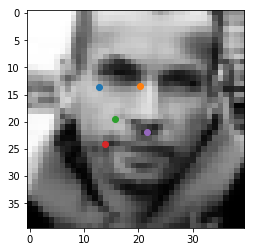

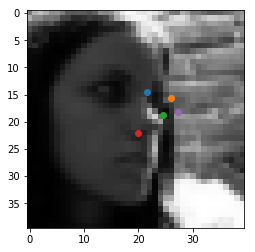

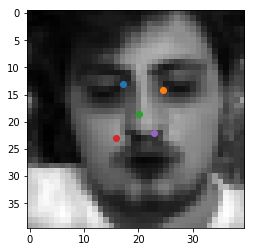


step: 12901 loss: 5.96748 


step: 12902 loss: 3.47985 


step: 12903 loss: 7.02847 


step: 12904 loss: 6.50715 


step: 12905 loss: 3.66133 


step: 12906 loss: 6.64645 


step: 12907 loss: 6.14409 


step: 12908 loss: 3.39749 


step: 12909 loss: 3.35002 


step: 12910 loss: 3.18632 


step: 12911 loss: 6.29064 


step: 12912 loss: 3.33714 


step: 12913 loss: 6.67269 


step: 12914 loss: 7.07702 


step: 12915 loss: 6.12728 


step: 12916 loss: 6.79509 


step: 12917 loss: 6.57817 


step: 12918 loss: 7.76442 


step: 12919 loss: 7.235 


step: 12920 loss: 7.00766 


step: 12921 loss: 6.54208 


step: 12922 loss: 3.58514 


step: 12923 loss: 3.54192 


step: 12924 loss: 6.5788 


step: 12925 loss: 7.08063 


step: 12926 loss: 6.79744 


step: 12927 loss: 7.11508 


step: 12928 loss: 5.72019 


step: 12929 loss: 6.20754 


step: 12930 loss: 3.80782 


step: 12931 loss: 7.05054 


step: 12932 loss: 3.5982 


step: 12933 loss: 6.03337 


step: 12934 loss: 3.95542 


step: 12935 loss:

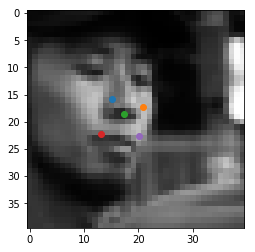

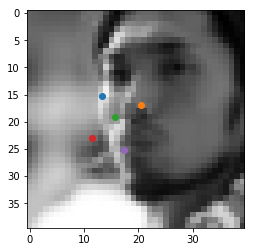

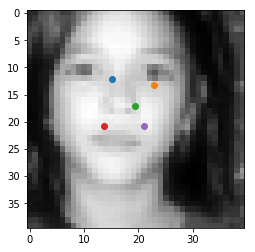


step: 13001 loss: 3.92014 


step: 13002 loss: 6.48465 


step: 13003 loss: 6.18076 


step: 13004 loss: 6.19899 


step: 13005 loss: 3.77057 


step: 13006 loss: 3.7637 


step: 13007 loss: 3.73427 


step: 13008 loss: 3.80758 


step: 13009 loss: 6.62947 


step: 13010 loss: 3.65265 


step: 13011 loss: 5.54313 


step: 13012 loss: 3.55425 


step: 13013 loss: 3.18852 


step: 13014 loss: 5.6535 


step: 13015 loss: 6.58081 


step: 13016 loss: 3.82411 


step: 13017 loss: 3.26923 


step: 13018 loss: 6.49937 


step: 13019 loss: 3.15047 


step: 13020 loss: 3.34225 


step: 13021 loss: 6.31658 


step: 13022 loss: 6.90913 


step: 13023 loss: 6.02527 


step: 13024 loss: 3.5352 


step: 13025 loss: 3.46773 


step: 13026 loss: 3.28285 


step: 13027 loss: 7.73397 


step: 13028 loss: 3.36723 


step: 13029 loss: 7.40452 


step: 13030 loss: 7.3317 


step: 13031 loss: 3.37834 


step: 13032 loss: 7.55115 


step: 13033 loss: 6.39185 


step: 13034 loss: 3.30155 


step: 13035 loss:

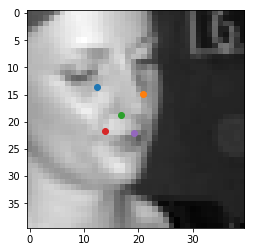

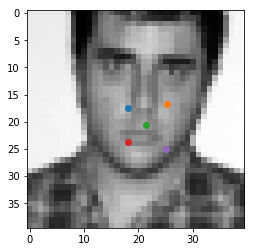

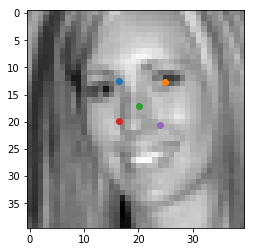

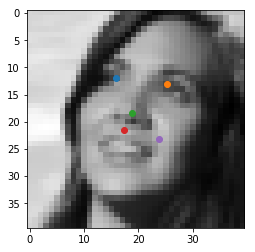


step: 13101 loss: 3.61425 


step: 13102 loss: 3.55226 


step: 13103 loss: 3.629 


step: 13104 loss: 6.03933 


step: 13105 loss: 6.44733 


step: 13106 loss: 7.37426 


step: 13107 loss: 7.27113 


step: 13108 loss: 7.30362 


step: 13109 loss: 7.6972 


step: 13110 loss: 6.8792 


step: 13111 loss: 6.40798 


step: 13112 loss: 6.90716 


step: 13113 loss: 6.93117 


step: 13114 loss: 3.10886 


step: 13115 loss: 6.14765 


step: 13116 loss: 7.70607 


step: 13117 loss: 3.72314 


step: 13118 loss: 3.52946 


step: 13119 loss: 6.67924 


step: 13120 loss: 5.69473 


step: 13121 loss: 3.6075 


step: 13122 loss: 3.81462 


step: 13123 loss: 3.47237 


step: 13124 loss: 6.04194 


step: 13125 loss: 3.9104 


step: 13126 loss: 3.38683 


step: 13127 loss: 3.47429 


step: 13128 loss: 6.57161 


step: 13129 loss: 6.50675 


step: 13130 loss: 3.5906 


step: 13131 loss: 3.45485 


step: 13132 loss: 3.13449 


step: 13133 loss: 3.36345 


step: 13134 loss: 3.35317 


step: 13135 loss: 3.

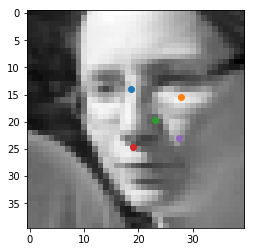

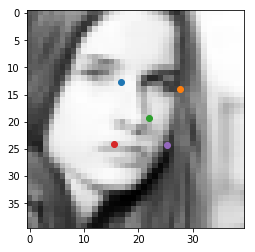

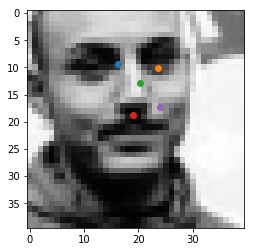

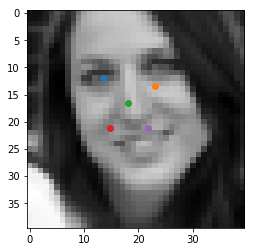


step: 13201 loss: 6.70317 


step: 13202 loss: 3.7717 


step: 13203 loss: 6.93694 


step: 13204 loss: 3.34076 


step: 13205 loss: 7.00402 


step: 13206 loss: 6.62618 


step: 13207 loss: 3.4455 


step: 13208 loss: 7.07934 


step: 13209 loss: 6.07617 


step: 13210 loss: 3.85014 


step: 13211 loss: 7.25538 


step: 13212 loss: 3.37481 


step: 13213 loss: 6.36994 


step: 13214 loss: 3.54937 


step: 13215 loss: 5.95759 


step: 13216 loss: 3.56576 


step: 13217 loss: 7.11632 


step: 13218 loss: 3.39643 


step: 13219 loss: 3.48152 


step: 13220 loss: 7.20247 


step: 13221 loss: 3.60438 


step: 13222 loss: 6.23841 


step: 13223 loss: 3.40942 


step: 13224 loss: 7.42922 


step: 13225 loss: 3.44252 


step: 13226 loss: 3.20379 


step: 13227 loss: 3.65636 


step: 13228 loss: 2.94653 


step: 13229 loss: 3.5314 


step: 13230 loss: 3.36694 


step: 13231 loss: 3.29383 


step: 13232 loss: 6.36843 


step: 13233 loss: 6.01649 


step: 13234 loss: 3.21139 


step: 13235 loss

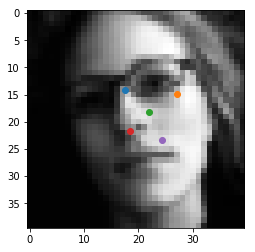

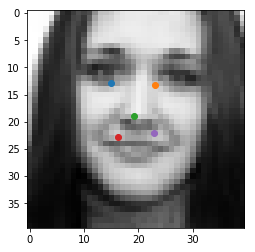

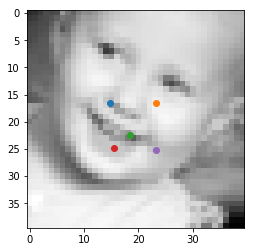


step: 13301 loss: 7.84816 


step: 13302 loss: 3.38381 


step: 13303 loss: 6.18409 


step: 13304 loss: 3.37444 


step: 13305 loss: 3.76732 


step: 13306 loss: 3.20076 


step: 13307 loss: 7.33108 


step: 13308 loss: 6.49865 


step: 13309 loss: 5.9754 


step: 13310 loss: 6.70453 


step: 13311 loss: 6.81775 


step: 13312 loss: 3.38952 


step: 13313 loss: 3.1279 


step: 13314 loss: 3.11366 


step: 13315 loss: 6.73896 


step: 13316 loss: 3.59227 


step: 13317 loss: 3.30082 


step: 13318 loss: 3.42158 


step: 13319 loss: 6.6437 


step: 13320 loss: 3.28795 


step: 13321 loss: 3.62338 


step: 13322 loss: 5.66578 


step: 13323 loss: 6.35085 


step: 13324 loss: 7.00137 


step: 13325 loss: 3.50717 


step: 13326 loss: 5.7377 


step: 13327 loss: 3.17916 


step: 13328 loss: 3.47825 


step: 13329 loss: 7.9356 


step: 13330 loss: 3.20367 


step: 13331 loss: 6.64124 


step: 13332 loss: 3.23761 


step: 13333 loss: 7.01875 


step: 13334 loss: 7.02951 


step: 13335 loss: 

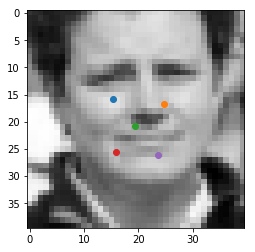

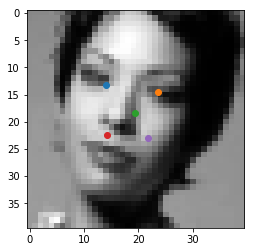


step: 13401 loss: 6.88052 


step: 13402 loss: 6.67078 


step: 13403 loss: 7.51069 


step: 13404 loss: 6.94978 


step: 13405 loss: 6.53479 


step: 13406 loss: 3.56118 


step: 13407 loss: 7.78568 


step: 13408 loss: 3.51811 


step: 13409 loss: 7.57876 


step: 13410 loss: 6.29064 


step: 13411 loss: 3.12483 


step: 13412 loss: 6.68565 


step: 13413 loss: 7.58879 


step: 13414 loss: 3.913 


step: 13415 loss: 7.07434 


step: 13416 loss: 3.44739 


step: 13417 loss: 6.45529 


step: 13418 loss: 3.87556 


step: 13419 loss: 7.07506 


step: 13420 loss: 3.44762 


step: 13421 loss: 3.02716 


step: 13422 loss: 6.73977 


step: 13423 loss: 3.48185 


step: 13424 loss: 3.39643 


step: 13425 loss: 7.71303 


step: 13426 loss: 3.24264 


step: 13427 loss: 7.087 


step: 13428 loss: 5.74419 


step: 13429 loss: 7.44798 


step: 13430 loss: 5.72391 


step: 13431 loss: 3.3307 


step: 13432 loss: 3.84606 


step: 13433 loss: 3.69878 


step: 13434 loss: 6.72884 


step: 13435 loss: 

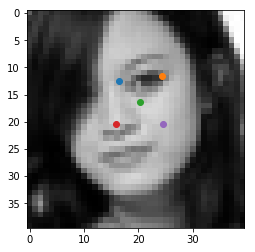

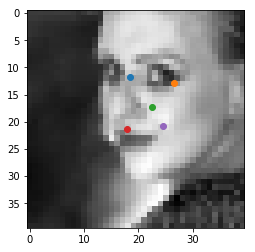

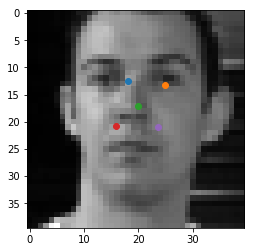


step: 13501 loss: 3.21554 


step: 13502 loss: 3.29038 


step: 13503 loss: 3.70391 


step: 13504 loss: 5.65234 


step: 13505 loss: 6.86162 


step: 13506 loss: 2.97092 


step: 13507 loss: 3.32189 


step: 13508 loss: 7.27491 


step: 13509 loss: 7.51495 


step: 13510 loss: 3.46497 


step: 13511 loss: 6.39047 


step: 13512 loss: 5.91103 


step: 13513 loss: 3.39647 


step: 13514 loss: 6.00653 


step: 13515 loss: 6.45147 


step: 13516 loss: 3.58476 


step: 13517 loss: 3.48471 


step: 13518 loss: 7.90712 


step: 13519 loss: 3.3256 


step: 13520 loss: 6.59309 


step: 13521 loss: 3.06489 


step: 13522 loss: 6.14046 


step: 13523 loss: 3.40282 


step: 13524 loss: 6.94634 


step: 13525 loss: 3.43586 


step: 13526 loss: 6.34454 


step: 13527 loss: 7.76122 


step: 13528 loss: 6.73811 


step: 13529 loss: 7.22501 


step: 13530 loss: 3.33665 


step: 13531 loss: 3.59313 


step: 13532 loss: 3.36329 


step: 13533 loss: 7.36487 


step: 13534 loss: 3.25658 


step: 13535 lo

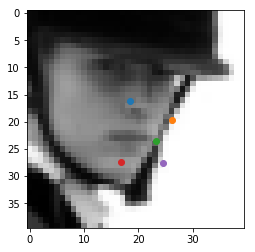

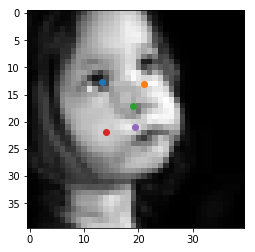


step: 13601 loss: 3.12346 


step: 13602 loss: 2.98162 


step: 13603 loss: 6.38454 


step: 13604 loss: 3.57752 


step: 13605 loss: 6.14323 


step: 13606 loss: 3.26495 


step: 13607 loss: 7.02689 


step: 13608 loss: 6.27786 


step: 13609 loss: 3.33624 


step: 13610 loss: 3.25212 


step: 13611 loss: 3.20921 


step: 13612 loss: 6.54155 


step: 13613 loss: 7.58392 


step: 13614 loss: 3.33442 


step: 13615 loss: 7.47174 


step: 13616 loss: 6.29296 


step: 13617 loss: 6.24582 


step: 13618 loss: 3.32354 


step: 13619 loss: 5.8541 


step: 13620 loss: 3.261 


step: 13621 loss: 3.70488 


step: 13622 loss: 5.39455 


step: 13623 loss: 6.20355 


step: 13624 loss: 7.0128 


step: 13625 loss: 6.49709 


step: 13626 loss: 6.22785 


step: 13627 loss: 3.40052 


step: 13628 loss: 7.00051 


step: 13629 loss: 3.33679 


step: 13630 loss: 6.86858 


step: 13631 loss: 6.84585 


step: 13632 loss: 5.68426 


step: 13633 loss: 7.15045 


step: 13634 loss: 3.5696 


step: 13635 loss: 

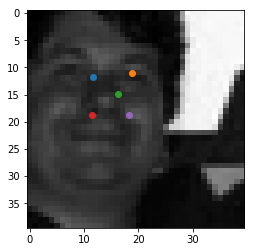

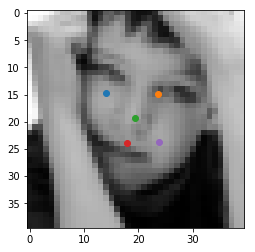

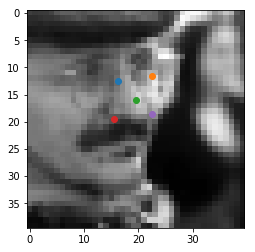

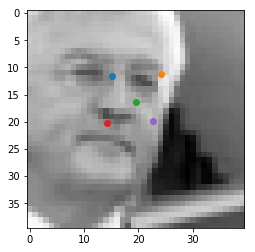

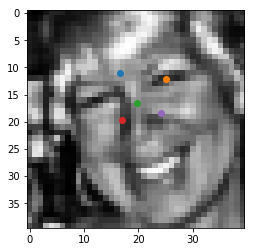


step: 13701 loss: 6.76507 


step: 13702 loss: 2.95989 


step: 13703 loss: 2.87224 


step: 13704 loss: 6.48015 


step: 13705 loss: 5.47605 


step: 13706 loss: 3.32964 


step: 13707 loss: 6.45472 


step: 13708 loss: 3.15052 


step: 13709 loss: 3.11465 


step: 13710 loss: 6.47574 


step: 13711 loss: 3.36932 


step: 13712 loss: 6.66771 


step: 13713 loss: 3.05755 


step: 13714 loss: 7.16713 


step: 13715 loss: 6.6796 


step: 13716 loss: 5.9106 


step: 13717 loss: 3.09958 


step: 13718 loss: 3.28064 


step: 13719 loss: 6.95867 


step: 13720 loss: 3.33645 


step: 13721 loss: 2.94951 


step: 13722 loss: 3.1406 


step: 13723 loss: 3.46194 


step: 13724 loss: 3.23723 


step: 13725 loss: 3.18249 


step: 13726 loss: 3.01213 


step: 13727 loss: 3.14847 


step: 13728 loss: 3.12569 


step: 13729 loss: 5.48825 


step: 13730 loss: 3.27617 


step: 13731 loss: 6.9167 


step: 13732 loss: 3.20273 


step: 13733 loss: 6.58966 


step: 13734 loss: 5.84837 


step: 13735 loss:

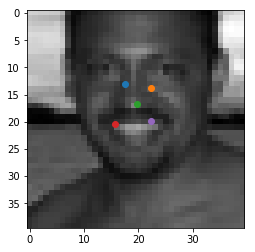

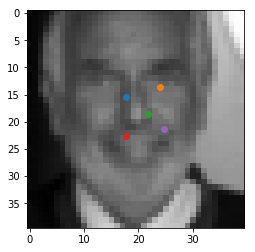

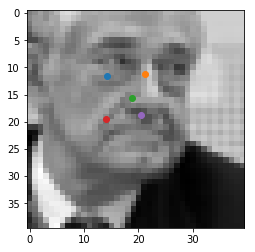

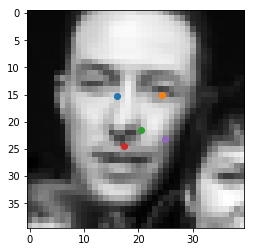

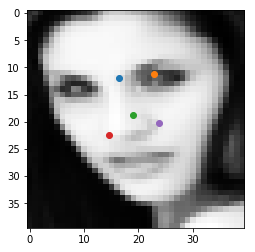


step: 13801 loss: 3.28219 


step: 13802 loss: 6.91651 


step: 13803 loss: 3.26329 


step: 13804 loss: 6.44751 


step: 13805 loss: 6.86972 


step: 13806 loss: 3.14875 


step: 13807 loss: 3.12944 


step: 13808 loss: 3.12261 


step: 13809 loss: 6.4853 


step: 13810 loss: 7.88539 


step: 13811 loss: 6.0374 


step: 13812 loss: 7.08016 


step: 13813 loss: 6.63595 


step: 13814 loss: 6.03449 


step: 13815 loss: 3.20327 


step: 13816 loss: 6.41223 


step: 13817 loss: 6.69004 


step: 13818 loss: 5.68972 


step: 13819 loss: 3.36481 


step: 13820 loss: 6.42818 


step: 13821 loss: 3.27881 


step: 13822 loss: 6.15511 


step: 13823 loss: 6.60267 


step: 13824 loss: 3.64133 


step: 13825 loss: 6.57617 


step: 13826 loss: 6.38404 


step: 13827 loss: 3.61715 


step: 13828 loss: 3.16959 


step: 13829 loss: 7.08862 


step: 13830 loss: 6.73182 


step: 13831 loss: 5.51666 


step: 13832 loss: 3.41584 


step: 13833 loss: 6.61224 


step: 13834 loss: 3.40105 


step: 13835 los

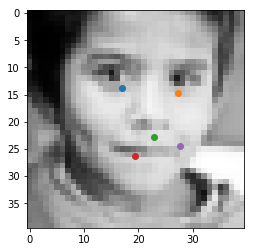

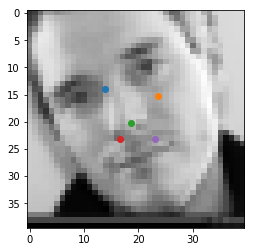

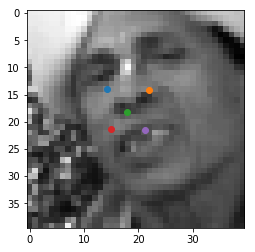

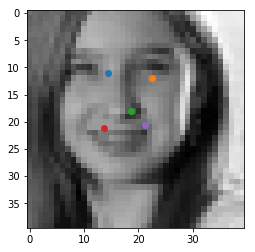


step: 13901 loss: 6.71032 


step: 13902 loss: 3.67966 


step: 13903 loss: 3.03591 


step: 13904 loss: 6.1069 


step: 13905 loss: 6.64225 


step: 13906 loss: 3.30391 


step: 13907 loss: 6.45676 


step: 13908 loss: 6.03062 


step: 13909 loss: 6.73548 


step: 13910 loss: 3.67661 


step: 13911 loss: 6.49622 


step: 13912 loss: 6.66487 


step: 13913 loss: 6.72675 


step: 13914 loss: 3.58077 


step: 13915 loss: 3.46288 


step: 13916 loss: 6.40628 


step: 13917 loss: 5.85497 


step: 13918 loss: 3.43525 


step: 13919 loss: 3.44207 


step: 13920 loss: 6.36211 


step: 13921 loss: 6.05942 


step: 13922 loss: 7.14605 


step: 13923 loss: 5.98908 


step: 13924 loss: 6.37231 


step: 13925 loss: 3.48573 


step: 13926 loss: 6.61043 


step: 13927 loss: 3.57831 


step: 13928 loss: 6.48305 


step: 13929 loss: 7.95145 


step: 13930 loss: 3.85398 


step: 13931 loss: 5.98473 


step: 13932 loss: 3.82471 


step: 13933 loss: 3.17972 


step: 13934 loss: 6.76486 


step: 13935 lo

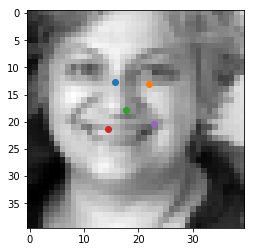


step: 14001 loss: 7.83201 


step: 14002 loss: 3.57215 


step: 14003 loss: 3.02722 


step: 14004 loss: 2.96293 


step: 14005 loss: 3.36559 


step: 14006 loss: 7.02393 


step: 14007 loss: 2.95609 


step: 14008 loss: 3.08509 


step: 14009 loss: 7.09725 


step: 14010 loss: 6.00089 


step: 14011 loss: 3.30025 


step: 14012 loss: 7.10546 


step: 14013 loss: 3.13308 


step: 14014 loss: 5.90054 


step: 14015 loss: 3.06251 


step: 14016 loss: 5.40245 


step: 14017 loss: 5.51805 


step: 14018 loss: 2.85457 


step: 14019 loss: 6.03033 


step: 14020 loss: 3.29902 


step: 14021 loss: 3.39807 


step: 14022 loss: 3.04984 


step: 14023 loss: 3.43332 


step: 14024 loss: 6.97598 


step: 14025 loss: 3.09815 


step: 14026 loss: 6.44085 


step: 14027 loss: 5.90168 


step: 14028 loss: 6.2915 


step: 14029 loss: 3.16494 


step: 14030 loss: 3.17636 


step: 14031 loss: 3.28062 


step: 14032 loss: 3.08887 


step: 14033 loss: 6.63631 


step: 14034 loss: 3.34019 


step: 14035 lo

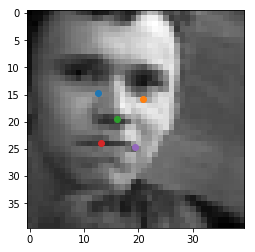


step: 14101 loss: 6.77967 


step: 14102 loss: 3.21432 


step: 14103 loss: 6.23488 


step: 14104 loss: 3.32456 


step: 14105 loss: 3.1942 


step: 14106 loss: 5.99632 


step: 14107 loss: 3.30677 


step: 14108 loss: 6.0731 


step: 14109 loss: 3.44093 


step: 14110 loss: 3.0324 


step: 14111 loss: 3.17775 


step: 14112 loss: 6.1478 


step: 14113 loss: 6.70319 


step: 14114 loss: 3.09742 


step: 14115 loss: 3.16066 


step: 14116 loss: 3.45614 


step: 14117 loss: 2.97409 


step: 14118 loss: 6.30941 


step: 14119 loss: 3.12737 


step: 14120 loss: 2.99309 


step: 14121 loss: 5.88685 


step: 14122 loss: 5.87392 


step: 14123 loss: 6.51056 


step: 14124 loss: 5.9394 


step: 14125 loss: 7.21634 


step: 14126 loss: 6.23413 


step: 14127 loss: 3.15056 


step: 14128 loss: 3.24185 


step: 14129 loss: 3.42967 


step: 14130 loss: 7.19666 


step: 14131 loss: 3.30441 


step: 14132 loss: 7.02936 


step: 14133 loss: 3.52443 


step: 14134 loss: 3.55886 


step: 14135 loss: 

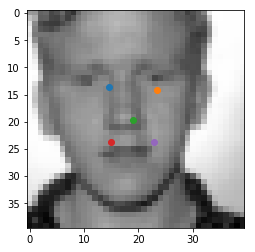

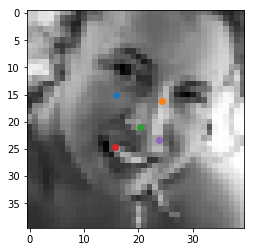

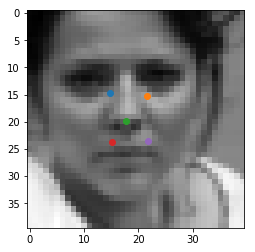


step: 14201 loss: 6.51403 


step: 14202 loss: 6.97551 


step: 14203 loss: 7.64819 


step: 14204 loss: 7.53772 


step: 14205 loss: 3.43018 


step: 14206 loss: 7.78264 


step: 14207 loss: 8.06827 


step: 14208 loss: 6.17893 


step: 14209 loss: 3.61089 


step: 14210 loss: 4.2332 


step: 14211 loss: 3.62929 


step: 14212 loss: 6.33368 


step: 14213 loss: 3.44454 


step: 14214 loss: 3.61034 


step: 14215 loss: 6.38 


step: 14216 loss: 3.6068 


step: 14217 loss: 5.83829 


step: 14218 loss: 3.60589 


step: 14219 loss: 3.34327 


step: 14220 loss: 6.63957 


step: 14221 loss: 5.29946 


step: 14222 loss: 3.46335 


step: 14223 loss: 6.09818 


step: 14224 loss: 3.24932 


step: 14225 loss: 5.3438 


step: 14226 loss: 7.30066 


step: 14227 loss: 3.44037 


step: 14228 loss: 6.00923 


step: 14229 loss: 6.5873 


step: 14230 loss: 3.20946 


step: 14231 loss: 3.28077 


step: 14232 loss: 3.26821 


step: 14233 loss: 3.47019 


step: 14234 loss: 6.91181 


step: 14235 loss: 3.

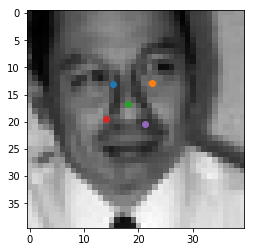


step: 14301 loss: 3.32363 


step: 14302 loss: 3.12165 


step: 14303 loss: 3.08202 


step: 14304 loss: 6.55737 


step: 14305 loss: 3.17543 


step: 14306 loss: 6.36264 


step: 14307 loss: 5.8909 


step: 14308 loss: 3.19102 


step: 14309 loss: 6.5166 


step: 14310 loss: 6.28208 


step: 14311 loss: 7.42426 


step: 14312 loss: 6.24486 


step: 14313 loss: 3.83219 


step: 14314 loss: 6.1908 


step: 14315 loss: 6.2554 


step: 14316 loss: 3.20102 


step: 14317 loss: 3.23924 


step: 14318 loss: 3.36858 


step: 14319 loss: 3.34808 


step: 14320 loss: 3.33672 


step: 14321 loss: 6.58816 


step: 14322 loss: 3.37859 


step: 14323 loss: 3.28276 


step: 14324 loss: 6.17356 


step: 14325 loss: 5.70961 


step: 14326 loss: 5.90383 


step: 14327 loss: 7.17988 


step: 14328 loss: 5.76355 


step: 14329 loss: 6.00706 


step: 14330 loss: 6.22148 


step: 14331 loss: 3.29581 


step: 14332 loss: 3.47603 


step: 14333 loss: 3.41019 


step: 14334 loss: 6.08424 


step: 14335 loss:

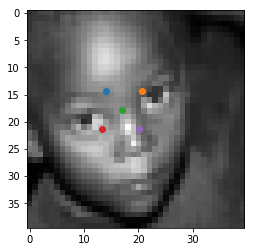

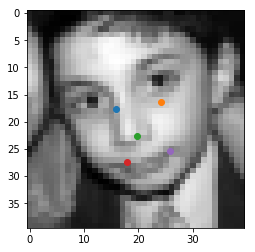

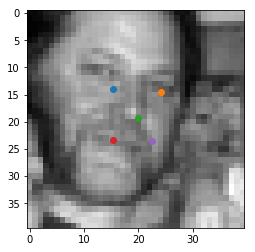

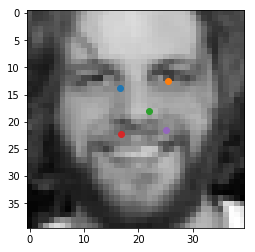

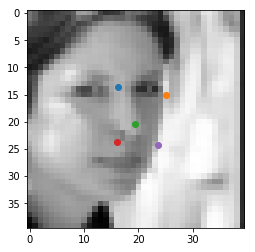


step: 14401 loss: 3.32678 


step: 14402 loss: 6.56349 


step: 14403 loss: 3.22102 


step: 14404 loss: 3.42169 


step: 14405 loss: 3.25087 


step: 14406 loss: 3.26013 


step: 14407 loss: 3.07178 


step: 14408 loss: 5.31128 


step: 14409 loss: 7.65913 


step: 14410 loss: 7.01738 


step: 14411 loss: 6.63492 


step: 14412 loss: 6.76296 


step: 14413 loss: 7.09765 


step: 14414 loss: 6.43991 


step: 14415 loss: 3.18454 


step: 14416 loss: 6.84267 


step: 14417 loss: 3.06543 


step: 14418 loss: 6.9813 


step: 14419 loss: 6.86706 


step: 14420 loss: 3.28053 


step: 14421 loss: 3.11318 


step: 14422 loss: 3.61021 


step: 14423 loss: 6.06242 


step: 14424 loss: 5.42539 


step: 14425 loss: 6.17558 


step: 14426 loss: 5.95322 


step: 14427 loss: 5.93202 


step: 14428 loss: 5.73612 


step: 14429 loss: 5.74523 


step: 14430 loss: 5.87071 


step: 14431 loss: 6.05708 


step: 14432 loss: 5.9228 


step: 14433 loss: 3.4563 


step: 14434 loss: 3.40501 


step: 14435 loss

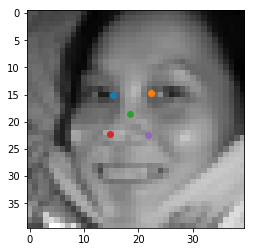

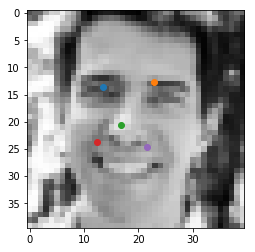


step: 14501 loss: 3.02882 


step: 14502 loss: 2.89588 


step: 14503 loss: 7.58025 


step: 14504 loss: 6.40031 


step: 14505 loss: 3.2357 


step: 14506 loss: 5.68545 


step: 14507 loss: 3.51607 


step: 14508 loss: 3.24437 


step: 14509 loss: 3.04545 


step: 14510 loss: 3.06686 


step: 14511 loss: 6.86335 


step: 14512 loss: 3.11786 


step: 14513 loss: 2.94478 


step: 14514 loss: 6.9658 


step: 14515 loss: 3.15556 


step: 14516 loss: 3.1415 


step: 14517 loss: 2.99525 


step: 14518 loss: 6.86013 


step: 14519 loss: 6.2975 


step: 14520 loss: 5.86502 


step: 14521 loss: 6.28043 


step: 14522 loss: 3.12707 


step: 14523 loss: 5.97521 


step: 14524 loss: 6.5467 


step: 14525 loss: 3.28094 


step: 14526 loss: 6.17895 


step: 14527 loss: 3.29954 


step: 14528 loss: 3.00271 


step: 14529 loss: 3.35314 


step: 14530 loss: 3.69665 


step: 14531 loss: 5.96939 


step: 14532 loss: 3.16662 


step: 14533 loss: 7.22687 


step: 14534 loss: 3.2111 


step: 14535 loss: 6

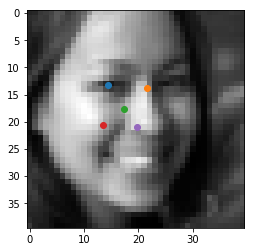

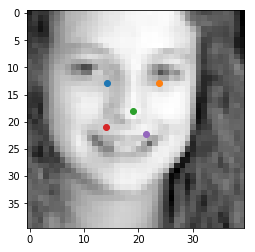

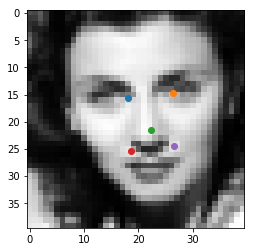


step: 14601 loss: 6.55545 


step: 14602 loss: 3.01236 


step: 14603 loss: 3.11526 


step: 14604 loss: 6.63658 


step: 14605 loss: 5.38876 


step: 14606 loss: 3.40194 


step: 14607 loss: 6.73256 


step: 14608 loss: 3.09015 


step: 14609 loss: 6.71373 


step: 14610 loss: 5.20471 


step: 14611 loss: 5.85338 


step: 14612 loss: 6.01765 


step: 14613 loss: 7.32164 


step: 14614 loss: 3.09669 


step: 14615 loss: 7.0196 


step: 14616 loss: 5.95922 


step: 14617 loss: 6.4219 


step: 14618 loss: 6.132 


step: 14619 loss: 3.47089 


step: 14620 loss: 6.93929 


step: 14621 loss: 6.86824 


step: 14622 loss: 7.1797 


step: 14623 loss: 7.26412 


step: 14624 loss: 7.24997 


step: 14625 loss: 6.68023 


step: 14626 loss: 6.66666 


step: 14627 loss: 5.98559 


step: 14628 loss: 5.97247 


step: 14629 loss: 6.97077 


step: 14630 loss: 3.6359 


step: 14631 loss: 6.60381 


step: 14632 loss: 3.64444 


step: 14633 loss: 5.57933 


step: 14634 loss: 3.43122 


step: 14635 loss: 6

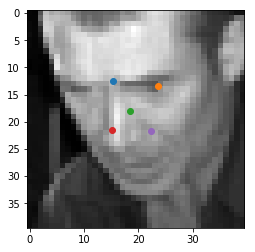

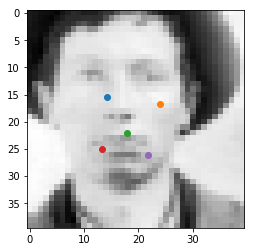

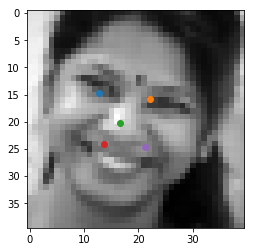


step: 14701 loss: 5.27218 


step: 14702 loss: 6.01534 


step: 14703 loss: 6.05401 


step: 14704 loss: 3.13314 


step: 14705 loss: 7.17877 


step: 14706 loss: 6.42055 


step: 14707 loss: 3.26544 


step: 14708 loss: 5.92038 


step: 14709 loss: 5.68847 


step: 14710 loss: 3.32284 


step: 14711 loss: 5.755 


step: 14712 loss: 3.29401 


step: 14713 loss: 2.9192 


step: 14714 loss: 2.96079 


step: 14715 loss: 6.5099 


step: 14716 loss: 3.17006 


step: 14717 loss: 3.54803 


step: 14718 loss: 6.5023 


step: 14719 loss: 7.34052 


step: 14720 loss: 5.49479 


step: 14721 loss: 5.70288 


step: 14722 loss: 3.05573 


step: 14723 loss: 3.28679 


step: 14724 loss: 6.40127 


step: 14725 loss: 6.52551 


step: 14726 loss: 3.3102 


step: 14727 loss: 7.37973 


step: 14728 loss: 3.42635 


step: 14729 loss: 6.60642 


step: 14730 loss: 5.72086 


step: 14731 loss: 3.21809 


step: 14732 loss: 3.0178 


step: 14733 loss: 2.98838 


step: 14734 loss: 3.19357 


step: 14735 loss: 7.

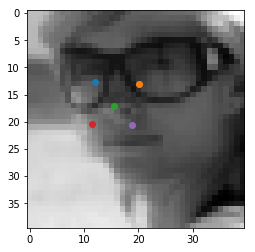

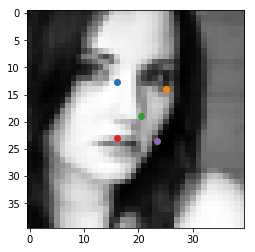

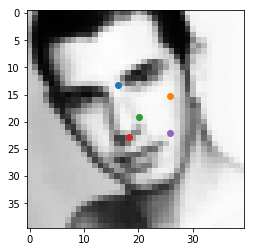


step: 14801 loss: 3.56628 


step: 14802 loss: 3.18052 


step: 14803 loss: 6.85568 


step: 14804 loss: 5.77948 


step: 14805 loss: 6.25796 


step: 14806 loss: 3.09422 


step: 14807 loss: 6.21163 


step: 14808 loss: 2.87822 


step: 14809 loss: 6.31111 


step: 14810 loss: 5.69028 


step: 14811 loss: 6.72266 


step: 14812 loss: 3.3711 


step: 14813 loss: 6.30803 


step: 14814 loss: 5.8396 


step: 14815 loss: 7.17171 


step: 14816 loss: 5.72026 


step: 14817 loss: 6.689 


step: 14818 loss: 3.38599 


step: 14819 loss: 3.18581 


step: 14820 loss: 5.21095 


step: 14821 loss: 7.98546 


step: 14822 loss: 5.92262 


step: 14823 loss: 5.98041 


step: 14824 loss: 3.40104 


step: 14825 loss: 3.57629 


step: 14826 loss: 3.52585 


step: 14827 loss: 6.07891 


step: 14828 loss: 6.35355 


step: 14829 loss: 5.85421 


step: 14830 loss: 5.7461 


step: 14831 loss: 6.23673 


step: 14832 loss: 6.2616 


step: 14833 loss: 3.46979 


step: 14834 loss: 6.51138 


step: 14835 loss: 6

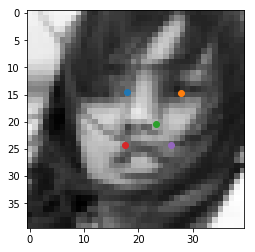

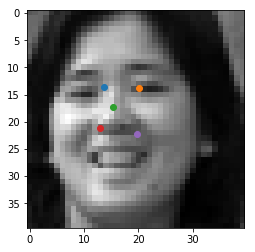

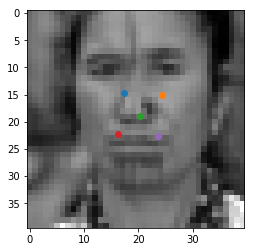


step: 14901 loss: 3.18456 


step: 14902 loss: 3.22809 


step: 14903 loss: 5.73478 


step: 14904 loss: 6.44438 


step: 14905 loss: 3.41389 


step: 14906 loss: 6.39929 


step: 14907 loss: 5.76848 


step: 14908 loss: 5.59561 


step: 14909 loss: 5.6189 


step: 14910 loss: 6.58638 


step: 14911 loss: 6.67217 


step: 14912 loss: 5.45534 


step: 14913 loss: 6.49087 


step: 14914 loss: 3.42514 


step: 14915 loss: 3.20569 


step: 14916 loss: 6.32489 


step: 14917 loss: 3.71779 


step: 14918 loss: 6.05451 


step: 14919 loss: 6.33554 


step: 14920 loss: 2.93926 


step: 14921 loss: 6.32781 


step: 14922 loss: 7.25908 


step: 14923 loss: 3.53862 


step: 14924 loss: 3.32515 


step: 14925 loss: 6.49366 


step: 14926 loss: 3.38055 


step: 14927 loss: 3.3834 


step: 14928 loss: 6.74656 


step: 14929 loss: 3.09152 


step: 14930 loss: 3.25143 


step: 14931 loss: 6.62881 


step: 14932 loss: 3.10428 


step: 14933 loss: 6.28378 


step: 14934 loss: 3.20594 


step: 14935 los

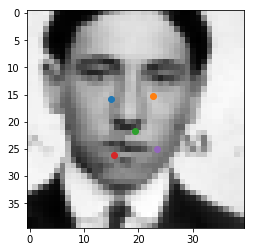

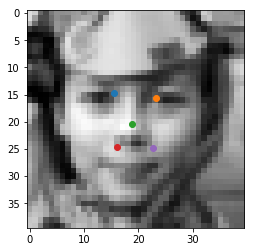

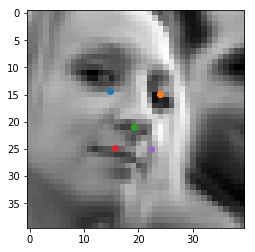

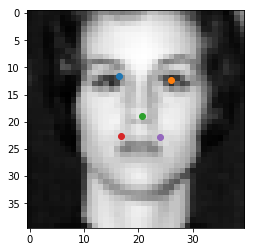

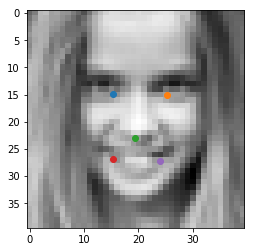

In [21]:
for i in range(5000,15001):
    train_data = d.get_train_batch(batch_size)
    #print(train_data[0].shape)
    feeds = {
        input_X: train_data[0],
        input_landmarks: train_data[1]/40.,
        input_gender: train_data[2],
        input_smile: train_data[3],
        input_glasses: train_data[4],
        input_pose: train_data[5],
    }
    #print(sess.run([tf.shape(h_fc2_landmarks), tf.shape(input_landmarks)], feeds))
    #print(sess.run(fetches=[loss], feed_dict=feeds))
    
    fetches = [loss, predictions, train]    
    loss_, pred, _ = sess.run(fetches=fetches, feed_dict=feeds)
    print('\nstep:', i, 'loss:', loss_, '\n')
    
    if i % 100 == 0:
        test_batch_size = 5
        test_data = d.get_test_batch(test_batch_size)
        feeds = {
            input_X: test_data[0],
            input_landmarks: test_data[1]/40.,
            input_gender: test_data[2],
            input_smile: test_data[3],
            input_glasses: test_data[4],
            input_pose: test_data[5],
        }
        fetches = [loss, predictions]
        loss_, pred = sess.run(fetches=fetches, feed_dict=feeds)
        if i > 5000:
            for j in range(test_batch_size):
                plt.figure()
                plt.imshow(test_data[0][j,:,:,0], cmap='gray')
                plt.scatter(pred[0][j][0]*40., pred[0][j][1]*40.)
                plt.scatter(pred[0][j][2]*40., pred[0][j][3]*40.)
                plt.scatter(pred[0][j][4]*40., pred[0][j][5]*40.)
                plt.scatter(pred[0][j][6]*40., pred[0][j][7]*40.)
                plt.scatter(pred[0][j][8]*40., pred[0][j][9]*40.)

                #print('prediction---------------------------')
                #print(pred[j])
                #print('target---------------------------')
                #print(test_data[j+1])
            plt.show()

[225, 1753, 2227, 2904, 916, 1549, 2221, 131, 339, 2698, 1645, 2943, 1427, 2195, 2274, 1081, 1042, 188, 1197, 1120, 700, 175, 2309, 1639, 2366, 632, 996, 1903, 1524, 1482, 408, 2638, 2039, 421, 1030, 2552, 756, 2857, 1043, 1803, 961, 173, 2805, 69, 2979, 2972, 947, 450, 1425, 2239]


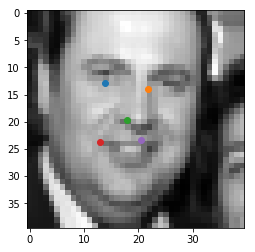

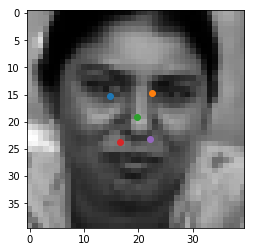

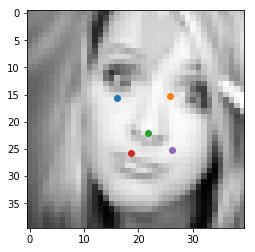

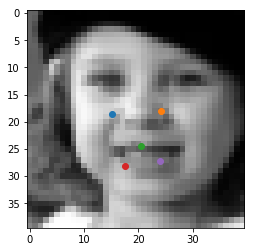

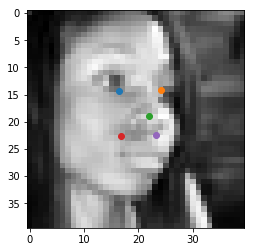

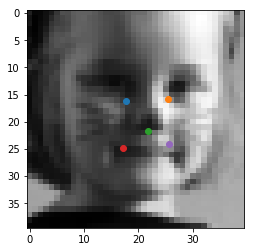

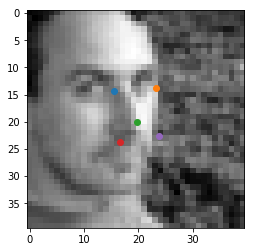

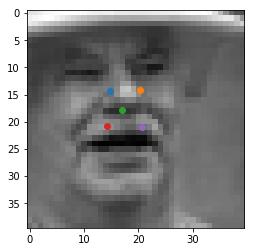

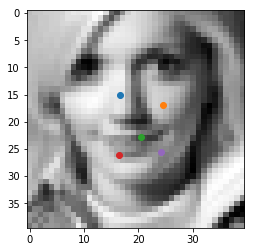

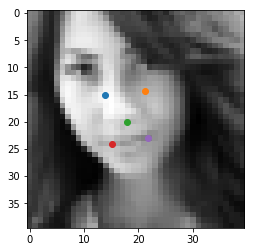

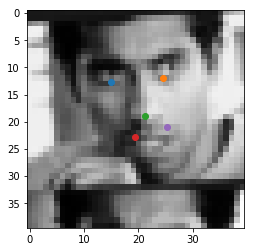

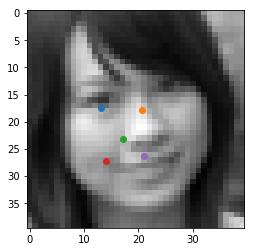

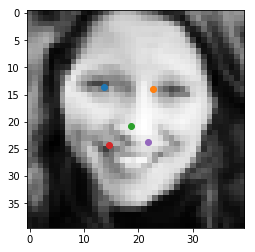

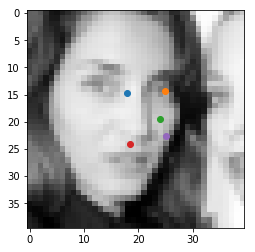

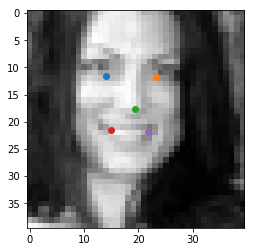

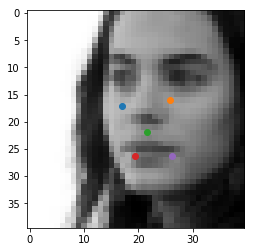

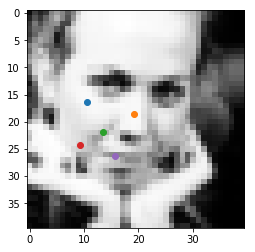

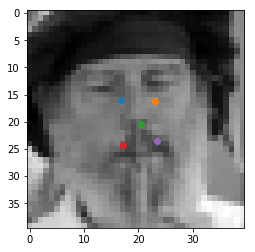

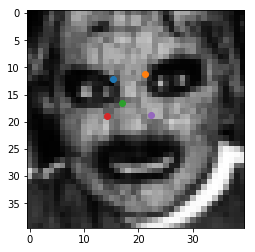

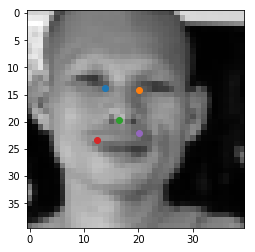

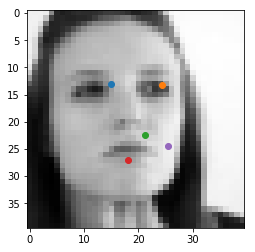

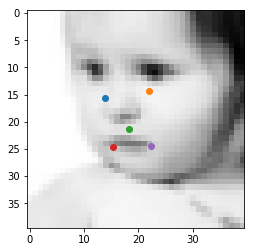

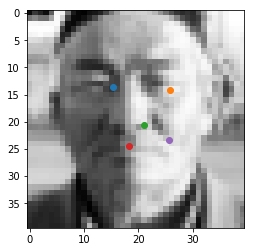

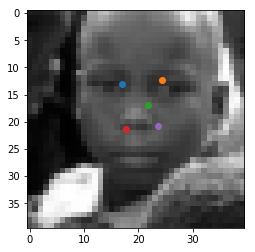

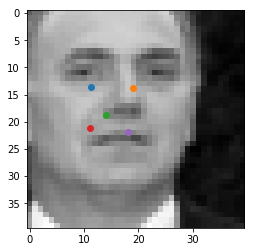

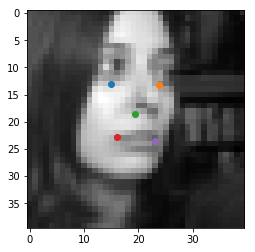

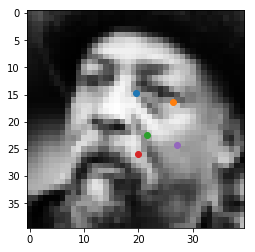

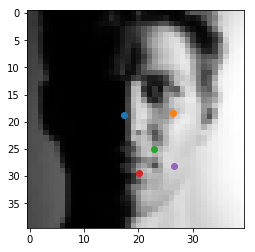

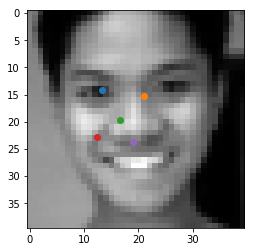

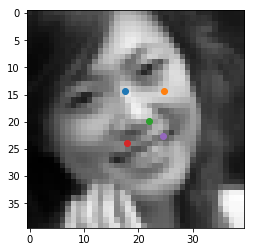

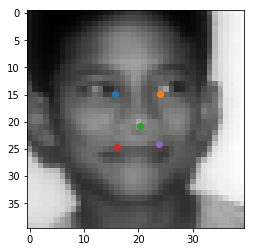

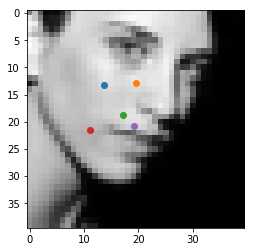

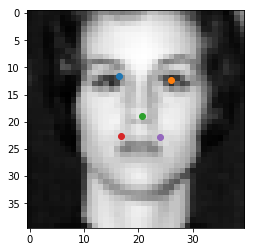

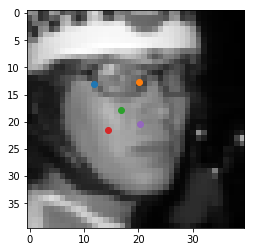

In [22]:
test_data = d.get_test_batch(50)
feeds = {
    input_X: test_data[0],
    input_landmarks: test_data[1]/40.,
    input_gender: test_data[2],
    input_smile: test_data[3],
    input_glasses: test_data[4],
    input_pose: test_data[5],
}
fetches = [loss, predictions]
loss_, pred = sess.run(fetches=fetches, feed_dict=feeds)

for j in range(50):
    plt.figure()
    plt.imshow(test_data[0][j,:,:,0], cmap='gray')
    plt.scatter(pred[0][j][0]*40., pred[0][j][1]*40.)
    plt.scatter(pred[0][j][2]*40., pred[0][j][3]*40.)
    plt.scatter(pred[0][j][4]*40., pred[0][j][5]*40.)
    plt.scatter(pred[0][j][6]*40., pred[0][j][7]*40.)
    plt.scatter(pred[0][j][8]*40., pred[0][j][9]*40.)

    #print('prediction---------------------------')
    #print(pred[j])
    #print('target---------------------------')
    #print(test_data[j+1])
    plt.show()